<a href="https://colab.research.google.com/github/SultanGias15/Investing-in-Stocks-Buy-and-Hold-versus-Momentum-trading-using-MPT-/blob/main/Business_Decision_Modelling_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**OPIM 5641: Business Decision Modelling**
#Final Project Fall 2023 - GROUP 11
# Investing in Stocks (Buy-and-Hold versus Momentum trading using MPT)


Submitted By: Luis Pazmino, Areesha Khan, Shreenath Desai and Sultan Gias Uddin Ahmed

#**IMPORTING LIBRARIES**

In [ ]:
# some useful modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# some stock-specific packages
!pip install yahoo_fin
!pip install requests_html
import yahoo_fin.stock_info as si

#**1 - DATA PREP AND EDA (10 PTS)**

##**1.1 SELECTION OF TEN STOCKS PER SECTOR (thirty stocks in total) (4 pts).**


**Your group must select ten stocks per sector (thirty stocks in total). You must grab daily data for your assets using Python**

###**1.1.a Data Retrieval and Cleaning**

**You must check the quality of your data and, if necessary, clean it (i.e., remove entries of days for which information is missing). (-2 pts otherwise)**

In [ ]:
df=pd.read_html("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies")[0]
df.head()

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


In [ ]:
df['GICS Sector'].unique()

array(['Industrials', 'Health Care', 'Information Technology',
       'Consumer Staples', 'Utilities', 'Financials',
       'Consumer Discretionary', 'Materials', 'Real Estate',
       'Communication Services', 'Energy'], dtype=object)

In [ ]:
df=df[df['GICS Sector'].isin(['Information Technology','Real Estate','Utilities'])]
df = df.dropna()
df.head()

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
6,ADBE,Adobe Inc.,Information Technology,Application Software,"San Jose, California",1997-05-05,796343,1982
8,AES,AES Corporation,Utilities,Independent Power Producers & Energy Traders,"Arlington, Virginia",1998-10-02,874761,1981
13,AKAM,Akamai,Information Technology,Internet Services & Infrastructure,"Cambridge, Massachusetts",2007-07-12,1086222,1998
16,ARE,Alexandria Real Estate Equities,Real Estate,Office REITs,"Pasadena, California",2017-03-20,1035443,1994


In [ ]:
x = df[df['GICS Sector']=='Information Technology']
x['Symbol'].to_list()

['ACN',
 'ADBE',
 'AKAM',
 'AMD',
 'APH',
 'ADI',
 'ANSS',
 'AAPL',
 'AMAT',
 'ANET',
 'ADSK',
 'AVGO',
 'CDNS',
 'CDW',
 'CSCO',
 'CTSH',
 'GLW',
 'ENPH',
 'EPAM',
 'FFIV',
 'FICO',
 'FSLR',
 'FTNT',
 'IT',
 'GEN',
 'HPE',
 'HPQ',
 'IBM',
 'INTC',
 'INTU',
 'JNPR',
 'KEYS',
 'KLAC',
 'LRCX',
 'MCHP',
 'MU',
 'MSFT',
 'MPWR',
 'MSI',
 'NTAP',
 'NVDA',
 'NXPI',
 'ON',
 'ORCL',
 'PANW',
 'PTC',
 'QRVO',
 'QCOM',
 'ROP',
 'CRM',
 'STX',
 'NOW',
 'SWKS',
 'SEDG',
 'SNPS',
 'TEL',
 'TDY',
 'TER',
 'TXN',
 'TRMB',
 'TYL',
 'VRSN',
 'WDC',
 'ZBRA']

In [ ]:
x = df[df['GICS Sector']=='Real Estate']
x['Symbol'].to_list()

['ARE',
 'AMT',
 'AVB',
 'BXP',
 'CPT',
 'CBRE',
 'CSGP',
 'CCI',
 'DLR',
 'EQIX',
 'EQR',
 'ESS',
 'EXR',
 'FRT',
 'PEAK',
 'HST',
 'INVH',
 'IRM',
 'KIM',
 'MAA',
 'PLD',
 'PSA',
 'O',
 'REG',
 'SBAC',
 'SPG',
 'UDR',
 'VTR',
 'VICI',
 'WELL',
 'WY']

In [ ]:
x = df[df['GICS Sector']=='Utilities']
x['Symbol'].to_list()

['AES',
 'LNT',
 'AEE',
 'AEP',
 'AWK',
 'ATO',
 'CNP',
 'CMS',
 'ED',
 'CEG',
 'D',
 'DTE',
 'DUK',
 'EIX',
 'ETR',
 'EVRG',
 'ES',
 'EXC',
 'FE',
 'NEE',
 'NI',
 'NRG',
 'PCG',
 'PNW',
 'PPL',
 'PEG',
 'SRE',
 'SO',
 'WEC',
 'XEL']

###**1.1.b Selection of 10 Stocks in IT sector**

**For training, you will use daily data from January 1, 2017 to December 31, 2021 (see below for details). For evaluating the performance of the strategies, you will use daily data from January 1, 2022 to December 31, 2022. You must check the quality of your data and, if necessary, clean it (i.e., remove entries of days for which information is missing) (-2 pts otherwise)**

In [ ]:
#Assigning ticker that we want to scrape
tickers_list_IT = ['ACN', 'ADBE', 'AKAM', 'AMD', 'APH', 'ADI', 'ANSS', 'AAPL', 'AMAT', 'ANET', 'ADSK', 'AVGO', 'CDNS', 'CDW', 'CSCO', 'CTSH', 'GLW',
                 'ENPH', 'EPAM', 'FFIV', 'FICO', 'FSLR', 'FTNT', 'IT', 'GEN', 'HPE', 'HPQ', 'IBM', 'INTC', 'INTU', 'JNPR', 'KEYS', 'KLAC', 'LRCX', 'MCHP', 'MU',
                 'MSFT', 'MPWR', 'MSI', 'NTAP', 'NVDA', 'NXPI', 'ON', 'ORCL', 'PANW', 'PTC',
                 'QRVO', 'QCOM', 'ROP', 'CRM', 'STX', 'NOW', 'SWKS', 'SEDG', 'SNPS', 'TEL', 'TDY', 'TER', 'TXN', 'TRMB', 'TYL', 'VRSN', 'WDC', 'ZBRA']
#Use historical price data for each stocks to later compare with our new score later
dow_prices_IT = {ticker : si.get_data(ticker,start_date = '01/01/2017',end_date='12/31/2021',interval='1d') for ticker in tickers_list_IT}

In [ ]:
#Here you are able to see the information of each ticker price and they perform in the market
dow_prices_IT

{'ACN':              open   high    low  close  adjclose   volume ticker
 2017-01-03 117.38 117.81 115.82 116.46    104.55  2351600    ACN
 2017-01-04 116.91 117.80 116.43 116.74    104.80  2639800    ACN
 2017-01-05 116.98 117.14 114.95 114.99    103.23  3685400    ACN
 2017-01-06 114.99 116.74 114.34 116.30    104.40  4125300    ACN
 2017-01-09 116.14 116.35 114.92 115.00    103.24  2550800    ACN
 ...           ...    ...    ...    ...       ...      ...    ...
 2021-12-23 402.30 406.85 400.96 403.31    391.66  1374000    ACN
 2021-12-27 406.76 415.95 406.34 415.33    403.33  1906300    ACN
 2021-12-28 415.00 417.15 413.68 415.27    403.27  1362600    ACN
 2021-12-29 414.82 417.37 412.70 415.42    403.42  1041700    ACN
 2021-12-30 416.26 416.66 411.88 413.83    401.88  1278000    ACN
 
 [1258 rows x 7 columns],
 'ADBE':              open   high    low  close  adjclose   volume ticker
 2017-01-03 103.43 104.03 102.81 103.48    103.48  2277400   ADBE
 2017-01-04 103.74 104.37 103.50 

**_Pulling data in a dataframe_**

In [ ]:
#Now we are only exctracting the data that we need. (adjclose)
#Then we get the adjclose price for the ACN (one sample)
prep_data_IT= pd.DataFrame(dow_prices_IT['ACN']['adjclose']).rename(columns = {"adjclose":"ACN"})

#After that we combine all the tickers (all the rest of the samples)
for i in tickers_list_IT[1:]:
  prep_data_IT[i] = pd.DataFrame(dow_prices_IT[i]['adjclose'])
prep_data_IT

,ACN,ADBE,AKAM,AMD,APH,ADI,ANSS,AAPL,AMAT,ANET,...,SNPS,TEL,TDY,TER,TXN,TRMB,TYL,VRSN,WDC,ZBRA
2017-01-03,104.55,103.48,67.57,11.43,31.54,63.24,93.35,27.02,29.42,24.26,...,59.37,60.65,124.00,24.35,60.89,30.27,144.77,77.31,62.21,86.25
2017-01-04,104.80,104.14,68.33,11.43,31.78,63.11,94.44,26.99,29.70,25.43,...,59.57,60.39,124.07,24.50,60.82,30.97,146.61,78.96,63.20,87.03
2017-01-05,103.23,105.91,69.55,11.24,31.61,62.20,94.71,27.13,29.57,25.49,...,59.79,59.66,123.36,24.60,60.35,30.49,148.02,79.80,63.21,84.75
2017-01-06,104.40,108.30,69.79,11.32,31.85,62.44,93.95,27.43,29.51,25.32,...,60.00,60.07,122.61,24.61,61.36,30.44,147.79,80.85,63.06,85.96
2017-01-09,103.24,108.57,70.00,11.49,31.52,62.74,94.29,27.68,30.19,24.88,...,60.08,59.20,121.11,24.68,61.52,30.25,149.32,81.82,64.38,85.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,391.66,569.62,116.20,146.14,83.46,166.29,403.59,174.29,152.65,141.85,...,366.15,153.05,428.73,161.32,176.70,86.11,523.11,249.64,61.20,582.41
2021-12-27,403.33,577.68,117.92,154.36,85.29,168.99,411.22,178.29,159.74,146.84,...,375.59,157.25,433.29,167.09,180.89,88.65,532.60,252.00,62.09,606.33
2021-12-28,403.27,569.36,118.45,153.15,85.48,167.94,409.92,177.26,156.72,144.89,...,372.15,157.05,434.76,163.17,180.19,87.73,531.19,252.41,62.84,597.32
2021-12-29,403.42,569.29,118.33,148.26,86.28,169.04,407.06,177.35,158.04,145.71,...,373.44,156.90,436.53,165.31,179.92,87.40,534.63,255.93,66.13,601.12


**Double checking the stocks in the list**

In [ ]:
prep_data_IT.columns

Index(['ACN', 'ADBE', 'AKAM', 'AMD', 'APH', 'ADI', 'ANSS', 'AAPL', 'AMAT',
       'ANET', 'ADSK', 'AVGO', 'CDNS', 'CDW', 'CSCO', 'CTSH', 'GLW', 'ENPH',
       'EPAM', 'FFIV', 'FICO', 'FSLR', 'FTNT', 'IT', 'GEN', 'HPE', 'HPQ',
       'IBM', 'INTC', 'INTU', 'JNPR', 'KEYS', 'KLAC', 'LRCX', 'MCHP', 'MU',
       'MSFT', 'MPWR', 'MSI', 'NTAP', 'NVDA', 'NXPI', 'ON', 'ORCL', 'PANW',
       'PTC', 'QRVO', 'QCOM', 'ROP', 'CRM', 'STX', 'NOW', 'SWKS', 'SEDG',
       'SNPS', 'TEL', 'TDY', 'TER', 'TXN', 'TRMB', 'TYL', 'VRSN', 'WDC',
       'ZBRA'],
      dtype='object')

**An overview of the dataset**

In [ ]:
#This allows us to see the shape of the current data
prep_data_IT.shape

(1258, 64)

**_Creating a return feature and Dropping Null Values from the dataframe_**

In [ ]:
#Now we will create the return features for each ticker.
#Then we will just use a pct_change as the return.
return_data_IT = pd.DataFrame()
for i in tickers_list_IT:
  return_data_IT[i] = prep_data_IT[i].pct_change()
#We will also drop any of the na records.
return_data_IT.dropna(inplace=True)
return_data_IT

,ACN,ADBE,AKAM,AMD,APH,ADI,ANSS,AAPL,AMAT,ANET,...,SNPS,TEL,TDY,TER,TXN,TRMB,TYL,VRSN,WDC,ZBRA
2017-01-04,0.00,0.01,0.01,0.00,0.01,-0.00,0.01,-0.00,0.01,0.05,...,0.00,-0.00,0.00,0.01,-0.00,0.02,0.01,0.02,0.02,0.01
2017-01-05,-0.01,0.02,0.02,-0.02,-0.01,-0.01,0.00,0.01,-0.00,0.00,...,0.00,-0.01,-0.01,0.00,-0.01,-0.02,0.01,0.01,0.00,-0.03
2017-01-06,0.01,0.02,0.00,0.01,0.01,0.00,-0.01,0.01,-0.00,-0.01,...,0.00,0.01,-0.01,0.00,0.02,-0.00,-0.00,0.01,-0.00,0.01
2017-01-09,-0.01,0.00,0.00,0.02,-0.01,0.00,0.00,0.01,0.02,-0.02,...,0.00,-0.01,-0.01,0.00,0.00,-0.01,0.01,0.01,0.02,0.00
2017-01-10,0.00,-0.00,0.00,-0.00,0.01,0.01,-0.00,0.00,0.01,0.01,...,0.01,0.00,0.01,0.02,0.00,0.00,0.01,-0.03,-0.01,-0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,-0.00,0.01,0.00,0.02,0.01,0.00,0.01,0.00,0.02,0.02,...,0.00,0.01,0.01,0.01,0.00,0.00,-0.01,0.01,0.02,0.00
2021-12-27,0.03,0.01,0.01,0.06,0.02,0.02,0.02,0.02,0.05,0.04,...,0.03,0.03,0.01,0.04,0.02,0.03,0.02,0.01,0.01,0.04
2021-12-28,-0.00,-0.01,0.00,-0.01,0.00,-0.01,-0.00,-0.01,-0.02,-0.01,...,-0.01,-0.00,0.00,-0.02,-0.00,-0.01,-0.00,0.00,0.01,-0.01
2021-12-29,0.00,-0.00,-0.00,-0.03,0.01,0.01,-0.01,0.00,0.01,0.01,...,0.00,-0.00,0.00,0.01,-0.00,-0.00,0.01,0.01,0.05,0.01


**We have one less row because the first row was a NAN value**

In [ ]:
#Now let's see return data shape.
return_data_IT.shape

(1257, 64)

In [ ]:
# Rename the dataFrame for easy usability
df_IT_R = return_data_IT
df_IT_R

,ACN,ADBE,AKAM,AMD,APH,ADI,ANSS,AAPL,AMAT,ANET,...,SNPS,TEL,TDY,TER,TXN,TRMB,TYL,VRSN,WDC,ZBRA
2017-01-04,0.00,0.01,0.01,0.00,0.01,-0.00,0.01,-0.00,0.01,0.05,...,0.00,-0.00,0.00,0.01,-0.00,0.02,0.01,0.02,0.02,0.01
2017-01-05,-0.01,0.02,0.02,-0.02,-0.01,-0.01,0.00,0.01,-0.00,0.00,...,0.00,-0.01,-0.01,0.00,-0.01,-0.02,0.01,0.01,0.00,-0.03
2017-01-06,0.01,0.02,0.00,0.01,0.01,0.00,-0.01,0.01,-0.00,-0.01,...,0.00,0.01,-0.01,0.00,0.02,-0.00,-0.00,0.01,-0.00,0.01
2017-01-09,-0.01,0.00,0.00,0.02,-0.01,0.00,0.00,0.01,0.02,-0.02,...,0.00,-0.01,-0.01,0.00,0.00,-0.01,0.01,0.01,0.02,0.00
2017-01-10,0.00,-0.00,0.00,-0.00,0.01,0.01,-0.00,0.00,0.01,0.01,...,0.01,0.00,0.01,0.02,0.00,0.00,0.01,-0.03,-0.01,-0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,-0.00,0.01,0.00,0.02,0.01,0.00,0.01,0.00,0.02,0.02,...,0.00,0.01,0.01,0.01,0.00,0.00,-0.01,0.01,0.02,0.00
2021-12-27,0.03,0.01,0.01,0.06,0.02,0.02,0.02,0.02,0.05,0.04,...,0.03,0.03,0.01,0.04,0.02,0.03,0.02,0.01,0.01,0.04
2021-12-28,-0.00,-0.01,0.00,-0.01,0.00,-0.01,-0.00,-0.01,-0.02,-0.01,...,-0.01,-0.00,0.00,-0.02,-0.00,-0.01,-0.00,0.00,0.01,-0.01
2021-12-29,0.00,-0.00,-0.00,-0.03,0.01,0.01,-0.01,0.00,0.01,0.01,...,0.00,-0.00,0.00,0.01,-0.00,-0.00,0.01,0.01,0.05,0.01


**_Creating Risk and Return features_**

In [ ]:
# Calculate the average return for each stock
Avg_Return = pd.DataFrame(np.mean(df_IT_R) ,columns=["Avg_Return"])
print(Avg_Return.head)

# Calculate the standard deviation of return for each stock
Std_Dev_Return = pd.DataFrame(np.std(df_IT_R) ,columns=["Std_Dev_Return"])
print(Std_Dev_Return.head(10))

<bound method NDFrame.head of       Avg_Return
ACN         0.00
ADBE        0.00
AKAM        0.00
AMD         0.00
APH         0.00
...          ...
TRMB        0.00
TYL         0.00
VRSN        0.00
WDC         0.00
ZBRA        0.00

[64 rows x 1 columns]>
      Std_Dev_Return
ACN             0.02
ADBE            0.02
AKAM            0.02
AMD             0.04
APH             0.02
ADI             0.02
ANSS            0.02
AAPL            0.02
AMAT            0.03
ANET            0.03


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


**Creating a new data frame with 2 new columns**

In [ ]:

# Create a DataFrame with Ticker names, Avg_Return, and Std_Dev_Return
result_df_IT = pd.DataFrame({
    'Ticker': df_IT_R.columns,
    'Avg_Return': Avg_Return['Avg_Return'].values,
    'Std_Dev_Return': Std_Dev_Return['Std_Dev_Return'].values})

# Print the resulting DataFrame
print(result_df_IT.head(10))

  Ticker  Avg_Return  Std_Dev_Return
0    ACN        0.00            0.02
1   ADBE        0.00            0.02
2   AKAM        0.00            0.02
3    AMD        0.00            0.04
4    APH        0.00            0.02
5    ADI        0.00            0.02
6   ANSS        0.00            0.02
7   AAPL        0.00            0.02
8   AMAT        0.00            0.03
9   ANET        0.00            0.03


**_Creating a Return/Risk Ratio feature and Selection of our 10 stocks for IT sector with the Best Ratios_**

In [ ]:
# Add a new column 'Return/Risk Ratio'
result_df_IT['Return/Risk Ratio'] = result_df_IT['Avg_Return'] / result_df_IT['Std_Dev_Return']
# Sort the DataFrame by 'Return/Risk Ratio' from high to low
result_df_IT = result_df_IT.sort_values(by='Return/Risk Ratio', ascending=False)
# Create a new DataFrame with the 10 first rows
df_IT = result_df_IT.head(10)
# Print the new DataFrame
print(df_IT.head(10))

   Ticker  Avg_Return  Std_Dev_Return  Return/Risk Ratio
17   ENPH        0.01            0.05               0.10
22   FTNT        0.00            0.02               0.09
18   EPAM        0.00            0.02               0.09
36   MSFT        0.00            0.02               0.09
54   SNPS        0.00            0.02               0.09
12   CDNS        0.00            0.02               0.09
7    AAPL        0.00            0.02               0.09
51    NOW        0.00            0.02               0.08
29   INTU        0.00            0.02               0.08
53   SEDG        0.00            0.04               0.08


**_Explanation of our selection approach_**

**GROUP COMMENT:** _Selecting stocks based on the ratio of return to risk is a prudent and systematic approach in financial analysis, often employed by investors and traders seeking to optimize their portfolio. The return-to-risk ratio, also known as the risk-adjusted return, is a key metric that evaluates the potential return generated by an investment relative to its inherent risk. The formula for this ratio typically involves dividing the expected return by a measure of risk, such as standard deviation or volatility._

_Choosing the top 10 stocks with the highest return-to-risk ratios is a strategy that prioritizes investments with a favorable balance between potential returns and associated risks. This approach goes beyond merely considering raw returns and incorporates the element of risk, acknowledging that not all returns are created equal. It emphasizes the importance of achieving a balance that maximizes returns while minimizing exposure to volatility or downside risk._

_The significance of this strategy lies in its risk-conscious nature. While high returns are attractive, they should be assessed in the context of the risks taken to achieve them. A high return-to-risk ratio indicates that a stock has the potential for robust returns relative to its volatility, making it an appealing choice for investors seeking to optimize their risk-adjusted performance. By focusing on stocks with superior return-to-risk ratios, investors aim to build a portfolio (which we are going to do later) that offers a compelling risk-reward profile, **aligning with their risk tolerance and investment objectives.**_








In [ ]:
df_IT.shape

(10, 4)

**Our 10 stocks for IT sector**

In [ ]:
IT10 = df_IT['Ticker'].to_list()
IT10

['ENPH', 'FTNT', 'EPAM', 'MSFT', 'SNPS', 'CDNS', 'AAPL', 'NOW', 'INTU', 'SEDG']

###**1.1.c Selection of 10 Stocks in RS sector**

In [ ]:
#Assigning ticker that we want to scrape
tickers_list_RS = ['ARE', 'AMT', 'AVB', 'BXP', 'CPT', 'CBRE', 'CSGP', 'CCI', 'DLR', 'EQIX', 'EQR', 'ESS', 'EXR', 'FRT', 'PEAK', 'HST', 'INVH', 'IRM', 'KIM', 'MAA', 'PLD', 'PSA', 'O', 'REG', 'SBAC', 'SPG', 'UDR', 'VTR', 'VICI', 'WELL', 'WY']
#Use historical price data for each stocks to later compare with our new score later
dow_prices_RS = {ticker : si.get_data(ticker,start_date = '01/01/2017',end_date='12/31/2021',interval='1d') for ticker in tickers_list_RS}

In [ ]:
dow_prices_RS

{'ARE':              open   high    low  close  adjclose  volume ticker
 2017-01-03 111.85 112.19 109.92 110.58     90.41  424700    ARE
 2017-01-04 110.82 113.62 110.82 113.38     92.70  515300    ARE
 2017-01-05 112.60 113.49 110.97 112.97     92.37  394900    ARE
 2017-01-06 112.63 113.21 112.14 112.21     91.75  472300    ARE
 2017-01-09 112.66 112.88 110.90 111.05     90.80  441600    ARE
 ...           ...    ...    ...    ...       ...     ...    ...
 2021-12-23 219.89 220.00 216.55 217.63    203.02  448800    ARE
 2021-12-27 218.04 220.31 217.29 220.10    205.32  466600    ARE
 2021-12-28 220.71 222.83 219.78 221.99    207.09  448900    ARE
 2021-12-29 222.31 224.03 220.91 223.57    208.56  503900    ARE
 2021-12-30 222.66 223.85 221.86 223.16    209.26  559500    ARE
 
 [1258 rows x 7 columns],
 'AMT':              open   high    low  close  adjclose   volume ticker
 2017-01-03 106.73 106.88 105.34 106.15     91.44  2240900    AMT
 2017-01-04 106.41 106.94 106.20 106.34     91

**_Pulling data in a dataframe_**

In [ ]:
#Now we are only exctracting the data that we need. (adjclose)
#Then we get the adjclose price for the ARE (one sample)
prep_data_RS= pd.DataFrame(dow_prices_RS['ARE']['adjclose']).rename(columns = {"adjclose":"ARE"})

#After that we combine all the tickers (all the rest of the samples)
for i in tickers_list_RS[1:]:
  prep_data_RS[i] = pd.DataFrame(dow_prices_RS[i]['adjclose'])
prep_data_RS

,ARE,AMT,AVB,BXP,CPT,CBRE,CSGP,CCI,DLR,EQIX,...,PSA,O,REG,SBAC,SPG,UDR,VTR,VICI,WELL,WY
2017-01-03,90.41,91.44,140.67,97.98,67.56,31.57,18.61,67.50,78.10,315.03,...,170.14,40.84,52.79,101.33,125.25,28.31,45.35,NaN,49.45,22.79
2017-01-04,92.70,91.60,141.25,101.10,68.54,32.08,19.08,67.90,80.57,321.35,...,171.39,41.45,53.63,101.48,126.25,28.59,45.70,NaN,49.83,22.99
2017-01-05,92.37,91.28,142.11,101.58,68.48,31.81,19.15,67.84,82.72,324.72,...,173.22,42.56,53.75,100.13,126.47,28.68,46.11,NaN,50.95,23.23
2017-01-06,91.75,90.68,143.36,101.35,68.16,31.20,19.18,66.49,81.78,325.37,...,173.82,42.50,53.87,99.40,128.14,28.92,46.02,NaN,51.16,23.16
2017-01-09,90.80,90.46,141.14,100.34,67.52,31.13,19.24,66.67,80.80,327.74,...,172.63,42.19,53.13,98.89,127.51,28.62,46.31,NaN,51.12,23.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,203.02,264.74,229.66,102.64,163.70,105.82,79.94,184.27,157.89,788.18,...,329.12,62.85,67.74,365.53,137.51,54.57,45.58,26.49,77.88,34.74
2021-12-27,205.32,271.41,233.33,104.11,166.59,107.79,79.96,189.22,161.33,803.92,...,334.88,64.41,68.38,374.40,140.14,55.26,46.20,26.83,79.05,35.66
2021-12-28,207.09,274.00,234.00,103.58,166.81,107.72,79.75,190.66,162.59,806.71,...,336.54,64.83,68.67,375.74,139.56,55.27,46.43,26.79,79.70,35.84
2021-12-29,208.56,274.37,236.00,103.82,167.63,108.58,79.85,191.58,162.96,810.55,...,338.35,65.29,69.07,375.95,140.43,55.63,46.94,26.99,80.06,36.57


In [ ]:
prep_data_RS.columns

Index(['ARE', 'AMT', 'AVB', 'BXP', 'CPT', 'CBRE', 'CSGP', 'CCI', 'DLR', 'EQIX',
       'EQR', 'ESS', 'EXR', 'FRT', 'PEAK', 'HST', 'INVH', 'IRM', 'KIM', 'MAA',
       'PLD', 'PSA', 'O', 'REG', 'SBAC', 'SPG', 'UDR', 'VTR', 'VICI', 'WELL',
       'WY'],
      dtype='object')

In [ ]:
#This allows us to see the shape of the current data
prep_data_RS.shape

(1258, 31)

**_Creating a return feature and Dropping Null Values from the dataframe_**

In [ ]:
#Now we will create the return features for each ticker.
#Then we will just use a pct_change as the return.
return_data_RS = pd.DataFrame()
for i in tickers_list_RS:
  return_data_RS[i] = prep_data_RS[i].pct_change()
#We will also drop any of the na records.
return_data_RS.dropna(inplace=True)
return_data_RS

,ARE,AMT,AVB,BXP,CPT,CBRE,CSGP,CCI,DLR,EQIX,...,PSA,O,REG,SBAC,SPG,UDR,VTR,VICI,WELL,WY
2018-01-03,-0.00,0.00,0.00,0.00,0.00,0.01,0.04,-0.00,0.01,0.00,...,0.00,-0.00,-0.01,0.01,-0.00,0.01,0.01,0.00,0.00,0.01
2018-01-04,-0.02,-0.01,-0.02,-0.02,-0.03,-0.00,0.01,-0.01,-0.01,-0.00,...,-0.02,-0.02,-0.03,-0.01,-0.03,-0.02,-0.02,0.00,-0.02,-0.01
2018-01-05,0.00,0.01,-0.00,0.01,-0.00,0.00,0.01,0.01,0.01,0.00,...,-0.01,-0.00,-0.00,0.01,0.01,-0.00,-0.01,0.00,-0.01,-0.00
2018-01-08,0.00,0.01,0.00,-0.01,0.01,0.01,0.01,0.00,0.01,0.02,...,0.01,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.00,0.01
2018-01-09,-0.01,-0.01,-0.01,-0.01,-0.01,0.01,0.00,-0.01,-0.01,-0.00,...,-0.01,-0.02,-0.02,0.00,-0.02,-0.01,-0.01,0.00,-0.02,-0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,-0.01,-0.00,-0.01,-0.00,-0.01,0.00,0.01,-0.00,-0.01,0.00,...,-0.01,0.00,-0.00,-0.01,-0.00,-0.00,0.00,0.01,-0.00,-0.00
2021-12-27,0.01,0.03,0.02,0.01,0.02,0.02,0.00,0.03,0.02,0.02,...,0.02,0.02,0.01,0.02,0.02,0.01,0.01,0.01,0.02,0.03
2021-12-28,0.01,0.01,0.00,-0.01,0.00,-0.00,-0.00,0.01,0.01,0.00,...,0.00,0.01,0.00,0.00,-0.00,0.00,0.01,-0.00,0.01,0.01
2021-12-29,0.01,0.00,0.01,0.00,0.00,0.01,0.00,0.00,0.00,0.00,...,0.01,0.01,0.01,0.00,0.01,0.01,0.01,0.01,0.00,0.02


In [ ]:
#Now let's see return data shape.
return_data_RS.shape

(1006, 31)

In [ ]:
df_RS_R = return_data_RS
df_RS_R

,ARE,AMT,AVB,BXP,CPT,CBRE,CSGP,CCI,DLR,EQIX,...,PSA,O,REG,SBAC,SPG,UDR,VTR,VICI,WELL,WY
2018-01-03,-0.00,0.00,0.00,0.00,0.00,0.01,0.04,-0.00,0.01,0.00,...,0.00,-0.00,-0.01,0.01,-0.00,0.01,0.01,0.00,0.00,0.01
2018-01-04,-0.02,-0.01,-0.02,-0.02,-0.03,-0.00,0.01,-0.01,-0.01,-0.00,...,-0.02,-0.02,-0.03,-0.01,-0.03,-0.02,-0.02,0.00,-0.02,-0.01
2018-01-05,0.00,0.01,-0.00,0.01,-0.00,0.00,0.01,0.01,0.01,0.00,...,-0.01,-0.00,-0.00,0.01,0.01,-0.00,-0.01,0.00,-0.01,-0.00
2018-01-08,0.00,0.01,0.00,-0.01,0.01,0.01,0.01,0.00,0.01,0.02,...,0.01,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.00,0.01
2018-01-09,-0.01,-0.01,-0.01,-0.01,-0.01,0.01,0.00,-0.01,-0.01,-0.00,...,-0.01,-0.02,-0.02,0.00,-0.02,-0.01,-0.01,0.00,-0.02,-0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,-0.01,-0.00,-0.01,-0.00,-0.01,0.00,0.01,-0.00,-0.01,0.00,...,-0.01,0.00,-0.00,-0.01,-0.00,-0.00,0.00,0.01,-0.00,-0.00
2021-12-27,0.01,0.03,0.02,0.01,0.02,0.02,0.00,0.03,0.02,0.02,...,0.02,0.02,0.01,0.02,0.02,0.01,0.01,0.01,0.02,0.03
2021-12-28,0.01,0.01,0.00,-0.01,0.00,-0.00,-0.00,0.01,0.01,0.00,...,0.00,0.01,0.00,0.00,-0.00,0.00,0.01,-0.00,0.01,0.01
2021-12-29,0.01,0.00,0.01,0.00,0.00,0.01,0.00,0.00,0.00,0.00,...,0.01,0.01,0.01,0.00,0.01,0.01,0.01,0.01,0.00,0.02


**_Creating Risk and Return features_**

In [ ]:
# Calculate the average return for each stock
Avg_Return = pd.DataFrame(np.mean(df_RS_R) ,columns=["Avg_Return"])
print(Avg_Return.head)

# Calculate the standard deviation of return for each stock
Std_Dev_Return = pd.DataFrame(np.std(df_RS_R) ,columns=["Std_Dev_Return"])
print(Std_Dev_Return.head(10))

<bound method NDFrame.head of       Avg_Return
ARE         0.00
AMT         0.00
AVB         0.00
BXP         0.00
CPT         0.00
CBRE        0.00
CSGP        0.00
CCI         0.00
DLR         0.00
EQIX        0.00
EQR         0.00
ESS         0.00
EXR         0.00
FRT         0.00
PEAK        0.00
HST         0.00
INVH        0.00
IRM         0.00
KIM         0.00
MAA         0.00
PLD         0.00
PSA         0.00
O           0.00
REG         0.00
SBAC        0.00
SPG         0.00
UDR         0.00
VTR         0.00
VICI        0.00
WELL        0.00
WY          0.00>
      Std_Dev_Return
ARE             0.02
AMT             0.02
AVB             0.02
BXP             0.02
CPT             0.02
CBRE            0.02
CSGP            0.02
CCI             0.02
DLR             0.02
EQIX            0.02


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [ ]:

# Create a DataFrame with Ticker names, Avg_Return, and Std_Dev_Return
result_df_RS = pd.DataFrame({
    'Ticker': df_RS_R.columns,
    'Avg_Return': Avg_Return['Avg_Return'].values,
    'Std_Dev_Return': Std_Dev_Return['Std_Dev_Return'].values})

# Print the resulting DataFrame
print(result_df_RS.head())

  Ticker  Avg_Return  Std_Dev_Return
0    ARE        0.00            0.02
1    AMT        0.00            0.02
2    AVB        0.00            0.02
3    BXP        0.00            0.02
4    CPT        0.00            0.02


In [ ]:
result_df_RS.shape

(31, 3)

**_Creating a Return/Risk Ratio feature and Selection of our 10 stocks for IT sector with the Best Ratios_**

In [ ]:
# Add a new column 'Return/Risk Ratio'
result_df_RS['Return/Risk Ratio'] = result_df_RS['Avg_Return'] / result_df_RS['Std_Dev_Return']
# Sort the DataFrame by 'Return/Risk Ratio' from high to low
result_df_RS = result_df_RS.sort_values(by='Return/Risk Ratio', ascending=False)
# Create a new DataFrame with the 10 first rows
df_RS = result_df_RS.head(10)
# Print the new DataFrame
print(df_RS.head(10))

   Ticker  Avg_Return  Std_Dev_Return  Return/Risk Ratio
12    EXR        0.00            0.02               0.07
20    PLD        0.00            0.02               0.07
19    MAA        0.00            0.02               0.06
24   SBAC        0.00            0.02               0.06
6    CSGP        0.00            0.02               0.06
21    PSA        0.00            0.02               0.06
1     AMT        0.00            0.02               0.05
7     CCI        0.00            0.02               0.05
4     CPT        0.00            0.02               0.05
5    CBRE        0.00            0.02               0.05


In [ ]:
df_RS.shape

(10, 4)

**Our 10 stocks for RS sector**

In [ ]:
RS10 = df_RS['Ticker'].to_list()
RS10

['EXR', 'PLD', 'MAA', 'SBAC', 'CSGP', 'PSA', 'AMT', 'CCI', 'CPT', 'CBRE']

###**1.1.d Selection of 10 Stocks in Utilities sector**

**GROUP COMMENT: There is a problem with the data range we are tyring to used it. We will check what is happening later. Bur for now we have decided to work with all dates available**

In [ ]:
# Assigning tickers that we want to scrape
tickers_list_U = ['AES', 'LNT', 'AEE', 'AEP', 'AWK', 'ATO', 'CNP', 'CMS', 'ED', 'CEG', 'D', 'DTE', 'DUK', 'EIX', 'ETR', 'EVRG','ES','EXC', 'FE', 'NEE','NI', 'NRG', 'PCG', 'PNW', 'PPL', 'PEG', 'SRE', 'SO', 'WEC', 'XEL']

# Use historical price data for each stock to later compare with our new score later
dow_prices_U = {ticker: si.get_data(ticker, start_date= None, end_date= None , interval='1d') for ticker in tickers_list_U}

In [ ]:
# # Assigning tickers that we want to scrape
# tickers_list_U = ['AES', 'LNT', 'AEE', 'AEP', 'AWK', 'ATO', 'CNP', 'CMS', 'ED', 'CEG', 'D', 'DTE', 'DUK', 'EIX', 'ETR', 'EVRG','ES','EXC', 'FE', 'NEE','NI', 'NRG', 'PCG', 'PNW', 'PPL', 'PEG', 'SRE', 'SO', 'WEC', 'XEL']

# # Use historical price data for each stock to later compare with our new score later
# dow_prices_U = {ticker: si.get_data(ticker, start_date= '01/01/2017', end_date= None , interval='1d') for ticker in tickers_list_U}


In [ ]:
#DOESNT WORK
# # Assigning tickers that we want to scrape
# tickers_list_U = ['AES', 'LNT', 'AEE', 'AEP', 'AWK', 'ATO', 'CNP', 'CMS', 'ED', 'CEG', 'D', 'DTE', 'DUK', 'EIX', 'ETR', 'EVRG','ES','EXC', 'FE', 'NEE','NI', 'NRG', 'PCG', 'PNW', 'PPL', 'PEG', 'SRE', 'SO', 'WEC', 'XEL']

# # Use historical price data for each stock to later compare with our new score later
# dow_prices_U = {ticker: si.get_data(ticker, start_date= None , end_date= '12/31/2021', interval='1d') for ticker in tickers_list_U}

In [ ]:
# #DOESNT WORK
# # Assigning tickers that we want to scrape
# tickers_list_U = ['AES', 'LNT', 'AEE', 'AEP', 'AWK', 'ATO', 'CNP', 'CMS', 'ED', 'CEG', 'D', 'DTE', 'DUK', 'EIX', 'ETR', 'EVRG','ES','EXC', 'FE', 'NEE','NI', 'NRG', 'PCG', 'PNW', 'PPL', 'PEG', 'SRE', 'SO', 'WEC', 'XEL']

# # Use historical price data for each stock to later compare with our new score later
# dow_prices_U = {ticker: si.get_data(ticker, start_date= '01/01/2017' , end_date= '12/31/2021', interval='1d') for ticker in tickers_list_U}

In [ ]:
dow_prices_U

{'AES':             open  high   low  close  adjclose    volume ticker
 1991-06-26  3.11  3.36  3.11   3.28      2.26  16683528    AES
 1991-06-27  3.36  3.44  3.26   3.32      2.29   6160224    AES
 1991-06-28  3.32  3.40  3.24   3.30      2.27   2384862    AES
 1991-07-01  3.36  3.36  3.28   3.32      2.29   1782930    AES
 1991-07-02  3.36  3.36  3.32   3.36      2.31   1271226    AES
 ...          ...   ...   ...    ...       ...       ...    ...
 2023-12-04 17.90 18.14 17.71  17.98     17.98   7498900    AES
 2023-12-05 17.97 18.07 17.75  17.94     17.94   4779200    AES
 2023-12-06 18.13 18.20 17.86  17.94     17.94  10153300    AES
 2023-12-07 18.06 18.33 17.94  18.17     18.17   4040500    AES
 2023-12-08 18.15 18.23 18.03  18.08     18.08   1314486    AES
 
 [8176 rows x 7 columns],
 'LNT':             open  high   low  close  adjclose   volume ticker
 1973-02-21  0.00  5.03  5.03   5.03      0.78     5600    LNT
 1973-02-22  0.00  5.03  5.03   5.03      0.78     8400    LNT
 

**_Pulling data in a dataframe_**

In [ ]:
#Now we are only exctracting the data that we need. (adjclose)
#Then we get the adjclose price for the AES (one sample)
prep_data_U= pd.DataFrame(dow_prices_U['AES']['adjclose']).rename(columns = {"adjclose":"AES"})

#After that we combine all the tickers (all the rest of the samples)
for i in tickers_list_U[1:]:
  prep_data_U[i] = pd.DataFrame(dow_prices_U[i]['adjclose'])
prep_data_U

,AES,LNT,AEE,AEP,AWK,ATO,CNP,CMS,ED,CEG,...,NI,NRG,PCG,PNW,PPL,PEG,SRE,SO,WEC,XEL
1991-06-26,2.26,2.71,NaN,5.72,NaN,3.21,2.84,9.24,4.83,NaN,...,1.04,NaN,9.07,2.78,1.96,2.60,NaN,1.72,3.13,3.86
1991-06-27,2.29,2.71,NaN,5.75,NaN,3.19,2.85,9.20,4.83,NaN,...,1.03,NaN,9.12,2.81,1.96,2.62,NaN,1.73,3.14,3.91
1991-06-28,2.27,2.72,NaN,5.75,NaN,3.19,2.84,9.20,4.81,NaN,...,1.02,NaN,9.07,2.74,1.96,2.62,NaN,1.70,3.16,3.88
1991-07-01,2.29,2.71,NaN,5.80,NaN,3.14,2.86,9.33,4.88,NaN,...,1.02,NaN,9.21,2.78,1.98,2.64,NaN,1.70,3.16,3.90
1991-07-02,2.31,2.75,NaN,5.77,NaN,3.14,2.87,8.97,4.86,NaN,...,1.04,NaN,9.21,2.78,1.98,2.65,NaN,1.68,3.18,3.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-04,17.98,51.40,78.53,80.13,133.14,114.92,28.85,58.33,91.99,118.92,...,26.44,48.08,17.27,75.09,26.12,62.71,72.21,71.28,85.00,61.47
2023-12-05,17.94,51.25,77.72,79.31,131.38,113.88,28.56,57.33,91.19,118.31,...,26.14,48.26,17.06,74.82,25.78,62.04,70.93,70.93,83.73,61.03
2023-12-06,17.94,52.10,79.09,80.36,132.70,114.73,28.78,57.83,91.65,112.63,...,26.41,47.53,17.24,76.21,26.09,62.62,73.05,72.26,84.91,61.97
2023-12-07,18.17,51.82,78.73,80.20,132.55,114.53,28.76,57.94,92.44,110.53,...,26.43,47.47,17.37,76.05,26.09,62.42,73.04,71.65,85.00,61.55


**Doeble Checking the columns names**

In [ ]:
prep_data_U.columns

Index(['AES', 'LNT', 'AEE', 'AEP', 'AWK', 'ATO', 'CNP', 'CMS', 'ED', 'CEG',
       'D', 'DTE', 'DUK', 'EIX', 'ETR', 'EVRG', 'ES', 'EXC', 'FE', 'NEE', 'NI',
       'NRG', 'PCG', 'PNW', 'PPL', 'PEG', 'SRE', 'SO', 'WEC', 'XEL'],
      dtype='object')

In [ ]:
#This allows us to see the shape of the current data
prep_data_U.shape

(8176, 30)

**Getting info with our dasired daterange**

In [ ]:
# Specify the start and end dates
start_date = '01-01-2017'
end_date = '12-31-2021'

# Select the date range using .loc
prep_data_U = prep_data_U.loc[start_date:end_date]

# Display the selected data
print(prep_data_U)


             AES   LNT   AEE   AEP    AWK   ATO   CNP   CMS    ED  CEG  ...  \
2017-01-03  9.23 30.59 43.41 49.18  63.71 63.21 19.54 33.87 57.05  NaN  ...   
2017-01-04  9.15 30.78 43.46 49.25  64.20 63.57 19.71 34.05 57.00  NaN  ...   
2017-01-05  9.03 30.74 43.67 49.51  64.31 63.25 19.71 34.24 57.12  NaN  ...   
2017-01-06  9.35 30.49 44.00 49.47  64.23 62.89 20.15 34.37 57.29  NaN  ...   
2017-01-09  9.12 30.07 43.08 48.82  62.91 62.07 19.77 33.91 56.38  NaN  ...   
...          ...   ...   ...   ...    ...   ...   ...   ...   ...  ...  ...   
2021-12-27 22.29 56.25 83.34 80.90 176.92 98.90 26.22 60.08 78.07  NaN  ...   
2021-12-28 22.36 56.89 84.17 81.95 179.39 98.30 26.48 60.67 78.69  NaN  ...   
2021-12-29 22.40 57.30 84.64 82.29 180.59 99.63 26.57 61.29 79.35  NaN  ...   
2021-12-30 22.76 57.62 84.78 82.39 181.21 99.31 26.46 61.20 79.42  NaN  ...   
2021-12-31 22.89 57.63 84.73 82.65 182.01 99.58 26.53 61.15 79.55  NaN  ...   

              NI   NRG   PCG   PNW   PPL   PEG   SR

In [ ]:
prep_data_U.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2017-01-03 to 2021-12-31
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AES     1259 non-null   float64
 1   LNT     1259 non-null   float64
 2   AEE     1259 non-null   float64
 3   AEP     1259 non-null   float64
 4   AWK     1259 non-null   float64
 5   ATO     1259 non-null   float64
 6   CNP     1259 non-null   float64
 7   CMS     1259 non-null   float64
 8   ED      1259 non-null   float64
 9   CEG     0 non-null      float64
 10  D       1259 non-null   float64
 11  DTE     1259 non-null   float64
 12  DUK     1259 non-null   float64
 13  EIX     1259 non-null   float64
 14  ETR     1259 non-null   float64
 15  EVRG    1259 non-null   float64
 16  ES      1259 non-null   float64
 17  EXC     1259 non-null   float64
 18  FE      1259 non-null   float64
 19  NEE     1259 non-null   float64
 20  NI      1259 non-null   float64
 21  NRG     1259 non-nu

**CEG has no data. That is our problem. Lets fix it!!**

In [ ]:
prep_data_U.drop('CEG', axis=1, inplace=True)
prep_data_U.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2017-01-03 to 2021-12-31
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AES     1259 non-null   float64
 1   LNT     1259 non-null   float64
 2   AEE     1259 non-null   float64
 3   AEP     1259 non-null   float64
 4   AWK     1259 non-null   float64
 5   ATO     1259 non-null   float64
 6   CNP     1259 non-null   float64
 7   CMS     1259 non-null   float64
 8   ED      1259 non-null   float64
 9   D       1259 non-null   float64
 10  DTE     1259 non-null   float64
 11  DUK     1259 non-null   float64
 12  EIX     1259 non-null   float64
 13  ETR     1259 non-null   float64
 14  EVRG    1259 non-null   float64
 15  ES      1259 non-null   float64
 16  EXC     1259 non-null   float64
 17  FE      1259 non-null   float64
 18  NEE     1259 non-null   float64
 19  NI      1259 non-null   float64
 20  NRG     1259 non-null   float64
 21  PCG     1259 non-nu

<ipython-input-820-0a43737256f8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prep_data_U.drop('CEG', axis=1, inplace=True)


**Now 29 columns instead.**

In [ ]:
prep_data_U.shape

(1259, 29)

**_Creating a return feature and Dropping Null Values from the dataframe_**

** Updating the ticker list**

In [ ]:
tickers_list_U2 = ['AES', 'LNT', 'AEE', 'AEP', 'AWK', 'ATO', 'CNP', 'CMS', 'ED', 'D', 'DTE', 'DUK', 'EIX', 'ETR', 'EVRG','ES','EXC', 'FE', 'NEE','NI', 'NRG', 'PCG', 'PNW', 'PPL', 'PEG', 'SRE', 'SO', 'WEC', 'XEL']

In [ ]:
#Now we will create the return features for each ticker.
#Then we will just use a pct_change as the return.
return_data_U = pd.DataFrame()
for i in tickers_list_U2:
  return_data_U[i] = prep_data_U[i].pct_change()
#We will also drop any of the na records.
# return_data_U.dropna(inplace=True)
return_data_U.head (10)

,AES,LNT,AEE,AEP,AWK,ATO,CNP,CMS,ED,D,...,NI,NRG,PCG,PNW,PPL,PEG,SRE,SO,WEC,XEL
2017-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,-0.01,0.01,0.00,0.00,0.01,0.01,0.01,0.01,-0.00,-0.00,...,0.01,0.06,0.00,0.01,0.00,0.01,0.01,-0.00,0.01,0.00
2017-01-05,-0.01,-0.00,0.00,0.01,0.00,-0.00,0.00,0.01,0.00,0.00,...,0.01,0.02,-0.00,0.01,0.01,0.00,-0.00,0.00,0.00,0.00
2017-01-06,0.04,-0.01,0.01,-0.00,-0.00,-0.01,0.02,0.00,0.00,0.01,...,-0.01,0.01,0.01,0.00,0.01,0.01,0.01,-0.00,-0.00,0.00
2017-01-09,-0.02,-0.01,-0.02,-0.01,-0.02,-0.01,-0.02,-0.01,-0.02,-0.02,...,-0.01,0.01,-0.02,-0.02,-0.01,-0.02,-0.01,-0.01,-0.01,-0.02
2017-01-10,-0.02,-0.00,-0.00,-0.00,-0.01,0.00,0.00,-0.00,-0.00,-0.00,...,-0.01,0.01,-0.00,-0.00,-0.01,-0.00,-0.00,-0.00,0.00,-0.00
2017-01-11,0.04,0.01,0.00,0.02,-0.00,0.01,0.02,0.01,0.01,0.00,...,0.01,0.04,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
2017-01-12,-0.02,-0.00,-0.00,0.00,0.00,0.01,-0.00,-0.00,0.01,-0.00,...,-0.00,0.02,-0.00,-0.00,0.01,0.00,-0.00,0.01,0.00,0.00
2017-01-13,0.01,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,...,-0.00,0.02,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00
2017-01-17,0.02,0.01,0.01,0.01,0.02,-0.00,0.00,0.01,0.01,0.01,...,0.02,0.05,0.02,0.01,0.01,0.01,0.02,0.02,0.01,0.01


In [ ]:
#Now let's see return data shape.
return_data_U.shape

(1259, 29)

In [ ]:
df_U_R = return_data_U
df_U_R

,AES,LNT,AEE,AEP,AWK,ATO,CNP,CMS,ED,D,...,NI,NRG,PCG,PNW,PPL,PEG,SRE,SO,WEC,XEL
2017-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,-0.01,0.01,0.00,0.00,0.01,0.01,0.01,0.01,-0.00,-0.00,...,0.01,0.06,0.00,0.01,0.00,0.01,0.01,-0.00,0.01,0.00
2017-01-05,-0.01,-0.00,0.00,0.01,0.00,-0.00,0.00,0.01,0.00,0.00,...,0.01,0.02,-0.00,0.01,0.01,0.00,-0.00,0.00,0.00,0.00
2017-01-06,0.04,-0.01,0.01,-0.00,-0.00,-0.01,0.02,0.00,0.00,0.01,...,-0.01,0.01,0.01,0.00,0.01,0.01,0.01,-0.00,-0.00,0.00
2017-01-09,-0.02,-0.01,-0.02,-0.01,-0.02,-0.01,-0.02,-0.01,-0.02,-0.02,...,-0.01,0.01,-0.02,-0.02,-0.01,-0.02,-0.01,-0.01,-0.01,-0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,0.01,0.01,0.01,0.01,0.01,0.01,0.00,0.01,-0.00,0.00,...,0.01,0.00,-0.01,-0.00,0.00,0.01,0.01,0.01,0.01,0.00
2021-12-28,0.00,0.01,0.01,0.01,0.01,-0.01,0.01,0.01,0.01,0.01,...,0.01,0.01,0.01,0.01,0.01,0.01,0.00,0.01,0.01,0.01
2021-12-29,0.00,0.01,0.01,0.00,0.01,0.01,0.00,0.01,0.01,0.01,...,0.01,0.00,-0.01,0.00,0.00,0.01,0.01,0.01,0.00,0.01
2021-12-30,0.02,0.01,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,...,-0.01,0.00,0.01,0.01,0.01,0.01,0.00,0.00,0.00,0.00


**_Creating Risk and Return features_**

In [ ]:
# Calculate the average return for each stock
Avg_Return = pd.DataFrame(np.mean(df_U_R) ,columns=["Avg_Return"])
print(Avg_Return.head)

# Calculate the standard deviation of return for each stock
Std_Dev_Return = pd.DataFrame(np.std(df_U_R) ,columns=["Std_Dev_Return"])
print(Std_Dev_Return.head(10))

<bound method NDFrame.head of       Avg_Return
AES         0.00
LNT         0.00
AEE         0.00
AEP         0.00
AWK         0.00
ATO         0.00
CNP         0.00
CMS         0.00
ED          0.00
D           0.00
DTE         0.00
DUK         0.00
EIX         0.00
ETR         0.00
EVRG        0.00
ES          0.00
EXC         0.00
FE          0.00
NEE         0.00
NI          0.00
NRG         0.00
PCG         0.00
PNW         0.00
PPL         0.00
PEG         0.00
SRE         0.00
SO          0.00
WEC         0.00
XEL         0.00>
     Std_Dev_Return
AES            0.02
LNT            0.01
AEE            0.02
AEP            0.01
AWK            0.02
ATO            0.01
CNP            0.02
CMS            0.01
ED             0.01
D              0.02


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [ ]:
# Create a DataFrame with Ticker names, Avg_Return, and Std_Dev_Return
result_df_U = pd.DataFrame({
    'Ticker': df_U_R.columns,
    'Avg_Return': Avg_Return['Avg_Return'].values,
    'Std_Dev_Return': Std_Dev_Return['Std_Dev_Return'].values})

# Print the resulting DataFrame
print(result_df_U.head(10))

  Ticker  Avg_Return  Std_Dev_Return
0    AES        0.00            0.02
1    LNT        0.00            0.01
2    AEE        0.00            0.02
3    AEP        0.00            0.01
4    AWK        0.00            0.02
5    ATO        0.00            0.01
6    CNP        0.00            0.02
7    CMS        0.00            0.01
8     ED        0.00            0.01
9      D        0.00            0.02


**_Creating a Return/Risk Ratio feature and Selection of our 10 stocks for IT sector with the Best Ratios_**

In [ ]:
# Add a new column 'Return/Risk Ratio'
result_df_U['Return/Risk Ratio'] = result_df_U['Avg_Return'] / result_df_U['Std_Dev_Return']
# Sort the DataFrame by 'Return/Risk Ratio' from high to low
result_df_U = result_df_U.sort_values(by='Return/Risk Ratio', ascending=False)
# Create a new DataFrame with the 10 first rows
df_U = result_df_U.head(10)
# Print the new DataFrame
print(df_U.head(10))

   Ticker  Avg_Return  Std_Dev_Return  Return/Risk Ratio
18    NEE        0.00            0.01               0.07
4     AWK        0.00            0.02               0.06
20    NRG        0.00            0.02               0.06
0     AES        0.00            0.02               0.04
28    XEL        0.00            0.01               0.04
2     AEE        0.00            0.02               0.04
1     LNT        0.00            0.01               0.04
27    WEC        0.00            0.02               0.04
15     ES        0.00            0.02               0.04
7     CMS        0.00            0.01               0.04


In [ ]:
df_U.shape

(10, 4)

**Our 10 stocks for Utility sector**

In [ ]:
U10 = df_U['Ticker'].to_list()
U10

['NEE', 'AWK', 'NRG', 'AES', 'XEL', 'AEE', 'LNT', 'WEC', 'ES', 'CMS']

##**1.2  TIME-SERIES VISUALIZATION (3 pts)**

**Present one time-series visualization (value of the stocks over time) per sector (so you will have three visualizations of time-series, one per sector).**

###**1.2.a IT time-series visualization (value of the stock over the time)**

In [ ]:
IT10

['ENPH', 'FTNT', 'EPAM', 'MSFT', 'SNPS', 'CDNS', 'AAPL', 'NOW', 'INTU', 'SEDG']

In [ ]:
df_IT_P10=prep_data_IT[IT10]
df_IT_P10

,ENPH,FTNT,EPAM,MSFT,SNPS,CDNS,AAPL,NOW,INTU,SEDG
2017-01-03,1.05,6.02,63.66,57.14,59.37,25.34,27.02,75.66,108.70,13.20
2017-01-04,1.15,6.08,64.36,56.88,59.57,25.57,26.99,78.83,108.91,14.40
2017-01-05,1.12,6.17,64.75,56.88,59.79,25.66,27.13,79.13,109.59,13.80
2017-01-06,1.11,6.20,66.87,57.38,60.00,25.65,27.43,82.10,111.02,13.75
2017-01-09,1.11,6.26,66.84,57.19,60.08,25.72,27.68,82.00,110.69,13.50
...,...,...,...,...,...,...,...,...,...,...
2021-12-23,188.17,69.80,663.08,328.67,366.15,187.48,174.29,648.57,627.28,283.29
2021-12-27,188.69,73.53,697.00,336.29,375.59,191.65,178.29,663.28,644.12,285.60
2021-12-28,186.79,73.20,682.20,335.11,372.15,190.08,177.26,654.00,641.17,278.82
2021-12-29,185.47,73.35,677.84,335.80,373.44,189.93,177.35,654.58,639.44,278.04


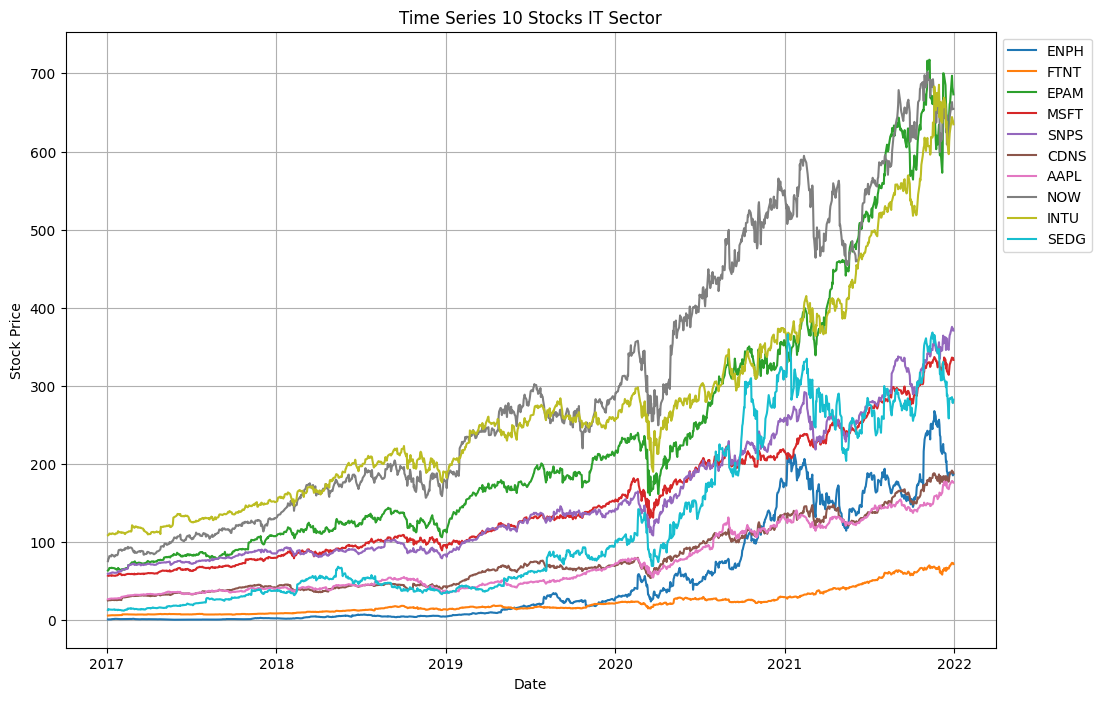

In [ ]:
# Plotting the time series for each stock
plt.figure(figsize=(12, 8))

for column in df_IT_P10.columns:
    plt.plot(df_IT_P10.index, df_IT_P10[column], label=column)

plt.title('Time Series 10 Stocks IT Sector')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()


###**1.2.b RS time-series visualization (value of the stock over the time)**

In [ ]:
RS10

['EXR', 'PLD', 'MAA', 'SBAC', 'CSGP', 'PSA', 'AMT', 'CCI', 'CPT', 'CBRE']

In [ ]:
df_RS_P10=prep_data_RS[RS10]
df_RS_P10

,EXR,PLD,MAA,SBAC,CSGP,PSA,AMT,CCI,CPT,CBRE
2017-01-03,60.67,44.16,77.29,101.33,18.61,170.14,91.44,67.50,67.56,31.57
2017-01-04,60.99,44.95,78.00,101.48,19.08,171.39,91.60,67.90,68.54,32.08
2017-01-05,61.78,44.96,77.89,100.13,19.15,173.22,91.28,67.84,68.48,31.81
2017-01-06,62.36,45.26,77.83,99.40,19.18,173.82,90.68,66.49,68.16,31.20
2017-01-09,61.62,44.91,77.35,98.89,19.24,172.63,90.46,66.67,67.52,31.13
...,...,...,...,...,...,...,...,...,...,...
2021-12-23,203.78,154.36,207.38,365.53,79.94,329.12,264.74,184.27,163.70,105.82
2021-12-27,207.29,158.31,210.70,374.40,79.96,334.88,271.41,189.22,166.59,107.79
2021-12-28,208.04,158.22,211.71,375.74,79.75,336.54,274.00,190.66,166.81,107.72
2021-12-29,210.72,160.02,214.16,375.95,79.85,338.35,274.37,191.58,167.63,108.58


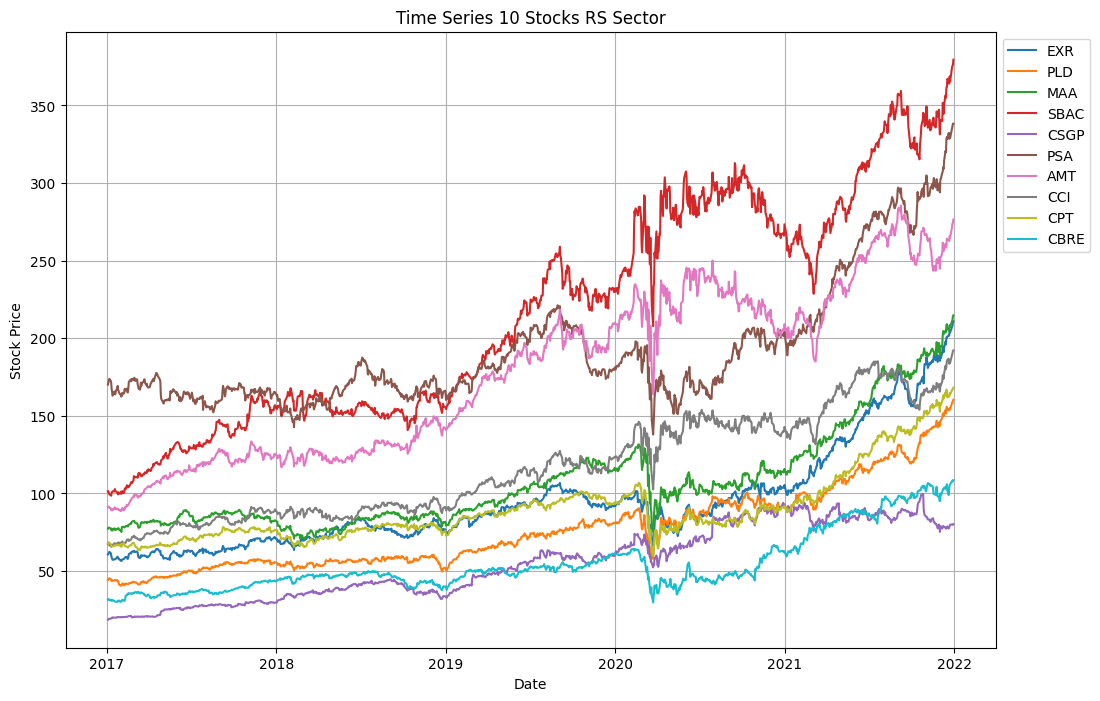

In [ ]:
# Plotting the time series for each stock
plt.figure(figsize=(12, 8))

for column in df_RS_P10.columns:
    plt.plot(df_RS_P10.index, df_RS_P10[column], label=column)

plt.title('Time Series 10 Stocks RS Sector')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()


###**1.2.c Utility time-series visualization (value of the stock over the time)**

In [ ]:
U10

['NEE', 'AWK', 'NRG', 'AES', 'XEL', 'AEE', 'LNT', 'WEC', 'ES', 'CMS']

In [ ]:
df_U_P10=prep_data_U[U10]
df_U_P10

,NEE,AWK,NRG,AES,XEL,AEE,LNT,WEC,ES,CMS
2017-01-03,25.11,63.71,10.50,9.23,33.34,43.41,30.59,47.02,44.86,33.87
2017-01-04,25.19,64.20,11.13,9.15,33.49,43.46,30.78,47.39,45.01,34.05
2017-01-05,25.17,64.31,11.34,9.03,33.49,43.67,30.74,47.45,45.02,34.24
2017-01-06,25.10,64.23,11.41,9.35,33.59,44.00,30.49,47.26,45.01,34.37
2017-01-09,25.04,62.91,11.50,9.12,33.08,43.08,30.07,46.61,44.44,33.91
...,...,...,...,...,...,...,...,...,...,...
2021-12-27,86.96,176.92,39.23,22.29,63.39,83.34,56.25,89.24,84.15,60.08
2021-12-28,87.49,179.39,39.51,22.36,64.15,84.17,56.89,90.38,84.94,60.67
2021-12-29,87.60,180.59,39.71,22.40,64.47,84.64,57.30,90.77,85.46,61.29
2021-12-30,88.34,181.21,39.73,22.76,64.73,84.78,57.62,90.96,85.96,61.20


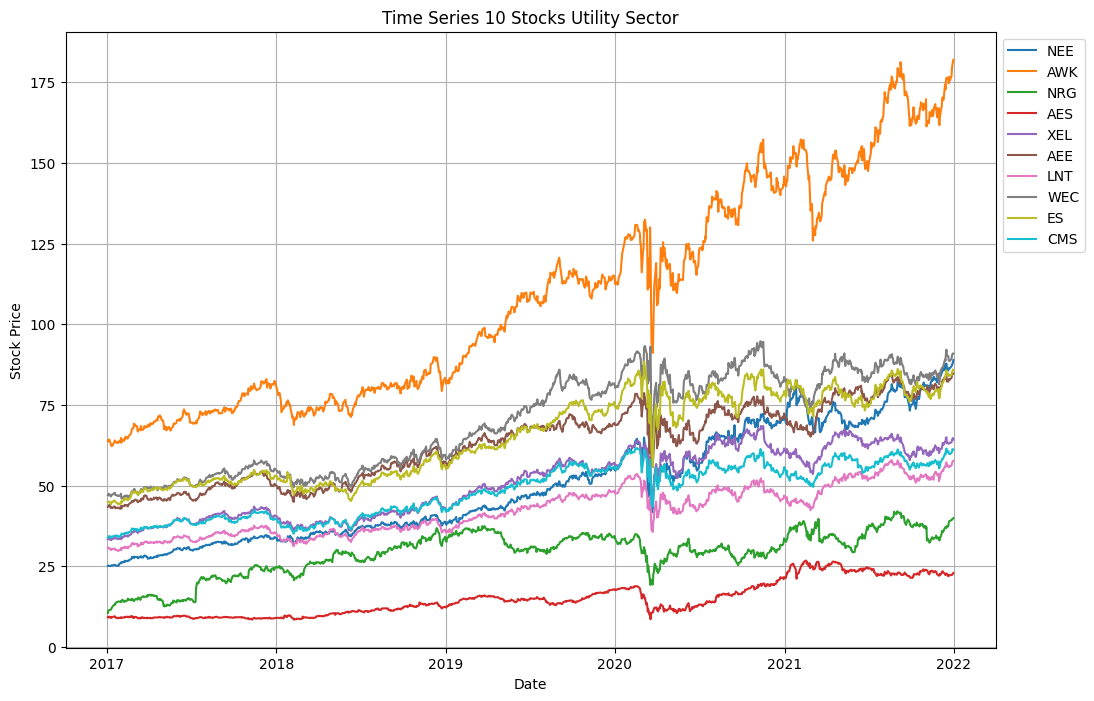

In [ ]:
# Plotting the time series for each stock
plt.figure(figsize=(12, 8))

for column in df_U_P10.columns:
    plt.plot(df_U_P10.index, df_U_P10[column], label=column)

plt.title('Time Series 10 Stocks Utility Sector')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

##**1.3 VISUALIZATION ANALYSIS (3 pts).**

**Discuss what you see in each visualization plot (e.g., volatility over time)(3 pts).**

**_IT sector_**


*   Monitoring various stocks in a given industry showing concurrent increases or decreases, especially at specific points—such as the noted decline in the first quarter of 2020—indicates a significant correlation. This synchronized movement indicates that these stocks may be influenced by common underlying factors affecting their prices. Reflecting on those challenging times during the COVID-19 pandemic.
*   Examining the conduct of stocks in a particular sector unveils unique attributes. For example, FTNT displays discernible fluctuations, indicating a more unpredictable pattern, whereas INTU exhibits a steady and consistent upward trajectory. The contrast in their price movements highlights differing degrees of stability and volatility among individual stocks within the sector.

* The contrasting outcomes observed in IT stocks such as FTNT emphasize the diverse strategies, market positions, or external factors that mold a company's trajectory. These differences underscore the significance of examining the individual behaviors of stocks within the broader sector context.

**_RS sector_**

*  Real estate sector stocks display variability, primarily attributed to the pandemic, emphasizing market volatility and a comparatively unstable trajectory over time. In contrast, conventional real estate firms like MAA demonstrate more consistent yet conservative patterns, prioritizing stability and established market positions.

* In certain intervals, such as significant events or financial interest rate adjustments, real estate stocks with a focus on technology often display notable price fluctuations. These movements may indicate market responses to pivotal occurrences, impacting investor sentiment and contributing to volatility within the sector.

* Varying growth paths observed in companies like SBAC and PSA underscore distinct market strategies or responses to industry changes. This diversity illustrates the complex nature of the real estate sector, emphasizing different reactions to market conditions and investment approaches.

**_Utilities sector_**


* Well-established utility stocks like LNT exhibit steady and comparatively stable growth patterns, suggesting lower volatility within the sector. In contrast, stocks such as AES showcase more noticeable fluctuations, indicating increased volatility and potentially higher market risk within the utilities industry.

* In times of regulatory changes or shifts in energy policies, utility stocks may experience heightened volatility. Companies following stable trajectories, like NRG, could react differently in comparison to those with more significant fluctuations, such as AES. This divergence reflects distinct levels of resilience or vulnerability to regulatory changes.

* The distinct behaviors observed in stocks such as NEE and AES illustrate the varied dynamics inherent in the utility sector. These differences may arise from company-specific strategies, market positions, or external factors that uniquely influence their performance.

#**2 - MOMENTUM TRADING FOR STOCK SELECTION (20 pts)**

##**2.1 (8-21) MOMENTUM TRADING STRATEGY.(15 pts).**

**To each selected stock using daily data from the year 2021. We do not want to see 30 copies of the same code blocks, so you must use functions to keep your notebook concise (-7 pts otherwise)**

###**2.1.1 IT Sector**

####**2.1.1a Data Download**

In [ ]:
IT10

['ENPH', 'FTNT', 'EPAM', 'MSFT', 'SNPS', 'CDNS', 'AAPL', 'NOW', 'INTU', 'SEDG']

In [ ]:
# List to store dataframes for each ticker
dataframes_listIT10 = []

# Loop through each ticker
for ticker in IT10:
    # Get historical data for the ticker
    data = si.get_data(ticker, start_date='01/01/2021', end_date='12/12/2021', interval='1d')

    # Add a 'Day' column
    day = np.arange(1, len(data) + 1)
    data['Day'] = day

    # Drop unwanted columns
    data.drop(columns=['adjclose', 'volume', 'ticker', 'open', 'high', 'low'], inplace=True)

    # Rename the 'close' column to 'Close'
    data.rename(columns={'close': 'Close'}, inplace=True)

    # Reorganizing the columns
    data = data[['Day','Close']]

    # Append the dataframe to the list
    dataframes_listIT10.append(data)

In [ ]:
# Loop through each dataframe in the list and display the first few rows
for i, dfI_T10 in enumerate(dataframes_listIT10):
    print(f"Ticker: {IT10[i]}")
    print(dfI_T10.head())
    print("\n" + "="*50 + "\n")

Ticker: ENPH
            Day  Close
2021-01-04    1 172.24
2021-01-05    2 181.48
2021-01-06    3 203.38
2021-01-07    4 213.76
2021-01-08    5 207.41


Ticker: FTNT
            Day  Close
2021-01-04    1  29.11
2021-01-05    2  28.35
2021-01-06    3  27.62
2021-01-07    4  28.65
2021-01-08    5  29.63


Ticker: EPAM
            Day  Close
2021-01-04    1 348.06
2021-01-05    2 345.70
2021-01-06    3 329.66
2021-01-07    4 338.48
2021-01-08    5 342.37


Ticker: MSFT
            Day  Close
2021-01-04    1 217.69
2021-01-05    2 217.90
2021-01-06    3 212.25
2021-01-07    4 218.29
2021-01-08    5 219.62


Ticker: SNPS
            Day  Close
2021-01-04    1 254.70
2021-01-05    2 258.89
2021-01-06    3 249.70
2021-01-07    4 258.84
2021-01-08    5 262.80


Ticker: CDNS
            Day  Close
2021-01-04    1 135.76
2021-01-05    2 136.14
2021-01-06    3 130.64
2021-01-07    4 137.05
2021-01-08    5 136.19


Ticker: AAPL
            Day  Close
2021-01-04    1 129.41
2021-01-05    2 131.01


####**2.1.1.b Info of all the stocks dataframes**

In [ ]:
# Loop through each dataframe in the list and display the info
for i, dfI_T10 in enumerate(dataframes_listIT10):
    print(f"Ticker: {IT10[i]}")
    print(dfI_T10.info())
    print("\n" + "="*50 + "\n")

Ticker: ENPH
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 238 entries, 2021-01-04 to 2021-12-10
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Day     238 non-null    int64  
 1   Close   238 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 5.6 KB
None


Ticker: FTNT
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 238 entries, 2021-01-04 to 2021-12-10
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Day     238 non-null    int64  
 1   Close   238 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 5.6 KB
None


Ticker: EPAM
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 238 entries, 2021-01-04 to 2021-12-10
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Day     238 non-null    int64  
 1   Close   238 non-null    float64
dtypes: float64(1), int64(1)
memor

####**2.1.1.c Describing all the stocks dataframes**

In [ ]:
# Loop through each dataframe in the list and display the describe
for i, dfI_T10 in enumerate(dataframes_listIT10):
    print(f"Ticker: {IT10[i]}")
    print(dfI_T10.describe())
    print("\n" + "="*50 + "\n")

Ticker: ENPH
         Day  Close
count 238.00 238.00
mean  119.50 175.84
std    68.85  32.56
min     1.00 114.61
25%    60.25 152.43
50%   119.50 172.24
75%   178.75 189.54
max   238.00 267.74


Ticker: FTNT
         Day  Close
count 238.00 238.00
mean  119.50  48.89
std    68.85  12.86
min     1.00  27.62
25%    60.25  37.73
50%   119.50  48.01
75%   178.75  61.11
max   238.00  70.24


Ticker: EPAM
         Day  Close
count 238.00 238.00
mean  119.50 510.23
std    68.85 110.08
min     1.00 329.66
25%    60.25 397.51
50%   119.50 515.54
75%   178.75 614.00
max   238.00 717.49


Ticker: MSFT
         Day  Close
count 238.00 238.00
mean  119.50 272.56
std    68.85  35.15
min     1.00 212.25
25%    60.25 243.26
50%   119.50 265.39
75%   178.75 298.96
max   238.00 343.11


Ticker: SNPS
         Day  Close
count 238.00 238.00
mean  119.50 283.29
std    68.85  37.21
min     1.00 218.49
25%    60.25 254.55
50%   119.50 276.52
75%   178.75 317.64
max   238.00 364.36


Ticker: CDNS
         Day

####**2.1.1.d Creating Moving averages**

In [ ]:
# Loop through each dataframe in the list
for i, dfI_T10 in enumerate(dataframes_listIT10):
    # Apply moving averages to the 'Close' column
    dfI_T10['8-day'] = dfI_T10['Close'].rolling(8).mean().shift()
    dfI_T10['21-day'] = dfI_T10['Close'].rolling(21).mean().shift()

    # Drop NaN values
    dfI_T10.dropna(inplace=True)

    # Display the head of the dataframe
    print(f"Ticker: {IT10[i]}")
    print(dfI_T10.head())
    print("\n" + "="*50 + "\n")


Ticker: ENPH
            Day  Close  8-day  21-day
2021-02-03   22 196.34 192.03  197.07
2021-02-04   23 195.63 190.06  198.22
2021-02-05   24 193.20 189.17  198.89
2021-02-08   25 197.87 189.91  198.41
2021-02-09   26 200.10 192.26  197.65


Ticker: FTNT
            Day  Close  8-day  21-day
2021-02-03   22  30.18  29.85   29.54
2021-02-04   23  31.40  29.84   29.59
2021-02-05   24  31.10  29.97   29.74
2021-02-08   25  31.89  30.12   29.91
2021-02-09   26  31.99  30.46   30.06


Ticker: EPAM
            Day  Close  8-day  21-day
2021-02-03   22 372.78 353.15  347.85
2021-02-04   23 373.09 354.79  349.03
2021-02-05   24 377.43 357.16  350.33
2021-02-08   25 390.33 360.49  352.61
2021-02-09   26 394.46 366.83  355.08


Ticker: MSFT
            Day  Close  8-day  21-day
2021-02-03   22 243.00 233.84  223.65
2021-02-04   23 242.01 235.98  224.86
2021-02-05   24 242.20 237.54  226.01
2021-02-08   25 242.47 238.77  227.43
2021-02-09   26 243.77 239.97  228.58


Ticker: SNPS
            Day

####**2.1.1.e Creating Log Close and Return columns**

In [ ]:
# Loop through each dataframe in the list
for i, dfI_T10 in enumerate(dataframes_listIT10):
    # Apply log return calculation
    dfI_T10['logClose'] = np.log(dfI_T10['Close'])
    dfI_T10['return'] = dfI_T10['logClose'].diff()

    # Display the head of the dataframe
    print(f"Ticker: {IT10[i]}")
    print(dfI_T10.head())
    print("\n" + "="*50 + "\n")

Ticker: ENPH
            Day  Close  8-day  21-day  logClose  return
2021-02-03   22 196.34 192.03  197.07      5.28     NaN
2021-02-04   23 195.63 190.06  198.22      5.28   -0.00
2021-02-05   24 193.20 189.17  198.89      5.26   -0.01
2021-02-08   25 197.87 189.91  198.41      5.29    0.02
2021-02-09   26 200.10 192.26  197.65      5.30    0.01


Ticker: FTNT
            Day  Close  8-day  21-day  logClose  return
2021-02-03   22  30.18  29.85   29.54      3.41     NaN
2021-02-04   23  31.40  29.84   29.59      3.45    0.04
2021-02-05   24  31.10  29.97   29.74      3.44   -0.01
2021-02-08   25  31.89  30.12   29.91      3.46    0.03
2021-02-09   26  31.99  30.46   30.06      3.47    0.00


Ticker: EPAM
            Day  Close  8-day  21-day  logClose  return
2021-02-03   22 372.78 353.15  347.85      5.92     NaN
2021-02-04   23 373.09 354.79  349.03      5.92    0.00
2021-02-05   24 377.43 357.16  350.33      5.93    0.01
2021-02-08   25 390.33 360.49  352.61      5.97    0.03
2021-

In [ ]:
# Create a list to store the results
B_H_strategy_returns_IT10 = []

# Loop through each dataframe in the list
for i, dfI_T10 in enumerate(dataframes_listIT10):
    # Apply log return calculation
    dfI_T10['logClose'] = np.log(dfI_T10['Close'])
    dfI_T10['return'] = dfI_T10['logClose'].diff()

    # Calculate the strategy return for each dataframe
    strategy_return = np.exp(np.sum(dfI_T10['return'])) - 1

    # Display the result for each dataframe
    print(f"Ticker: {IT10[i]}, B_H_Strategy Return: {strategy_return}")

    # Store the result for further analysis if needed
    B_H_strategy_returns_IT10.append((IT10[i], strategy_return))

# Create a DataFrame from the list of strategy returns
returns_df_IT10 = pd.DataFrame(B_H_strategy_returns_IT10, columns=['Ticker', 'Strategy_Return'])

# Sort the DataFrame by 'Strategy_Return' in descending order
returns_df_IT10 = returns_df_IT10.sort_values(by='Strategy_Return', ascending=False)

# Display the sorted DataFrame
print("\nreturns_df_IT10 sorted")
print(returns_df_IT10)

Ticker: ENPH, B_H_Strategy Return: 0.095141123983842
Ticker: FTNT, B_H_Strategy Return: 1.2040154036221806
Ticker: EPAM, B_H_Strategy Return: 0.8700573995385277
Ticker: MSFT, B_H_Strategy Return: 0.4096296647939177
Ticker: SNPS, B_H_Strategy Return: 0.3662381056984594
Ticker: CDNS, B_H_Strategy Return: 0.36582101606643236
Ticker: AAPL, B_H_Strategy Return: 0.33977895831937843
Ticker: NOW, B_H_Strategy Return: 0.12199769809672834
Ticker: INTU, B_H_Strategy Return: 0.7833750443032719
Ticker: SEDG, B_H_Strategy Return: 0.006545557683721004

returns_df_IT10 sorted
  Ticker  Strategy_Return
1   FTNT             1.20
2   EPAM             0.87
8   INTU             0.78
3   MSFT             0.41
4   SNPS             0.37
5   CDNS             0.37
6   AAPL             0.34
7    NOW             0.12
0   ENPH             0.10
9   SEDG             0.01


####**2.1.1.f Setting the first row to 0**

In [ ]:
date_to_set_return = "2021-02-03"
return_value_to_set = 0.0

# Loop through each dataframe in the list
for i, dfI_T10 in enumerate(dataframes_listIT10):
    # Set the 'return' column for the specified date
    dfI_T10.loc[date_to_set_return, 'return'] = return_value_to_set

    # Display the head of the dataframe
    print(f"Ticker: {IT10[i]}")
    print(dfI_T10.head())
    print("\n" + "="*50 + "\n")


Ticker: ENPH
            Day  Close  8-day  21-day  logClose  return
2021-02-03   22 196.34 192.03  197.07      5.28    0.00
2021-02-04   23 195.63 190.06  198.22      5.28   -0.00
2021-02-05   24 193.20 189.17  198.89      5.26   -0.01
2021-02-08   25 197.87 189.91  198.41      5.29    0.02
2021-02-09   26 200.10 192.26  197.65      5.30    0.01


Ticker: FTNT
            Day  Close  8-day  21-day  logClose  return
2021-02-03   22  30.18  29.85   29.54      3.41    0.00
2021-02-04   23  31.40  29.84   29.59      3.45    0.04
2021-02-05   24  31.10  29.97   29.74      3.44   -0.01
2021-02-08   25  31.89  30.12   29.91      3.46    0.03
2021-02-09   26  31.99  30.46   30.06      3.47    0.00


Ticker: EPAM
            Day  Close  8-day  21-day  logClose  return
2021-02-03   22 372.78 353.15  347.85      5.92    0.00
2021-02-04   23 373.09 354.79  349.03      5.92    0.00
2021-02-05   24 377.43 357.16  350.33      5.93    0.01
2021-02-08   25 390.33 360.49  352.61      5.97    0.03
2021-

####**2.1.1g Adding invested column**

In [ ]:
# Loop through each dataframe in the list
for i, dfI_T10 in enumerate(dataframes_listIT10):
    # Create 'invested' column based on the conditions
    dfI_T10['invested'] = np.where(dfI_T10['8-day'] > dfI_T10['21-day'], 1, 0)

    # Display the head of the dataframe
    print(f"Ticker: {IT10[i]}")
    print(dfI_T10.head())
    print("\n" + "="*50 + "\n")


Ticker: ENPH
            Day  Close  8-day  21-day  logClose  return  invested
2021-02-03   22 196.34 192.03  197.07      5.28    0.00         0
2021-02-04   23 195.63 190.06  198.22      5.28   -0.00         0
2021-02-05   24 193.20 189.17  198.89      5.26   -0.01         0
2021-02-08   25 197.87 189.91  198.41      5.29    0.02         0
2021-02-09   26 200.10 192.26  197.65      5.30    0.01         0


Ticker: FTNT
            Day  Close  8-day  21-day  logClose  return  invested
2021-02-03   22  30.18  29.85   29.54      3.41    0.00         1
2021-02-04   23  31.40  29.84   29.59      3.45    0.04         1
2021-02-05   24  31.10  29.97   29.74      3.44   -0.01         1
2021-02-08   25  31.89  30.12   29.91      3.46    0.03         1
2021-02-09   26  31.99  30.46   30.06      3.47    0.00         1


Ticker: EPAM
            Day  Close  8-day  21-day  logClose  return  invested
2021-02-03   22 372.78 353.15  347.85      5.92    0.00         1
2021-02-04   23 373.09 354.79  34

####**2.1.1.h System Return**

In [ ]:
# Loop through each dataframe in the list
for i, dfI_T10 in enumerate(dataframes_listIT10):
    # Create 'system_return' column based on the conditions
    dfI_T10['system_return'] = dfI_T10['invested'] * dfI_T10['return']

    # Display the head of the dataframe
    print(f"Ticker: {IT10[i]}")
    print(dfI_T10.head())
    print("\n" + "="*50 + "\n")  # Separating each dataframe with a line


Ticker: ENPH
            Day  Close  8-day  21-day  logClose  return  invested  \
2021-02-03   22 196.34 192.03  197.07      5.28    0.00         0   
2021-02-04   23 195.63 190.06  198.22      5.28   -0.00         0   
2021-02-05   24 193.20 189.17  198.89      5.26   -0.01         0   
2021-02-08   25 197.87 189.91  198.41      5.29    0.02         0   
2021-02-09   26 200.10 192.26  197.65      5.30    0.01         0   

            system_return  
2021-02-03           0.00  
2021-02-04          -0.00  
2021-02-05          -0.00  
2021-02-08           0.00  
2021-02-09           0.00  


Ticker: FTNT
            Day  Close  8-day  21-day  logClose  return  invested  \
2021-02-03   22  30.18  29.85   29.54      3.41    0.00         1   
2021-02-04   23  31.40  29.84   29.59      3.45    0.04         1   
2021-02-05   24  31.10  29.97   29.74      3.44   -0.01         1   
2021-02-08   25  31.89  30.12   29.91      3.46    0.03         1   
2021-02-09   26  31.99  30.46   30.06      3

####**2.1.1.i Mometum Strategy-IT 10 Stocks Returns**

In [ ]:
total_strategy_returnsIT = []

# Loop through each dataframe in the list
for i, dfI_T10 in enumerate(dataframes_listIT10):
    # Calculate the strategy return for each dataframe
    strategy_return = np.exp(np.sum(dfI_T10['system_return'])) - 1

    # Display the result for each dataframe
    print(f"Ticker: {IT10[i]}, Strategy Return: {strategy_return}")

    # Store the result for further analysis if needed
    total_strategy_returnsIT.append((IT10[i], strategy_return))


Ticker: ENPH, Strategy Return: -0.27148420426950115
Ticker: FTNT, Strategy Return: 1.1306859556751587
Ticker: EPAM, Strategy Return: 0.6106314997538562
Ticker: MSFT, Strategy Return: 0.3248820777141743
Ticker: SNPS, Strategy Return: 0.2800783762539638
Ticker: CDNS, Strategy Return: 0.5314093844096139
Ticker: AAPL, Strategy Return: 0.3458779041594937
Ticker: NOW, Strategy Return: 0.035139944900274056
Ticker: INTU, Strategy Return: 0.5368725971426376
Ticker: SEDG, Strategy Return: -0.40894890148176877


In [ ]:
# Create a DataFrame from the list of strategy returns
Momentum_returns_dfIT = pd.DataFrame(total_strategy_returnsIT, columns=['Ticker', 'Momentum_Return'])

# Sort the DataFrame by 'Strategy_Return' in descending order
Momentum_returns_dfIT = Momentum_returns_dfIT.sort_values(by='Momentum_Return', ascending=False)

# Display the top 3 stocks
print("** IT Momentum Strategy Sorted**")
Momentum_returns_dfIT


** IT Momentum Strategy Sorted**


,Ticker,Momentum_Return
1,FTNT,1.13
2,EPAM,0.61
8,INTU,0.54
5,CDNS,0.53
6,AAPL,0.35
3,MSFT,0.32
4,SNPS,0.28
7,NOW,0.04
0,ENPH,-0.27
9,SEDG,-0.41


###**2.1. 2 RS Sector**

####**2.1.2.a Data Download**

In [ ]:
RS10

['EXR', 'PLD', 'MAA', 'SBAC', 'CSGP', 'PSA', 'AMT', 'CCI', 'CPT', 'CBRE']

In [ ]:
# List to store dataframes for each ticker
dataframes_list = []

# Loop through each ticker
for ticker in RS10:
    # Get historical data for the ticker
    data = si.get_data(ticker, start_date='01/01/2021', end_date='12/12/2021', interval='1d')

    # Add a 'Day' column
    day = np.arange(1, len(data) + 1)
    data['Day'] = day

    # Drop unwanted columns
    data.drop(columns=['adjclose', 'volume', 'ticker', 'open', 'high', 'low'], inplace=True)

    # Rename the 'close' column to 'Close'
    data.rename(columns={'close': 'Close'}, inplace=True)

    # Reorganizing the columns
    data = data[['Day','Close']]

    # Append the dataframe to the list
    dataframes_list.append(data)

In [ ]:
# Loop through each dataframe in the list and display the first few rows
for i, df in enumerate(dataframes_list):
    print(f"Ticker: {RS10[i]}")
    print(df.head())
    print("\n" + "="*50 + "\n")

Ticker: EXR
            Day  Close
2021-01-04    1 110.29
2021-01-05    2 108.88
2021-01-06    3 108.71
2021-01-07    4 108.97
2021-01-08    5 112.05


Ticker: PLD
            Day  Close
2021-01-04    1  96.04
2021-01-05    2  96.19
2021-01-06    3  93.91
2021-01-07    4  95.32
2021-01-08    5  96.60


Ticker: MAA
            Day  Close
2021-01-04    1 122.71
2021-01-05    2 122.67
2021-01-06    3 124.70
2021-01-07    4 124.55
2021-01-08    5 125.27


Ticker: SBAC
            Day  Close
2021-01-04    1 275.63
2021-01-05    2 272.58
2021-01-06    3 264.64
2021-01-07    4 265.25
2021-01-08    5 267.82


Ticker: CSGP
            Day  Close
2021-01-04    1  89.53
2021-01-05    2  89.38
2021-01-06    3  89.67
2021-01-07    4  90.55
2021-01-08    5  91.95


Ticker: PSA
            Day  Close
2021-01-04    1 220.20
2021-01-05    2 217.37
2021-01-06    3 213.82
2021-01-07    4 217.45
2021-01-08    5 222.62


Ticker: AMT
            Day  Close
2021-01-04    1 219.60
2021-01-05    2 220.71
2021-

####**2.1.2.b Info of all the stocks dataframes**

In [ ]:
# Loop through each dataframe in the list and display the info
for i, df in enumerate(dataframes_list):
    print(f"Ticker: {RS10[i]}")
    print(df.info())
    print("\n" + "="*50 + "\n")

Ticker: EXR
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 238 entries, 2021-01-04 to 2021-12-10
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Day     238 non-null    int64  
 1   Close   238 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 5.6 KB
None


Ticker: PLD
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 238 entries, 2021-01-04 to 2021-12-10
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Day     238 non-null    int64  
 1   Close   238 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 5.6 KB
None


Ticker: MAA
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 238 entries, 2021-01-04 to 2021-12-10
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Day     238 non-null    int64  
 1   Close   238 non-null    float64
dtypes: float64(1), int64(1)
memory u

####**2.1.2.c Describing all the stocks dataframes**

In [ ]:
# Loop through each dataframe in the list and display the describe
for i, df in enumerate(dataframes_list):
    print(f"Ticker: {RS10[i]}")
    print(df.describe())
    print("\n" + "="*50 + "\n")

Ticker: EXR
         Day  Close
count 238.00 238.00
mean  119.50 158.67
std    68.85  28.15
min     1.00 108.71
25%    60.25 133.62
50%   119.50 163.78
75%   178.75 179.75
max   238.00 209.36


Ticker: PLD
         Day  Close
count 238.00 238.00
mean  119.50 122.48
std    68.85  16.56
min     1.00  93.91
25%    60.25 107.69
50%   119.50 122.60
75%   178.75 132.54
max   238.00 159.44


Ticker: MAA
         Day  Close
count 238.00 238.00
mean  119.50 170.00
std    68.85  26.00
min     1.00 122.67
25%    60.25 146.60
50%   119.50 170.12
75%   178.75 191.32
max   238.00 218.16


Ticker: SBAC
         Day  Close
count 238.00 238.00
mean  119.50 312.56
std    68.85  35.73
min     1.00 235.92
25%    60.25 279.85
50%   119.50 320.03
75%   178.75 345.92
max   238.00 368.58


Ticker: CSGP
         Day  Close
count 238.00 238.00
mean  119.50  86.18
std    68.85   4.36
min     1.00  75.23
25%    60.25  83.19
50%   119.50  86.02
75%   178.75  89.18
max   238.00  99.74


Ticker: PSA
         Day  Cl

####**2.1.2.d Creating Moving averages**

In [ ]:
# Loop through each dataframe in the list
for i, df in enumerate(dataframes_list):
    # Apply moving averages to the 'Close' column
    df['8-day'] = df['Close'].rolling(8).mean().shift()
    df['21-day'] = df['Close'].rolling(21).mean().shift()

    # Drop NaN values
    df.dropna(inplace=True)

    # Display the head of the dataframe
    print(f"Ticker: {RS10[i]}")
    print(df.head())
    print("\n" + "="*50 + "\n")


Ticker: EXR
            Day  Close  8-day  21-day
2021-02-03   22 116.01 115.53  112.95
2021-02-04   23 116.94 115.61  113.22
2021-02-05   24 116.62 115.73  113.60
2021-02-08   25 117.18 115.69  113.98
2021-02-09   26 119.65 115.95  114.37


Ticker: PLD
            Day  Close  8-day  21-day
2021-02-03   22 106.04 104.08   99.40
2021-02-04   23 106.41 104.68   99.88
2021-02-05   24 106.70 105.15  100.36
2021-02-08   25 107.08 105.23  100.97
2021-02-09   26 107.42 105.70  101.53


Ticker: MAA
            Day  Close  8-day  21-day
2021-02-03   22 134.71 133.84  129.72
2021-02-04   23 134.84 133.91  130.30
2021-02-05   24 134.72 134.03  130.88
2021-02-08   25 135.49 134.01  131.35
2021-02-09   26 135.55 134.48  131.87


Ticker: SBAC
            Day  Close  8-day  21-day
2021-02-03   22 272.12 274.64  270.36
2021-02-04   23 274.24 274.57  270.20
2021-02-05   24 273.86 274.28  270.27
2021-02-08   25 267.01 273.83  270.71
2021-02-09   26 266.66 273.24  270.80


Ticker: CSGP
            Day  C

####**2.1.2.e Creating Log Close and Return columns**

In [ ]:
# Loop through each dataframe in the list
for i, df in enumerate(dataframes_list):
    # Apply log return calculation
    df['logClose'] = np.log(df['Close'])
    df['return'] = df['logClose'].diff()

    # Display the head of the dataframe
    print(f"Ticker: {RS10[i]}")
    print(df.head())
    print("\n" + "="*50 + "\n")

Ticker: EXR
            Day  Close  8-day  21-day  logClose  return
2021-02-03   22 116.01 115.53  112.95      4.75     NaN
2021-02-04   23 116.94 115.61  113.22      4.76    0.01
2021-02-05   24 116.62 115.73  113.60      4.76   -0.00
2021-02-08   25 117.18 115.69  113.98      4.76    0.00
2021-02-09   26 119.65 115.95  114.37      4.78    0.02


Ticker: PLD
            Day  Close  8-day  21-day  logClose  return
2021-02-03   22 106.04 104.08   99.40      4.66     NaN
2021-02-04   23 106.41 104.68   99.88      4.67    0.00
2021-02-05   24 106.70 105.15  100.36      4.67    0.00
2021-02-08   25 107.08 105.23  100.97      4.67    0.00
2021-02-09   26 107.42 105.70  101.53      4.68    0.00


Ticker: MAA
            Day  Close  8-day  21-day  logClose  return
2021-02-03   22 134.71 133.84  129.72      4.90     NaN
2021-02-04   23 134.84 133.91  130.30      4.90    0.00
2021-02-05   24 134.72 134.03  130.88      4.90   -0.00
2021-02-08   25 135.49 134.01  131.35      4.91    0.01
2021-02-

####**2.1.2.f Setting the first row to 0**

In [ ]:
date_to_set_return = "2021-02-03"
return_value_to_set = 0.0

# Loop through each dataframe in the list
for i, df in enumerate(dataframes_list):
    # Set the 'return' column for the specified date
    df.loc[date_to_set_return, 'return'] = return_value_to_set

    # Display the head of the dataframe
    print(f"Ticker: {RS10[i]}")
    print(df.head())
    print("\n" + "="*50 + "\n")


Ticker: EXR
            Day  Close  8-day  21-day  logClose  return
2021-02-03   22 116.01 115.53  112.95      4.75    0.00
2021-02-04   23 116.94 115.61  113.22      4.76    0.01
2021-02-05   24 116.62 115.73  113.60      4.76   -0.00
2021-02-08   25 117.18 115.69  113.98      4.76    0.00
2021-02-09   26 119.65 115.95  114.37      4.78    0.02


Ticker: PLD
            Day  Close  8-day  21-day  logClose  return
2021-02-03   22 106.04 104.08   99.40      4.66    0.00
2021-02-04   23 106.41 104.68   99.88      4.67    0.00
2021-02-05   24 106.70 105.15  100.36      4.67    0.00
2021-02-08   25 107.08 105.23  100.97      4.67    0.00
2021-02-09   26 107.42 105.70  101.53      4.68    0.00


Ticker: MAA
            Day  Close  8-day  21-day  logClose  return
2021-02-03   22 134.71 133.84  129.72      4.90    0.00
2021-02-04   23 134.84 133.91  130.30      4.90    0.00
2021-02-05   24 134.72 134.03  130.88      4.90   -0.00
2021-02-08   25 135.49 134.01  131.35      4.91    0.01
2021-02-

####**2.1.2.g Adding invested column**

In [ ]:
# Loop through each dataframe in the list
for i, df in enumerate(dataframes_list):
    # Create 'invested' column based on the conditions
    df['invested'] = np.where(df['8-day'] > df['21-day'], 1, 0)

    # Display the head of the dataframe
    print(f"Ticker: {RS10[i]}")
    print(df.head())
    print("\n" + "="*50 + "\n")


Ticker: EXR
            Day  Close  8-day  21-day  logClose  return  invested
2021-02-03   22 116.01 115.53  112.95      4.75    0.00         1
2021-02-04   23 116.94 115.61  113.22      4.76    0.01         1
2021-02-05   24 116.62 115.73  113.60      4.76   -0.00         1
2021-02-08   25 117.18 115.69  113.98      4.76    0.00         1
2021-02-09   26 119.65 115.95  114.37      4.78    0.02         1


Ticker: PLD
            Day  Close  8-day  21-day  logClose  return  invested
2021-02-03   22 106.04 104.08   99.40      4.66    0.00         1
2021-02-04   23 106.41 104.68   99.88      4.67    0.00         1
2021-02-05   24 106.70 105.15  100.36      4.67    0.00         1
2021-02-08   25 107.08 105.23  100.97      4.67    0.00         1
2021-02-09   26 107.42 105.70  101.53      4.68    0.00         1


Ticker: MAA
            Day  Close  8-day  21-day  logClose  return  invested
2021-02-03   22 134.71 133.84  129.72      4.90    0.00         1
2021-02-04   23 134.84 133.91  130.3

####**2.1.2.h System Return**

In [ ]:
# Loop through each dataframe in the list
for i, df in enumerate(dataframes_list):
    # Create 'system_return' column based on the conditions
    df['system_return'] = df['invested'] * df['return']

    # Display the head of the dataframe
    print(f"Ticker: {RS10[i]}")
    print(df.head())
    print("\n" + "="*50 + "\n")  # Separating each dataframe with a line

Ticker: EXR
            Day  Close  8-day  21-day  logClose  return  invested  \
2021-02-03   22 116.01 115.53  112.95      4.75    0.00         1   
2021-02-04   23 116.94 115.61  113.22      4.76    0.01         1   
2021-02-05   24 116.62 115.73  113.60      4.76   -0.00         1   
2021-02-08   25 117.18 115.69  113.98      4.76    0.00         1   
2021-02-09   26 119.65 115.95  114.37      4.78    0.02         1   

            system_return  
2021-02-03           0.00  
2021-02-04           0.01  
2021-02-05          -0.00  
2021-02-08           0.00  
2021-02-09           0.02  


Ticker: PLD
            Day  Close  8-day  21-day  logClose  return  invested  \
2021-02-03   22 106.04 104.08   99.40      4.66    0.00         1   
2021-02-04   23 106.41 104.68   99.88      4.67    0.00         1   
2021-02-05   24 106.70 105.15  100.36      4.67    0.00         1   
2021-02-08   25 107.08 105.23  100.97      4.67    0.00         1   
2021-02-09   26 107.42 105.70  101.53      4.6

####**2.1.2.i Mometum Strategy-RS 10 Stocks Returns**

In [ ]:
dataframes_list_RS10=dataframes_list
dfRS10=df

total_strategy_returnsRS = []

# Loop through each dataframe in the list
for i, dfRS10 in enumerate(dataframes_list_RS10):
    # Calculate the strategy return for each dataframe
    strategy_return = np.exp(np.sum(dfRS10['system_return'])) - 1

    # Display the result for each dataframe
    print(f"Ticker: {RS10[i]}, Strategy Return: {strategy_return}")

    # Store the result for further analysis if needed
    total_strategy_returnsRS.append((RS10[i], strategy_return))

Ticker: EXR, Strategy Return: 0.7438745688684927
Ticker: PLD, Strategy Return: 0.34762066368477984
Ticker: MAA, Strategy Return: 0.4271206116893731
Ticker: SBAC, Strategy Return: 0.23254909032412385
Ticker: CSGP, Strategy Return: -0.15465640332115915
Ticker: PSA, Strategy Return: 0.308530139867069
Ticker: AMT, Strategy Return: 0.12993981432681911
Ticker: CCI, Strategy Return: 0.045735387413641915
Ticker: CPT, Strategy Return: 0.4772101572295804
Ticker: CBRE, Strategy Return: 0.22305544951147072


In [ ]:
# Create a DataFrame from the list of strategy returns
Momentum_returns_dfRS = pd.DataFrame(total_strategy_returnsRS, columns=['Ticker', 'Momentum_Return'])

# Sort the DataFrame by 'Strategy_Return' in descending order
Momentum_returns_dfRS = Momentum_returns_dfRS.sort_values(by='Momentum_Return', ascending=False)

# Display the top 3 stocks
print("** RS Momentum Strategy Sorted**")
print(Momentum_returns_dfRS)

** RS Momentum Strategy Sorted**
  Ticker  Momentum_Return
0    EXR             0.74
8    CPT             0.48
2    MAA             0.43
1    PLD             0.35
5    PSA             0.31
3   SBAC             0.23
9   CBRE             0.22
6    AMT             0.13
7    CCI             0.05
4   CSGP            -0.15


###**2.1.3  Utility Sector**

####**2.1.3.a Data Download**

In [ ]:
U10

['NEE', 'AWK', 'NRG', 'AES', 'XEL', 'AEE', 'LNT', 'WEC', 'ES', 'CMS']

In [ ]:
# List to store dataframes for each ticker
dataframes_listU10 = []

# Loop through each ticker
for ticker in U10:
    # Get historical data for the ticker
    data = si.get_data(ticker, start_date='01/01/2021', end_date='12/12/2021', interval='1d')

    # Add a 'Day' column
    day = np.arange(1, len(data) + 1)
    data['Day'] = day

    # Drop unwanted columns
    data.drop(columns=['adjclose', 'volume', 'ticker', 'open', 'high', 'low'], inplace=True)

    # Rename the 'close' column to 'Close'
    data.rename(columns={'close': 'Close'}, inplace=True)

    # Reorganizing the columns
    data = data[['Day','Close']]

    # Append the dataframe to the list
    dataframes_listU10.append(data)

In [ ]:
# Loop through each dataframe in the list and display the first few rows
for i, dfU10 in enumerate(dataframes_listU10):
    print(f"Ticker: {U10[i]}")
    print(dfU10.head())
    print("\n" + "="*50 + "\n")

Ticker: NEE
            Day  Close
2021-01-04    1  74.22
2021-01-05    2  74.77
2021-01-06    3  78.43
2021-01-07    4  79.29
2021-01-08    5  81.13


Ticker: AWK
            Day  Close
2021-01-04    1 150.24
2021-01-05    2 151.09
2021-01-06    3 152.36
2021-01-07    4 152.13
2021-01-08    5 156.98


Ticker: NRG
            Day  Close
2021-01-04    1  36.30
2021-01-05    2  36.81
2021-01-06    3  37.22
2021-01-07    4  37.40
2021-01-08    5  39.01


Ticker: AES
            Day  Close
2021-01-04    1  23.24
2021-01-05    2  24.02
2021-01-06    3  24.98
2021-01-07    4  24.73
2021-01-08    5  25.42


Ticker: XEL
            Day  Close
2021-01-04    1  65.66
2021-01-05    2  65.02
2021-01-06    3  66.46
2021-01-07    4  65.16
2021-01-08    5  65.76


Ticker: AEE
            Day  Close
2021-01-04    1  76.13
2021-01-05    2  75.76
2021-01-06    3  76.39
2021-01-07    4  74.24
2021-01-08    5  75.00


Ticker: LNT
            Day  Close
2021-01-04    1  50.49
2021-01-05    2  50.25
2021-01

####**2.1.3.b Info of all the stocks dataframes**

In [ ]:
# Loop through each dataframe in the list and display the info
for i, dfU10 in enumerate(dataframes_listU10):
    print(f"Ticker: {U10[i]}")
    print(dfU10.info())
    print("\n" + "="*50 + "\n")

Ticker: NEE
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 238 entries, 2021-01-04 to 2021-12-10
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Day     238 non-null    int64  
 1   Close   238 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 5.6 KB
None


Ticker: AWK
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 238 entries, 2021-01-04 to 2021-12-10
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Day     238 non-null    int64  
 1   Close   238 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 5.6 KB
None


Ticker: NRG
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 238 entries, 2021-01-04 to 2021-12-10
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Day     238 non-null    int64  
 1   Close   238 non-null    float64
dtypes: float64(1), int64(1)
memory u

####**2.1.3.c Describing all the stocks dataframes**

In [ ]:
# Loop through each dataframe in the list and display the describe
for i, dfU10 in enumerate(dataframes_listU10):
    print(f"Ticker: {U10[i]}")
    print(dfU10.describe())
    print("\n" + "="*50 + "\n")

Ticker: NEE
         Day  Close
count 238.00 238.00
mean  119.50  79.42
std    68.85   5.07
min     1.00  70.70
25%    60.25  74.72
50%   119.50  79.17
75%   178.75  83.95
max   238.00  90.41


Ticker: AWK
         Day  Close
count 238.00 238.00
mean  119.50 163.24
std    68.85  12.29
min     1.00 132.13
25%    60.25 155.04
50%   119.50 162.21
75%   178.75 172.67
max   238.00 188.75


Ticker: NRG
         Day  Close
count 238.00 238.00
mean  119.50  39.35
std    68.85   3.16
min     1.00  32.15
25%    60.25  36.80
50%   119.50  39.82
75%   178.75  41.53
max   238.00  45.67


Ticker: AES
         Day  Close
count 238.00 238.00
mean  119.50  25.47
std    68.85   1.50
min     1.00  22.83
25%    60.25  24.26
50%   119.50  25.20
75%   178.75  26.35
max   238.00  28.91


Ticker: XEL
         Day  Close
count 238.00 238.00
mean  119.50  66.35
std    68.85   3.19
min     1.00  58.03
25%    60.25  63.84
50%   119.50  66.28
75%   178.75  69.02
max   238.00  72.59


Ticker: AEE
         Day  Clos

####**2.1.3.d Creating Moving averages**

In [ ]:
# Loop through each dataframe in the list
for i, dfU10 in enumerate(dataframes_listU10):
    # Apply moving averages to the 'Close' column
    dfU10['8-day'] = dfU10['Close'].rolling(8).mean().shift()
    dfU10['21-day'] = dfU10['Close'].rolling(21).mean().shift()

    # Drop NaN values
    dfU10.dropna(inplace=True)

    # Display the head of the dataframe
    print(f"Ticker: {U10[i]}")
    print(dfU10.head())
    print("\n" + "="*50 + "\n")

Ticker: NEE
            Day  Close  8-day  21-day
2021-02-03   22  83.05  83.06   81.37
2021-02-04   23  83.00  82.91   81.79
2021-02-05   24  83.60  82.43   82.18
2021-02-08   25  83.40  82.23   82.43
2021-02-09   26  83.83  82.63   82.62


Ticker: AWK
            Day  Close  8-day  21-day
2021-02-03   22 164.11 160.23  158.02
2021-02-04   23 164.02 160.63  158.68
2021-02-05   24 165.01 160.98  159.30
2021-02-08   25 162.22 161.69  159.90
2021-02-09   26 163.44 162.38  160.38


Ticker: NRG
            Day  Close  8-day  21-day
2021-02-03   22  42.46  41.49   40.21
2021-02-04   23  41.95  41.61   40.50
2021-02-05   24  41.84  41.61   40.75
2021-02-08   25  42.07  41.71   40.97
2021-02-09   26  42.69  41.99   41.19


Ticker: AES
            Day  Close  8-day  21-day
2021-02-03   22  25.85  25.04   25.69
2021-02-04   23  26.17  24.89   25.82
2021-02-05   24  26.86  24.88   25.92
2021-02-08   25  27.68  25.17   26.01
2021-02-09   26  27.91  25.76   26.15


Ticker: XEL
            Day  Clo

####**2.1.3.e Creating Log Close and Return columns**

In [ ]:
# Loop through each dataframe in the list
for i, dfU10 in enumerate(dataframes_listU10):
    # Apply log return calculation
    dfU10['logClose'] = np.log(dfU10['Close'])
    dfU10['return'] = dfU10['logClose'].diff()

    # Display the head of the dataframe
    print(f"Ticker: {U10[i]}")
    print(dfU10.head())
    print("\n" + "="*50 + "\n")

Ticker: NEE
            Day  Close  8-day  21-day  logClose  return
2021-02-03   22  83.05  83.06   81.37      4.42     NaN
2021-02-04   23  83.00  82.91   81.79      4.42   -0.00
2021-02-05   24  83.60  82.43   82.18      4.43    0.01
2021-02-08   25  83.40  82.23   82.43      4.42   -0.00
2021-02-09   26  83.83  82.63   82.62      4.43    0.01


Ticker: AWK
            Day  Close  8-day  21-day  logClose  return
2021-02-03   22 164.11 160.23  158.02      5.10     NaN
2021-02-04   23 164.02 160.63  158.68      5.10   -0.00
2021-02-05   24 165.01 160.98  159.30      5.11    0.01
2021-02-08   25 162.22 161.69  159.90      5.09   -0.02
2021-02-09   26 163.44 162.38  160.38      5.10    0.01


Ticker: NRG
            Day  Close  8-day  21-day  logClose  return
2021-02-03   22  42.46  41.49   40.21      3.75     NaN
2021-02-04   23  41.95  41.61   40.50      3.74   -0.01
2021-02-05   24  41.84  41.61   40.75      3.73   -0.00
2021-02-08   25  42.07  41.71   40.97      3.74    0.01
2021-02-

In [ ]:
# Create a list to store the results
B_H_strategy_returns_U10 = []

# Loop through each dataframe in the list
for i, dfU10 in enumerate(dataframes_listU10):
    # Apply log return calculation
    dfU10['logClose'] = np.log(dfU10['Close'])
    dfU10['return'] = dfU10['logClose'].diff()

    # Calculate the strategy return for each dataframe
    strategy_returnU10 = np.exp(np.sum(dfU10['return'])) - 1

    # Display the result for each dataframe
    print(f"Ticker: {U10[i]}, B_H_Strategy Return: {strategy_returnU10}")

    # Store the result for further analysis if needed
    B_H_strategy_returns_U10.append((U10[i], strategy_returnU10))

# Create a DataFrame from the list of strategy returns
returns_df_U10 = pd.DataFrame(B_H_strategy_returns_U10, columns=['Ticker', 'Strategy_Return'])

# Sort the DataFrame by 'Strategy_Return' in descending order
returns_df_U10 = returns_df_U10.sort_values(by='Strategy_Return', ascending=False)

# Display the sorted DataFrame
print("\returns_df_U10 sorted")
print(returns_df_U10)

Ticker: NEE, B_H_Strategy Return: 0.08705593572384562
Ticker: AWK, B_H_Strategy Return: 0.07330448317930283
Ticker: NRG, B_H_Strategy Return: -0.08478564653190457
Ticker: AES, B_H_Strategy Return: -0.05531915992546255
Ticker: XEL, B_H_Strategy Return: 0.05270658143352125
Ticker: AEE, B_H_Strategy Return: 0.19934012133401846
Ticker: LNT, B_H_Strategy Return: 0.1991447496996248
Ticker: WEC, B_H_Strategy Return: 0.0717725527243458
Ticker: ES, B_H_Strategy Return: -0.0013636675747964455
Ticker: CMS, B_H_Strategy Return: 0.09318178225988483
eturns_df_U10 sorted
  Ticker  Strategy_Return
5    AEE             0.20
6    LNT             0.20
9    CMS             0.09
0    NEE             0.09
1    AWK             0.07
7    WEC             0.07
4    XEL             0.05
8     ES            -0.00
3    AES            -0.06
2    NRG            -0.08


####**2.1.3.f Setting the first row to 0**

In [ ]:
date_to_set_return = "2021-02-03"
return_value_to_set = 0.0

# Loop through each dataframe in the list
for i, dfU10 in enumerate(dataframes_listU10):
    # Set the 'return' column for the specified date
    dfU10.loc[date_to_set_return, 'return'] = return_value_to_set

    # Display the head of the dataframe
    print(f"Ticker: {U10[i]}")
    print(dfU10.head())
    print("\n" + "="*50 + "\n")


Ticker: NEE
            Day  Close  8-day  21-day  logClose  return
2021-02-03   22  83.05  83.06   81.37      4.42    0.00
2021-02-04   23  83.00  82.91   81.79      4.42   -0.00
2021-02-05   24  83.60  82.43   82.18      4.43    0.01
2021-02-08   25  83.40  82.23   82.43      4.42   -0.00
2021-02-09   26  83.83  82.63   82.62      4.43    0.01


Ticker: AWK
            Day  Close  8-day  21-day  logClose  return
2021-02-03   22 164.11 160.23  158.02      5.10    0.00
2021-02-04   23 164.02 160.63  158.68      5.10   -0.00
2021-02-05   24 165.01 160.98  159.30      5.11    0.01
2021-02-08   25 162.22 161.69  159.90      5.09   -0.02
2021-02-09   26 163.44 162.38  160.38      5.10    0.01


Ticker: NRG
            Day  Close  8-day  21-day  logClose  return
2021-02-03   22  42.46  41.49   40.21      3.75    0.00
2021-02-04   23  41.95  41.61   40.50      3.74   -0.01
2021-02-05   24  41.84  41.61   40.75      3.73   -0.00
2021-02-08   25  42.07  41.71   40.97      3.74    0.01
2021-02-

####**2.1.3.g Adding invested column**

In [ ]:
# Loop through each dataframe in the list
for i, dfU10 in enumerate(dataframes_listU10):
    # Create 'invested' column based on the conditions
    dfU10['invested'] = np.where(dfU10['8-day'] > dfU10['21-day'], 1, 0)

    # Display the head of the dataframe
    print(f"Ticker: {U10[i]}")
    print(dfU10.head())
    print("\n" + "="*50 + "\n")

Ticker: NEE
            Day  Close  8-day  21-day  logClose  return  invested
2021-02-03   22  83.05  83.06   81.37      4.42    0.00         1
2021-02-04   23  83.00  82.91   81.79      4.42   -0.00         1
2021-02-05   24  83.60  82.43   82.18      4.43    0.01         1
2021-02-08   25  83.40  82.23   82.43      4.42   -0.00         0
2021-02-09   26  83.83  82.63   82.62      4.43    0.01         1


Ticker: AWK
            Day  Close  8-day  21-day  logClose  return  invested
2021-02-03   22 164.11 160.23  158.02      5.10    0.00         1
2021-02-04   23 164.02 160.63  158.68      5.10   -0.00         1
2021-02-05   24 165.01 160.98  159.30      5.11    0.01         1
2021-02-08   25 162.22 161.69  159.90      5.09   -0.02         1
2021-02-09   26 163.44 162.38  160.38      5.10    0.01         1


Ticker: NRG
            Day  Close  8-day  21-day  logClose  return  invested
2021-02-03   22  42.46  41.49   40.21      3.75    0.00         1
2021-02-04   23  41.95  41.61   40.5

####**2.1.3.h System Return**

In [ ]:
# Loop through each dataframe in the list
for i, dfU10 in enumerate(dataframes_listU10):
    # Create 'system_return' column based on the conditions
    dfU10['system_return'] = dfU10['invested'] * dfU10['return']

    # Display the head of the dataframe
    print(f"Ticker: {U10[i]}")
    print(dfU10.head())
    print("\n" + "="*50 + "\n")  # Separating each dataframe with a line

Ticker: NEE
            Day  Close  8-day  21-day  logClose  return  invested  \
2021-02-03   22  83.05  83.06   81.37      4.42    0.00         1   
2021-02-04   23  83.00  82.91   81.79      4.42   -0.00         1   
2021-02-05   24  83.60  82.43   82.18      4.43    0.01         1   
2021-02-08   25  83.40  82.23   82.43      4.42   -0.00         0   
2021-02-09   26  83.83  82.63   82.62      4.43    0.01         1   

            system_return  
2021-02-03           0.00  
2021-02-04          -0.00  
2021-02-05           0.01  
2021-02-08          -0.00  
2021-02-09           0.01  


Ticker: AWK
            Day  Close  8-day  21-day  logClose  return  invested  \
2021-02-03   22 164.11 160.23  158.02      5.10    0.00         1   
2021-02-04   23 164.02 160.63  158.68      5.10   -0.00         1   
2021-02-05   24 165.01 160.98  159.30      5.11    0.01         1   
2021-02-08   25 162.22 161.69  159.90      5.09   -0.02         1   
2021-02-09   26 163.44 162.38  160.38      5.1

####**2.1.3.i Mometum Strategy-Utility 10 Stocks Returns**

In [ ]:
total_strategy_returnsU = []

# Loop through each dataframe in the list
for i, dfU10 in enumerate(dataframes_listU10):
    # Calculate the strategy return for each dataframe
    strategy_return = np.exp(np.sum(dfU10['system_return'])) - 1

    # Display the result for each dataframe
    print(f"Ticker: {U10[i]}, Strategy Return: {strategy_return}")

    # Store the result for further analysis if needed
    total_strategy_returnsU.append((U10[i], strategy_return))

Ticker: NEE, Strategy Return: 0.21788611416047576
Ticker: AWK, Strategy Return: 0.05511727264492561
Ticker: NRG, Strategy Return: -0.054911058199673124
Ticker: AES, Strategy Return: -0.13222523787709617
Ticker: XEL, Strategy Return: 0.13160456013304422
Ticker: AEE, Strategy Return: 0.12875800709286978
Ticker: LNT, Strategy Return: 0.21312023274472747
Ticker: WEC, Strategy Return: 0.05712695771115772
Ticker: ES, Strategy Return: 0.09451859280962194
Ticker: CMS, Strategy Return: 0.11520585032851738


In [ ]:
# Create a DataFrame from the list of strategy returns
Momentum_returns_dfU = pd.DataFrame(total_strategy_returnsU, columns=['Ticker', 'Momentum_Return'])

# Sort the DataFrame by 'Strategy_Return' in descending order
Momentum_returns_dfU = Momentum_returns_dfU.sort_values(by='Momentum_Return', ascending=False)

# Display the top 3 stocks
print("** U Momentum Strategy Sorted**")
print(Momentum_returns_dfU)


** U Momentum Strategy Sorted**
  Ticker  Momentum_Return
0    NEE             0.22
6    LNT             0.21
4    XEL             0.13
5    AEE             0.13
9    CMS             0.12
8     ES             0.09
7    WEC             0.06
1    AWK             0.06
2    NRG            -0.05
3    AES            -0.13


##**2.2 MOMENTUM TRADING STRATEGY PLOT (5 pts).**

 **For each sector, you must plot the performance of the 8-21 Momentum Trading Strategy for each stock (i.e., one plot with ten curves, one per stock). More precisely, we want to see how the investment in each stock changed over time (like a traditional stock performance curve). Note that this plot differs from the ones in the Momentum Trading notebook!**

###**2.2.1 IT Sector**

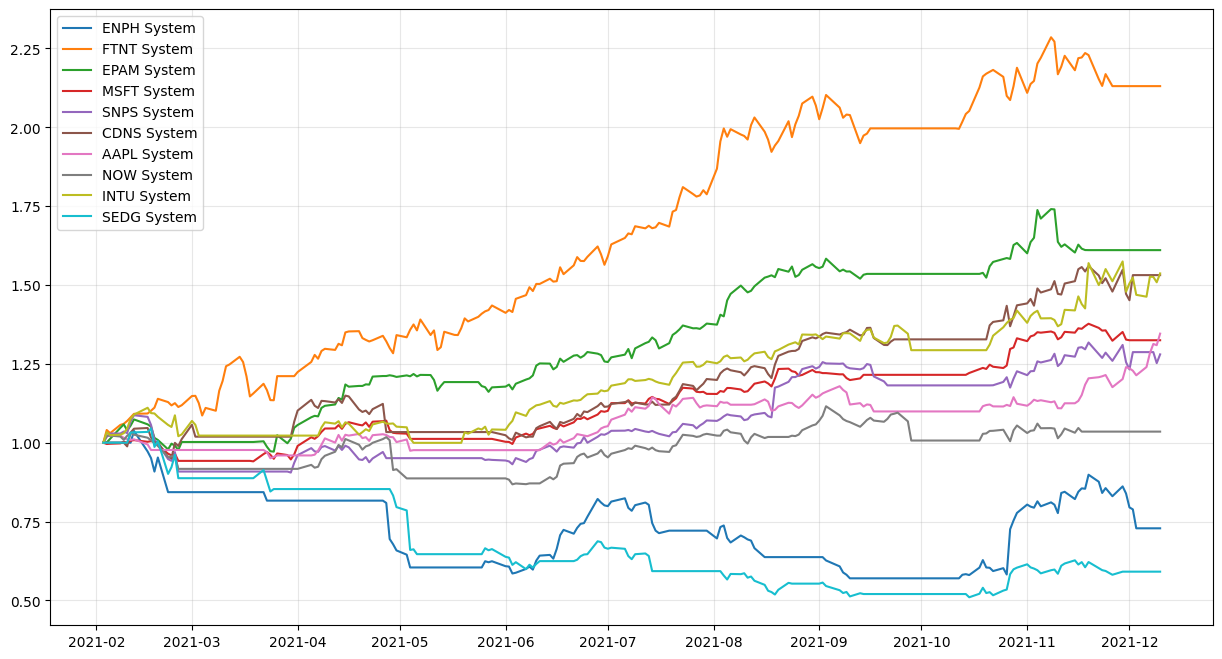

In [ ]:
plt.figure(figsize=(15, 8))

for i, dfI_T10 in enumerate(dataframes_listIT10):
    # Plot the cumulative returns for each dataframe
    plt.plot(np.exp(dfI_T10['system_return']).cumprod(), label=f"{IT10[i]} System")

# Display the plot
plt.legend(loc='upper left')
plt.grid(True, alpha=.3)
plt.show()

###**2.2.2 RS Sector**

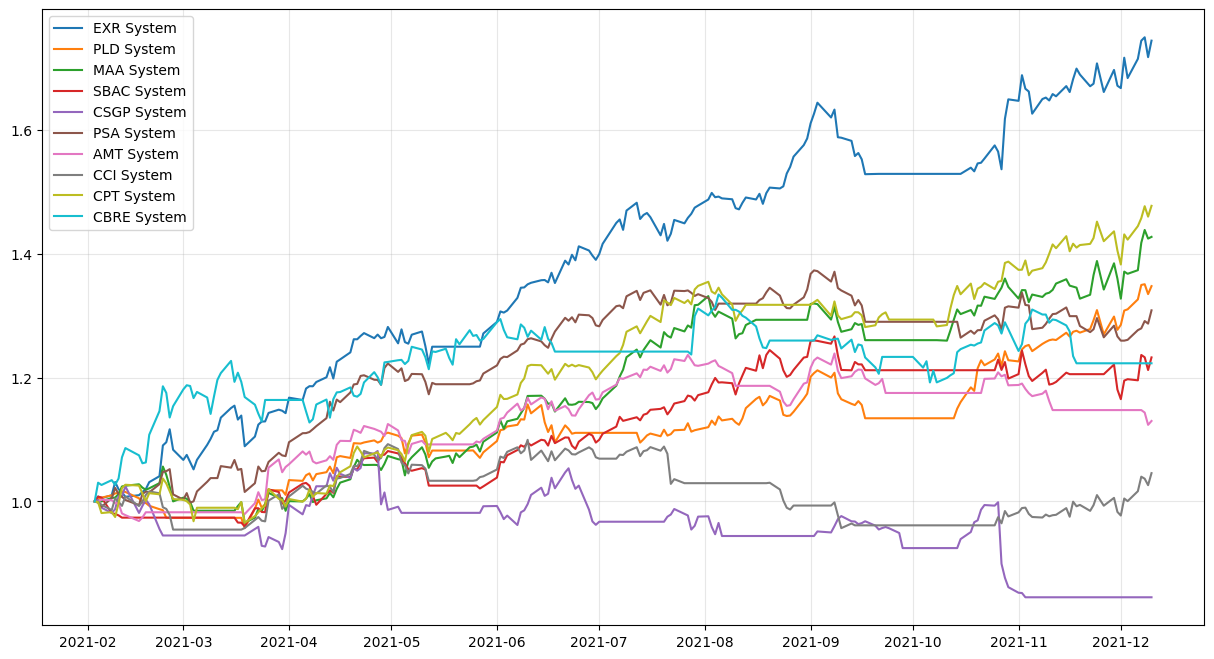

In [ ]:
plt.figure(figsize=(15, 8))

for i, dfRS10 in enumerate(dataframes_list_RS10):
    # Plot the cumulative returns for each dataframe
    plt.plot(np.exp(dfRS10['system_return']).cumprod(), label=f"{RS10[i]} System")

# Display the plot
plt.legend(loc='upper left')
plt.grid(True, alpha=.3)
plt.show()

###**2.2.3 Utility Sector**

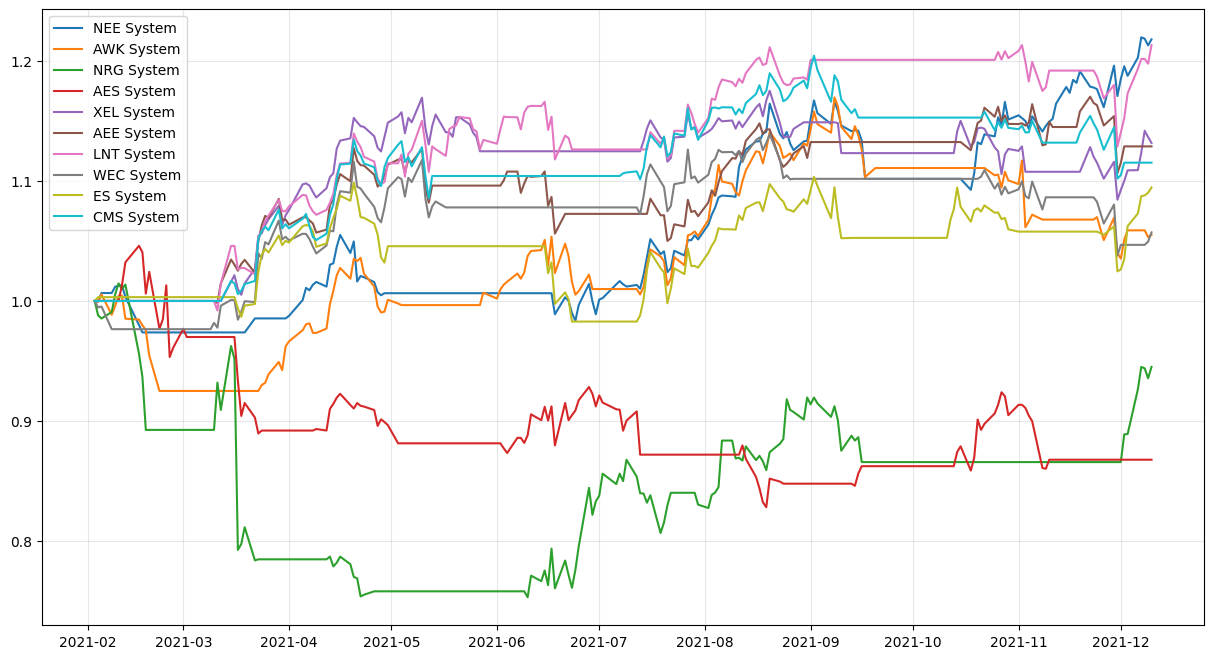

In [ ]:
plt.figure(figsize=(15, 8))

for i, dfU10 in enumerate(dataframes_listU10):
    # Plot the cumulative returns for each dataframe
    plt.plot(np.exp(dfU10['system_return']).cumprod(), label=f"{U10[i]} System")

# Display the plot
plt.legend(loc='upper left')
plt.grid(True, alpha=.3)
plt.show()


##**2.3 CONCLUSIONS (-3 pts if this discussion is missing)**

**Present a conclusion for each sector and mention explicitly the top-three performing stocks of each sector; nine stocks will be mentioned in this discussion (-3 pts if this discussion is missing).**

###**2.3.1 IT Sector top 3**

####**2.3.1.a IT Sector Buy and Hold Returns**

In [ ]:
# Create a list to store the results
B_H_strategy_returns_IT10 = []

# Loop through each dataframe in the list
for i, dfI_T10 in enumerate(dataframes_listIT10):
    # Apply log return calculation
    dfI_T10['logClose'] = np.log(dfI_T10['Close'])
    dfI_T10['return'] = dfI_T10['logClose'].diff()

    # Calculate the strategy return for each dataframe
    strategy_return = np.exp(np.sum(dfI_T10['return'])) - 1

    # Display the result for each dataframe
    print(f"Ticker: {IT10[i]}, B_H_Strategy Return: {strategy_return}")

    # Store the result for further analysis if needed
    B_H_strategy_returns_IT10.append((IT10[i], strategy_return))

# Create a DataFrame from the list of strategy returns
returns_df_IT10 = pd.DataFrame(B_H_strategy_returns_IT10, columns=['Ticker', 'B_HReturn'])

# Sort the DataFrame by 'Strategy_Return' in descending order
returns_df_IT10 = returns_df_IT10.sort_values(by='B_HReturn', ascending=False)

# Display the sorted DataFrame
print("\nreturns_df_IT10 sorted")
print(returns_df_IT10)

Ticker: ENPH, B_H_Strategy Return: 0.095141123983842
Ticker: FTNT, B_H_Strategy Return: 1.2040154036221806
Ticker: EPAM, B_H_Strategy Return: 0.8700573995385277
Ticker: MSFT, B_H_Strategy Return: 0.4096296647939177
Ticker: SNPS, B_H_Strategy Return: 0.3662381056984594
Ticker: CDNS, B_H_Strategy Return: 0.36582101606643236
Ticker: AAPL, B_H_Strategy Return: 0.33977895831937843
Ticker: NOW, B_H_Strategy Return: 0.12199769809672834
Ticker: INTU, B_H_Strategy Return: 0.7833750443032719
Ticker: SEDG, B_H_Strategy Return: 0.006545557683721004

returns_df_IT10 sorted
  Ticker  B_HReturn
1   FTNT       1.20
2   EPAM       0.87
8   INTU       0.78
3   MSFT       0.41
4   SNPS       0.37
5   CDNS       0.37
6   AAPL       0.34
7    NOW       0.12
0   ENPH       0.10
9   SEDG       0.01


####**2.3.1.b Creating IT Sector perfomance Table**

In [ ]:
returns_df_IT10

,Ticker,B_HReturn
1,FTNT,1.20
2,EPAM,0.87
8,INTU,0.78
3,MSFT,0.41
4,SNPS,0.37
5,CDNS,0.37
6,AAPL,0.34
7,NOW,0.12
0,ENPH,0.10
9,SEDG,0.01


In [ ]:
Momentum_returns_dfIT

,Ticker,Momentum_Return
1,FTNT,1.13
2,EPAM,0.61
8,INTU,0.54
5,CDNS,0.53
6,AAPL,0.35
3,MSFT,0.32
4,SNPS,0.28
7,NOW,0.04
0,ENPH,-0.27
9,SEDG,-0.41


In [ ]:
# Concatenate the dataframes based on the 'Ticker' column
concatenated_df = pd.concat([Momentum_returns_dfIT.set_index('Ticker'), returns_df_IT10.set_index('Ticker')], axis=1, join='inner')

# Calculate the difference between 'Momentum_Return' and 'B_UReturn'
concatenated_df['Momentum_Performance'] = concatenated_df['Momentum_Return'] - concatenated_df['B_HReturn']

# Sort the dataframe by 'Momentum_Performance' in descending order
Momentum_performanceIT = concatenated_df.sort_values(by='Momentum_Performance', ascending=False).reset_index()

# Display the resulting dataframe
print(Momentum_performanceIT)

  Ticker  Momentum_Return  B_HReturn  Momentum_Performance
0   CDNS             0.53       0.37                  0.17
1   AAPL             0.35       0.34                  0.01
2   FTNT             1.13       1.20                 -0.07
3   MSFT             0.32       0.41                 -0.08
4   SNPS             0.28       0.37                 -0.09
5    NOW             0.04       0.12                 -0.09
6   INTU             0.54       0.78                 -0.25
7   EPAM             0.61       0.87                 -0.26
8   ENPH            -0.27       0.10                 -0.37
9   SEDG            -0.41       0.01                 -0.42


####**2.3.1.c Selecting IT Sector Momentum Strategy top 3 Stocks**

In [ ]:
Top_3_MomentumIT=Momentum_performanceIT.head(3)
Top_3_MomentumIT

,Ticker,Momentum_Return,B_HReturn,Momentum_Performance
0,CDNS,0.53,0.37,0.17
1,AAPL,0.35,0.34,0.01
2,FTNT,1.13,1.20,-0.07


###**2.3.2 RS Sector top 3**

####**2.3.2.a RS Sector Buy and Hold Returns**

In [ ]:
# Create a list to store the results
B_H_strategy_returns_RS10 = []

# Loop through each dataframe in the list
for i, df in enumerate(dataframes_list):
    # Apply log return calculation
    df['logClose'] = np.log(df['Close'])
    df['return'] = df['logClose'].diff()

    # Calculate the strategy return for each dataframe
    strategy_return = np.exp(np.sum(df['return'])) - 1

    # Display the result for each dataframe
    print(f"Ticker: {RS10[i]}, B_H_Strategy Return: {strategy_return}")

    # Store the result for further analysis if needed
    B_H_strategy_returns_RS10.append((RS10[i], strategy_return))

# Create a DataFrame from the list of strategy returns
returns_df_RS10 = pd.DataFrame(B_H_strategy_returns_RS10, columns=['Ticker', 'B_HReturn'])

# Sort the DataFrame by 'Strategy_Return' in descending order
returns_df_RS10 = returns_df_RS10.sort_values(by='B_HReturn', ascending=False)

# Display the sorted DataFrame
print("\returns_df_RS10 sorted")
print(returns_df_RS10)

Ticker: EXR, B_H_Strategy Return: 0.7990690705166874
Ticker: PLD, B_H_Strategy Return: 0.5001886123876942
Ticker: MAA, B_H_Strategy Return: 0.606933341488872
Ticker: SBAC, B_H_Strategy Return: 0.3190136671919659
Ticker: CSGP, B_H_Strategy Return: -0.14711784019671903
Ticker: PSA, B_H_Strategy Return: 0.5045395391634668
Ticker: AMT, B_H_Strategy Return: 0.17330295806778895
Ticker: CCI, B_H_Strategy Return: 0.1841750574729626
Ticker: CPT, B_H_Strategy Return: 0.6742819165033573
Ticker: CBRE, B_H_Strategy Return: 0.5791076570682911
eturns_df_RS10 sorted
  Ticker  B_HReturn
0    EXR       0.80
8    CPT       0.67
2    MAA       0.61
9   CBRE       0.58
5    PSA       0.50
1    PLD       0.50
3   SBAC       0.32
7    CCI       0.18
6    AMT       0.17
4   CSGP      -0.15


####**2.3.2.b Creating RS Sector perfomance Table**

In [ ]:
returns_df_RS10

,Ticker,B_HReturn
0,EXR,0.80
8,CPT,0.67
2,MAA,0.61
9,CBRE,0.58
5,PSA,0.50
1,PLD,0.50
3,SBAC,0.32
7,CCI,0.18
6,AMT,0.17
4,CSGP,-0.15


In [ ]:
Momentum_returns_dfRS

,Ticker,Momentum_Return
0,EXR,0.74
8,CPT,0.48
2,MAA,0.43
1,PLD,0.35
5,PSA,0.31
3,SBAC,0.23
9,CBRE,0.22
6,AMT,0.13
7,CCI,0.05
4,CSGP,-0.15


In [ ]:
# Concatenate the dataframes based on the 'Ticker' column
concatenated_df = pd.concat([Momentum_returns_dfRS.set_index('Ticker'), returns_df_RS10.set_index('Ticker')], axis=1, join='inner')

# Calculate the difference between 'Momentum_Return' and 'B_UReturn'
concatenated_df['Momentum_Performance'] = concatenated_df['Momentum_Return'] - concatenated_df['B_HReturn']

# Sort the dataframe by 'Momentum_Performance' in descending order
Momentum_performanceRS = concatenated_df.sort_values(by='Momentum_Performance', ascending=False).reset_index()

# Display the resulting dataframe
print(Momentum_performanceRS)

  Ticker  Momentum_Return  B_HReturn  Momentum_Performance
0   CSGP            -0.15      -0.15                 -0.01
1    AMT             0.13       0.17                 -0.04
2    EXR             0.74       0.80                 -0.06
3   SBAC             0.23       0.32                 -0.09
4    CCI             0.05       0.18                 -0.14
5    PLD             0.35       0.50                 -0.15
6    MAA             0.43       0.61                 -0.18
7    PSA             0.31       0.50                 -0.20
8    CPT             0.48       0.67                 -0.20
9   CBRE             0.22       0.58                 -0.36


####**2.3.2.c Selecting RS Sector Momentum Strategy top 3 Stocks**

In [ ]:
Top_3_MomentumRS=Momentum_performanceRS.head(3)
Top_3_MomentumRS

,Ticker,Momentum_Return,B_HReturn,Momentum_Performance
0,CSGP,-0.15,-0.15,-0.01
1,AMT,0.13,0.17,-0.04
2,EXR,0.74,0.80,-0.06


###**2.3.3 Utility Sector top 3**





####**2.3.3.a Utility Sector Buy and Hold Returns**

In [ ]:
# Create a list to store the results
B_H_strategy_returns_U10 = []

# Loop through each dataframe in the list
for i, dfU10 in enumerate(dataframes_listU10):
    # Apply log return calculation
    dfU10['logClose'] = np.log(dfU10['Close'])
    dfU10['return'] = dfU10['logClose'].diff()

    # Calculate the strategy return for each dataframe
    strategy_returnU10 = np.exp(np.sum(dfU10['return'])) - 1

    # Display the result for each dataframe
    print(f"Ticker: {U10[i]}, B_H_Strategy Return: {strategy_returnU10}")

    # Store the result for further analysis if needed
    B_H_strategy_returns_U10.append((U10[i], strategy_returnU10))

# Create a DataFrame from the list of strategy returns
B_H_returns_df_U10 = pd.DataFrame(B_H_strategy_returns_U10, columns=['Ticker', 'B_HReturn'])

# Sort the DataFrame by 'Return' in descending order
B_H_returns_df_U10 = B_H_returns_df_U10.sort_values(by='B_HReturn', ascending=False)

# Display the sorted DataFrame
print("B_H_returns U10 sorted")
print(B_H_returns_df_U10)

Ticker: NEE, B_H_Strategy Return: 0.08705593572384562
Ticker: AWK, B_H_Strategy Return: 0.07330448317930283
Ticker: NRG, B_H_Strategy Return: -0.08478564653190457
Ticker: AES, B_H_Strategy Return: -0.05531915992546255
Ticker: XEL, B_H_Strategy Return: 0.05270658143352125
Ticker: AEE, B_H_Strategy Return: 0.19934012133401846
Ticker: LNT, B_H_Strategy Return: 0.1991447496996248
Ticker: WEC, B_H_Strategy Return: 0.0717725527243458
Ticker: ES, B_H_Strategy Return: -0.0013636675747964455
Ticker: CMS, B_H_Strategy Return: 0.09318178225988483
B_H_returns U10 sorted
  Ticker  B_HReturn
5    AEE       0.20
6    LNT       0.20
9    CMS       0.09
0    NEE       0.09
1    AWK       0.07
7    WEC       0.07
4    XEL       0.05
8     ES      -0.00
3    AES      -0.06
2    NRG      -0.08


####**2.3.3.b  Creating Utility Sector perfomance Table**

In [ ]:
Momentum_returns_dfU

,Ticker,Momentum_Return
0,NEE,0.22
6,LNT,0.21
4,XEL,0.13
5,AEE,0.13
9,CMS,0.12
8,ES,0.09
7,WEC,0.06
1,AWK,0.06
2,NRG,-0.05
3,AES,-0.13


In [ ]:
B_H_returns_df_U10

,Ticker,B_HReturn
5,AEE,0.20
6,LNT,0.20
9,CMS,0.09
0,NEE,0.09
1,AWK,0.07
7,WEC,0.07
4,XEL,0.05
8,ES,-0.00
3,AES,-0.06
2,NRG,-0.08


In [ ]:
# Concatenate the dataframes based on the 'Ticker' column
concatenated_df = pd.concat([Momentum_returns_dfU.set_index('Ticker'), B_H_returns_df_U10.set_index('Ticker')], axis=1, join='inner')

# Calculate the difference between 'Momentum_Return' and 'B_UReturn'
concatenated_df['Momentum_Performance'] = concatenated_df['Momentum_Return'] - concatenated_df['B_HReturn']

# Sort the dataframe by 'Momentum_Performance' in descending order
Momentum_performanceU = concatenated_df.sort_values(by='Momentum_Performance', ascending=False).reset_index()

# Display the resulting dataframe
print(Momentum_performanceU)

  Ticker  Momentum_Return  B_HReturn  Momentum_Performance
0    NEE             0.22       0.09                  0.13
1     ES             0.09      -0.00                  0.10
2    XEL             0.13       0.05                  0.08
3    NRG            -0.05      -0.08                  0.03
4    CMS             0.12       0.09                  0.02
5    LNT             0.21       0.20                  0.01
6    WEC             0.06       0.07                 -0.01
7    AWK             0.06       0.07                 -0.02
8    AEE             0.13       0.20                 -0.07
9    AES            -0.13      -0.06                 -0.08


####**2.3.3.c Selecting Utility Sector Momentum Strategy top 3 Stocks**

In [ ]:
Top_3_MomentumU=Momentum_performanceU.head(3)
Top_3_MomentumU

,Ticker,Momentum_Return,B_HReturn,Momentum_Performance
0,NEE,0.22,0.09,0.13
1,ES,0.09,-0.00,0.10
2,XEL,0.13,0.05,0.08


###**2.3.4 Top 3 Stocks per Sector Conclusion**

In [ ]:
list_of_top_3 = [Top_3_MomentumIT, Top_3_MomentumRS, Top_3_MomentumU]
list_of_names = ["Top_3_MomentumIT", "Top_3_MomentumRS", "Top_3_MomentumU"]

# Create an empty list to store ticker names
top_9 = []

for name, df in zip(list_of_names, list_of_top_3):
    # Display the name of the dataframe as a header
    print(f"\nDataFrame Name: {name}")

    # Display the dataframe
    print(df)

    # Display a separating line
    print("=" * 50)

    # Collect ticker names
    ticker_column = df['Ticker'].tolist()
    top_9.extend(ticker_column)

# Display the list of all tickers
print("\nList of top_9:")
print(top_9)


DataFrame Name: Top_3_MomentumIT
  Ticker  Momentum_Return  B_HReturn  Momentum_Performance
0   CDNS             0.53       0.37                  0.17
1   AAPL             0.35       0.34                  0.01
2   FTNT             1.13       1.20                 -0.07

DataFrame Name: Top_3_MomentumRS
  Ticker  Momentum_Return  B_HReturn  Momentum_Performance
0   CSGP            -0.15      -0.15                 -0.01
1    AMT             0.13       0.17                 -0.04
2    EXR             0.74       0.80                 -0.06

DataFrame Name: Top_3_MomentumU
  Ticker  Momentum_Return  B_HReturn  Momentum_Performance
0    NEE             0.22       0.09                  0.13
1     ES             0.09      -0.00                  0.10
2    XEL             0.13       0.05                  0.08

List of top_9:
['CDNS', 'AAPL', 'FTNT', 'CSGP', 'AMT', 'EXR', 'NEE', 'ES', 'XEL']


**IT Sector**

Based on our comprehensive analysis of momentum trading stock data, the top performers were identified as:

               1. CDNS- Cadence Design System Inc.
               2. AAPL- Apple Inc.  
               3. FTNT- Fortinet Inc.




*   CDNS stood out as the top performer, boasting a momentum return value of 0.531, signifying its outstanding performance. The notable increase in CDNS investor attention can be credited to its crucial involvement in hardware development and distribution following the post-COVID-19 era, substantially elevating its stock value and growth potential, thereby distinguishing it from other stocks.

*   AAPL demonstrated praiseworthy results as the second-highest performer, sustaining steady daily returns and concluding with a gradual upward trend. With a momentum return value of 0.345, AAPL exhibited noteworthy performance throughout the evaluated period.

* The third best is FTNT, which is quiet remarkable. Comapring the scenario, it's unprecedented increase in investor attention attributed to its pivotal role during the pandemic, promoting elevated growth potential and setting it apart from its peers in the IT sector.


              

**RS Sector**

Based on our comprehensive analysis of momentum trading stock data, the top performers were identified as:

               1. CSGP- CoStar Group Inc.
               2. AMT- American Tower Corporation  
               3. EXR- Extra Space Storage Inc.  



*   The standout performer among its peers was CSGP, demonstrating impressive stability and a consistently upward trend in its returns. With a momentum return of 0.13, CSGP emerged as the top performer in this analysis.

*   Closely trailing behind, CPT initially unveiled a surprising disclosure. Yet, upon thorough examination of the momentum trading analysis chart, it became clear that EXR slightly surpassed CPT, achieving a system yield of 0.743, winning by a considerable margin. Remarkably, when implementing the buy-and-hold strategy, EXR demonstrated a return of 0.79, significantly outperforming other stocks.






**Utilities Sector**

Based on our comprehensive analysis of momentum trading stock data, the top performers were identified as:

               1. NEE- NextEra Energy Inc.  
               2. ES- Eversource Energy   
               3. XEL- Xcel Energy Inc.  



*   The utilities sector stocks generally exhibited a comparable pattern, but these three distinguished themselves as the leading performers. Discrepancies in their performance can be attributed to differences in liquidity and financial robustness.

*   NEE led with a momentum return of 0.217, followed by ES with a system return of 0.09, while XEL displayed the third highest performance among them, registering a value of 0.131.

* All of the stocks have positive momentum performance but on the other hand, ES have a negative correlation in the Buy and Hold return model. Which indicates that, stocks experience price fluctuations or short-term trends that align effectively with strategies employed in momentum trading.



#**3 - OPTIMIZATION MODEL (20 pts)**

##**3.1 Portfolio allocation model for different and risk levels. (10 pts)**

Run the portfolio allocation model for different and adequate risk levels using the nine stocks selected in the previous step. Namely, we want to see when the risk levels are too small and when the risk levels are too large. (Warning: the risk levels used in class may be too small or too big for your assets - you will need to test different ranges to find an adequate one).

You should consider at least 100 risk levels (-3 pts)
At least one risk level tested by your code must be discarded for being too small and leading to an infeasible problem (-3 pts).

You should not set any lower bound on the expected returns (-5 pts if you add such a constraint to your model - be careful with copy and paste!).

You should run the optimization model once per risk level only, i.e., your notebook should only have the code block that removes infeasible solutions  (-3 pts if the optimization model is unnecessarily executed for the same risk level more than once, e.g., without removing infeasible solutions - be careful with copy and paste!)

You should use daily data from January 1, 2017, to December 31, 2021, to train your model (-3 points if an incorrect period is used).

####**3.1.1 Importing Libraries**

In [ ]:
%matplotlib inline
from pylab import *

import shutil
import sys
import os.path

if not shutil.which("pyomo"):
    !pip install -q pyomo
    assert(shutil.which("pyomo"))

if not shutil.which("ipopt"):
    # here is the IPOPT zip file
    !gdown 10XRvLZqrpSNiXVAN-pipU52BVRwoGcNQ
    !unzip -o -q ipopt-linux64_dw
    assert(shutil.which("ipopt") or os.path.isfile("ipopt"))

from pyomo.environ import *

SOLVER = 'ipopt'
EXECUTABLE = '/content/ipopt'
ipopt_executable = '/content/ipopt'

Downloading...
From: https://drive.google.com/uc?id=10XRvLZqrpSNiXVAN-pipU52BVRwoGcNQ
To: /content/ipopt-linux64_dw.zip
100% 1.82M/1.82M [00:00<00:00, 14.4MB/s]


####**3.1.2 Creating Dataframe**

In [ ]:
top_9

['CDNS', 'AAPL', 'FTNT', 'CSGP', 'AMT', 'EXR', 'NEE', 'ES', 'XEL']

In [ ]:
#Using ticker top 9
#Use historical price data for each stocks to later compare with our new score later
top_9_prices = {ticker : si.get_data(ticker,start_date = '01/01/2017',end_date='12/31/2021',interval='1d') for ticker in top_9}

In [ ]:
#Now we are only exctracting the data that we need. (adjclose)
#Then we get the adjclose price for the CDNS (one sample)
prep_data_top_9= pd.DataFrame(top_9_prices['CDNS']['adjclose']).rename(columns = {"adjclose":"CDNS"})

#After that we combine all the tickers (all the rest of the samples)
for i in top_9[1:]:
  prep_data_top_9[i] = pd.DataFrame(top_9_prices[i]['adjclose'])

In [ ]:
#Then we will just use a pct_change as the return.
return_top_9 = pd.DataFrame()
for i in top_9:
  return_top_9[i] = prep_data_top_9[i].pct_change()
#We will also drop any of the na records.
return_top_9.dropna(inplace=True)
return_top_9

,CDNS,AAPL,FTNT,CSGP,AMT,EXR,NEE,ES,XEL
2017-01-04,0.01,-0.00,0.01,0.02,0.00,0.01,0.00,0.00,0.00
2017-01-05,0.00,0.01,0.01,0.00,-0.00,0.01,-0.00,0.00,0.00
2017-01-06,-0.00,0.01,0.01,0.00,-0.01,0.01,-0.00,-0.00,0.00
2017-01-09,0.00,0.01,0.01,0.00,-0.00,-0.01,-0.00,-0.01,-0.02
2017-01-10,0.00,0.00,0.02,0.01,-0.01,-0.02,0.00,-0.01,-0.00
...,...,...,...,...,...,...,...,...,...
2021-12-23,0.00,0.00,0.00,0.01,-0.00,-0.00,-0.00,0.00,-0.00
2021-12-27,0.02,0.02,0.05,0.00,0.03,0.02,0.01,-0.00,0.00
2021-12-28,-0.01,-0.01,-0.00,-0.00,0.01,0.00,0.01,0.01,0.01
2021-12-29,-0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.01,0.01


####**3.1.3 Checking Covariance, Std Deviations and Average Returns**

In [ ]:
# creating covariance table on stock return dataframe
df_cov_top_9 = return_top_9.cov()
print('Covariance Matrix:')
print(df_cov_top_9)
print('\n') # return/blank line

# create the average of each stock
# these are the objective function COEFFICIENTS!
df_ave_top_9 = return_top_9.mean()
print('Average Return:')
print(df_ave_top_9)

Covariance Matrix:
      CDNS  AAPL  FTNT  CSGP  AMT  EXR  NEE   ES  XEL
CDNS  0.00  0.00  0.00  0.00 0.00 0.00 0.00 0.00 0.00
AAPL  0.00  0.00  0.00  0.00 0.00 0.00 0.00 0.00 0.00
FTNT  0.00  0.00  0.00  0.00 0.00 0.00 0.00 0.00 0.00
CSGP  0.00  0.00  0.00  0.00 0.00 0.00 0.00 0.00 0.00
AMT   0.00  0.00  0.00  0.00 0.00 0.00 0.00 0.00 0.00
EXR   0.00  0.00  0.00  0.00 0.00 0.00 0.00 0.00 0.00
NEE   0.00  0.00  0.00  0.00 0.00 0.00 0.00 0.00 0.00
ES    0.00  0.00  0.00  0.00 0.00 0.00 0.00 0.00 0.00
XEL   0.00  0.00  0.00  0.00 0.00 0.00 0.00 0.00 0.00


Average Return:
CDNS   0.00
AAPL   0.00
FTNT   0.00
CSGP   0.00
AMT    0.00
EXR    0.00
NEE    0.00
ES     0.00
XEL    0.00
dtype: float64


####**3.1.4 Checking the highest Covariance**

**GROUP COMMENT:** To avoid trial and error process, we just sort the covariance to get sense of our risk range, in this case it goes from 0.000059 to 0.000575.

In [ ]:
# Unstack the upper triangular part of the covariance matrix
df_cov_top_9_unstacked = df_cov_top_9.unstack()

# Sort the values in descending order
df_cov_top_9_cov_sorted = df_cov_top_9_unstacked.sort_values(ascending=False)

# Print the sorted covariance values
print('Sorted Covariances:')
print(df_cov_top_9_cov_sorted)


Sorted Covariances:
FTNT  FTNT   0.00
CDNS  CDNS   0.00
AAPL  AAPL   0.00
CSGP  CSGP   0.00
CDNS  FTNT   0.00
             ... 
EXR   CDNS   0.00
ES    FTNT   0.00
FTNT  ES     0.00
XEL   FTNT   0.00
FTNT  XEL    0.00
Length: 81, dtype: float64


####**3.1.5 Defining Variables**

In [ ]:
from pyomo.environ import *
m = ConcreteModel()

# defining variables
# each one is a stock ['CDNS', 'AAPL', 'FTNT', 'CSGP', 'AMT', 'EXR', 'NEE', 'ES', 'XEL']
m.CDNS = Var(within=NonNegativeReals, bounds=(0,1))
m.AAPL = Var(within=NonNegativeReals, bounds=(0,1))
m.FTNT = Var(within=NonNegativeReals, bounds=(0,1))
m.CSGP = Var(within=NonNegativeReals, bounds=(0,1))
m.AMT = Var(within=NonNegativeReals, bounds=(0,1))
m.EXR = Var(within=NonNegativeReals, bounds=(0,1))
m.NEE = Var(within=NonNegativeReals, bounds=(0,1))
m.ES = Var(within=NonNegativeReals, bounds=(0,1))
m.XEL = Var(within=NonNegativeReals, bounds=(0,1))

####**3.1.6 Declaring Objective**

In [ ]:
# declare objective
m.objective = Objective(expr =
                        m.CDNS*df_ave_top_9[0] +
                        m.AAPL*df_ave_top_9[1] +
                        m.FTNT*df_ave_top_9[2] +
                        m.CSGP*df_ave_top_9[3] +
                        m.AMT*df_ave_top_9[4] +
                        m.EXR*df_ave_top_9[5] +
                        m.NEE*df_ave_top_9[6] +
                        m.ES*df_ave_top_9[7] +
                        m.XEL*df_ave_top_9[8],
                        sense=maximize) # yes, we want to MAX our returns!

# declare constraints
# 1. Sum of all proportions = 1
m.sum_proportions = Constraint(expr = m.CDNS + m.AAPL + m.FTNT + m.CSGP + m.AMT + m.EXR + m.NEE + m.ES + m.XEL == 1)

# 2. Set maximum risk:
m.total_risk = Constraint(expr = m.CDNS + m.AAPL + m.FTNT + m.CSGP + m.AMT + m.EXR + m.NEE + m.ES + m.XEL >= 0.0)



####**3.1.7 Calculating Risk**

**GROUP COMMENT:** We selected our maximum risk to 0.0007 because we want a plateau in the right side of our graph.

We started from 0 to get a plateau in left side of the graph, also doing this we fullfill the profesors requeriments.



In [ ]:
# creating calculations table for calculate the risk
# 4. Calculate risk
def calc_risk(m):
  variables = m.CDNS, m.AAPL, m.FTNT, m.CSGP, m.AMT, m.EXR, m.NEE, m.ES, m.XEL
  tickers = ['CDNS', 'AAPL', 'FTNT', 'CSGP', 'AMT', 'EXR', 'NEE', 'ES', 'XEL']
  risk_exp = 0
  for i in range(len(variables)):
    for j in range(len(variables)):
      risk_exp += variables[i]*df_cov_top_9.at[tickers[i],tickers[j]]*variables[j]
  return risk_exp

# We are going to use this expression to compute the risk
expr_risk = calc_risk(m)

# 5. Max risk should be less than 0.01
max_risk = 0.0007
step_size = max_risk/100
# Sequence of risk levels
risk_limits = np.arange(0, max_risk+step_size, step_size) # take tiny steps
risk_limits

array([0.00e+00, 7.00e-06, 1.40e-05, 2.10e-05, 2.80e-05, 3.50e-05,
       4.20e-05, 4.90e-05, 5.60e-05, 6.30e-05, 7.00e-05, 7.70e-05,
       8.40e-05, 9.10e-05, 9.80e-05, 1.05e-04, 1.12e-04, 1.19e-04,
       1.26e-04, 1.33e-04, 1.40e-04, 1.47e-04, 1.54e-04, 1.61e-04,
       1.68e-04, 1.75e-04, 1.82e-04, 1.89e-04, 1.96e-04, 2.03e-04,
       2.10e-04, 2.17e-04, 2.24e-04, 2.31e-04, 2.38e-04, 2.45e-04,
       2.52e-04, 2.59e-04, 2.66e-04, 2.73e-04, 2.80e-04, 2.87e-04,
       2.94e-04, 3.01e-04, 3.08e-04, 3.15e-04, 3.22e-04, 3.29e-04,
       3.36e-04, 3.43e-04, 3.50e-04, 3.57e-04, 3.64e-04, 3.71e-04,
       3.78e-04, 3.85e-04, 3.92e-04, 3.99e-04, 4.06e-04, 4.13e-04,
       4.20e-04, 4.27e-04, 4.34e-04, 4.41e-04, 4.48e-04, 4.55e-04,
       4.62e-04, 4.69e-04, 4.76e-04, 4.83e-04, 4.90e-04, 4.97e-04,
       5.04e-04, 5.11e-04, 5.18e-04, 5.25e-04, 5.32e-04, 5.39e-04,
       5.46e-04, 5.53e-04, 5.60e-04, 5.67e-04, 5.74e-04, 5.81e-04,
       5.88e-04, 5.95e-04, 6.02e-04, 6.09e-04, 6.16e-04, 6.23e

In [ ]:
len(risk_limits) #Double cheking the length

101

####**3.1.8 Runing the model**

In [ ]:
# updating risk contraint for each limit and then solving the problem
param_analysis = {} # key=risk, value =stock allocations
returns = {} # key=risk, value = return
for r in risk_limits:
  # WE REMOVE AND RECALCULATE THE RISK IN EACH ITERATION
  m.del_component(m.total_risk)
  # The LHS remains unchanged; we only modify the RHS (risk threshold)
  m.total_risk = Constraint(expr = expr_risk <= r)
  # run solver
  result = SolverFactory('ipopt', executable=ipopt_executable).solve(m).write()
  # store our allocation proportions
  param_analysis[r] = [m.CDNS(), m.AAPL(), m.FTNT(), m.CSGP(), m.AMT(), m.EXR(), m.NEE(), m.ES(), m.XEL()]
  # store our returns
  # returns[r] = m.objective()
  returns[r] =  m.CDNS()*df_ave_top_9[0] + m.AAPL()*df_ave_top_9[1] + m.FTNT()*df_ave_top_9[2] + m.CSGP()*df_ave_top_9[3] + m.AMT()*df_ave_top_9[4] + m.EXR()*df_ave_top_9[5] + m.NEE()*df_ave_top_9[6] + m.ES()*df_ave_top_9[7] + m.XEL()*df_ave_top_9[8]

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.06464862823486328
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of 

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.02699565887451172
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of 

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.10759902000427246
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of 

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.029761075973510742
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.030376672744750977
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.02726149559020996
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of 

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.02012491226196289
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of 

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.02039194107055664
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of 

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.022637605667114258
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.02556324005126953
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of 

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.02459573745727539
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of 

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.02557826042175293
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of 

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.024135589599609375
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.023988008499145508
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.02135777473449707
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of 

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.017462491989135742
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: maxIterations
  - message from solver: Ipopt 3.12.13\x3a Maximum Number of Iterations Exceeded.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Maximum Number of Iterations Exceeded.
  Termination condition: maxIterations
  Id: 400
  Error rc: 0
  Time: 0.8700656890869141
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of so

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.02051687240600586
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of 

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.027624130249023438
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: maxIterations
  - message from solver: Ipopt 3.12.13\x3a Maximum Number of Iterations Exceeded.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Maximum Number of Iterations Exceeded.
  Termination condition: maxIterations
  Id: 400
  Error rc: 0
  Time: 0.910064697265625
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of sol

  - termination condition: maxIterations
  - message from solver: Ipopt 3.12.13\x3a Maximum Number of Iterations Exceeded.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Maximum Number of Iterations Exceeded.
  Termination condition: maxIterations
  Id: 400
  Error rc: 0
  Time: 1.3714509010314941
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of so

####**3.1.9 Infeasible solutions**

**Filtering out not feasible runs.**

In [ ]:
from pyomo.opt import SolverStatus, TerminationCondition

# updating risk contraint for each limit and then solving the problem
param_analysis = {} # key=risk, value =stock allocations
returns = {} # key=risk, value = return
for r in risk_limits:
  # Remove constraint to avoid error messages
  m.del_component(m.total_risk)
  m.total_risk = Constraint(expr = expr_risk <= r)
  # run solver
  result = SolverFactory('ipopt', executable=ipopt_executable).solve(m)

  # MAY NOT FILTER ALL INFEASIBLE OUTCOMES IN REAL-WORLD INSTANCES
  # # If solution is not feasible, ignore this run
  # if result.solver.termination_condition == TerminationCondition.infeasible:
  #   continue

  # If solution is not feasible, ignore this run
  if result.solver.termination_condition != TerminationCondition.optimal:
    continue

  result = result.write()

  # store our allocation proportions
  param_analysis[r] = [m.CDNS(), m.AAPL(), m.FTNT(), m.CSGP(), m.AMT(), m.EXR(), m.NEE(), m.ES(), m.XEL()]
  # store our returns
  returns[r] =  m.CDNS()*df_ave_top_9[0] + m.AAPL()*df_ave_top_9[1] + m.FTNT()*df_ave_top_9[2] + m.CSGP()*df_ave_top_9[3] + m.AMT()*df_ave_top_9[4] + m.EXR()*df_ave_top_9[5] + m.NEE()*df_ave_top_9[6] + m.ES()*df_ave_top_9[7] + m.XEL()*df_ave_top_9[8]

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally in

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.12.13\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.009795665740966797
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
# ====

##**3.2 Allocation into different stocks will vary for different risk levels.(5 pts)**

The plot must show the efficient frontier reaching the plateau (-2 pts)

The plateau should not be more than 25% of the plot (-2 pts)

The plot should not contain infeasible allocations (-2 pts)

The plot must have a legend (-2 pts)

The plot must show the results of at least 80% of the risk levels (-2 pts)

####**3.2.1  Parameter Analysis**

<Figure size 1200x600 with 0 Axes>

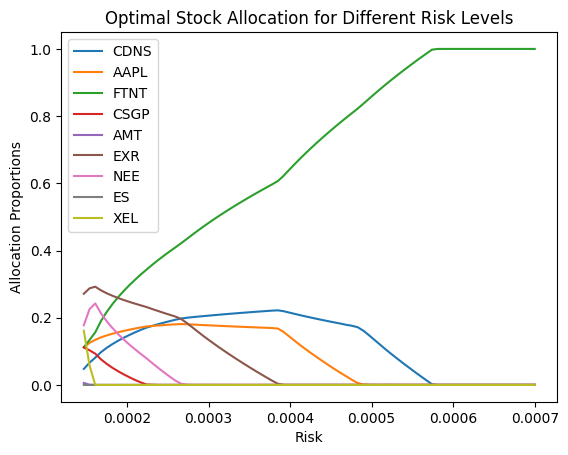

In [ ]:
# generating the dataframe for proportions of the portfolio for each risk limit
param_analysis = pd.DataFrame.from_dict(param_analysis, orient='index')
plt.figure(figsize=(12, 6))
param_analysis.columns = ['CDNS', 'AAPL', 'FTNT', 'CSGP', 'AMT', 'EXR', 'NEE', 'ES', 'XEL']
param_analysis.plot()
plt.title('Optimal Stock Allocation for Different Risk Levels')
xlabel('Risk')
ylabel('Allocation Proportions')
plt.show()

##**3.3 Show the shape of the efficient frontier for different risk levels. (5 pts)**

The plot must show the efficient frontier reaching the plateau (-2 pts)

The plateau should not be more than 25% of the plot (-2 pts)

The plot should not contain infeasible allocations (-2 pts)

The plot must have a legend (-2 pts)

The plot must show the results of at least 80% of the risk levels (-2 pts)


###**3.3.1  Efficient Frontier**

In [ ]:
# Efficient Frontier Dictionary Reference
risk = list(returns.keys())
print(risk)
reward = list(returns.values())
print(reward)

[0.000147, 0.000154, 0.000161, 0.000168, 0.000175, 0.000182, 0.00018899999999999999, 0.000196, 0.000203, 0.00021, 0.000217, 0.000224, 0.000231, 0.00023799999999999998, 0.000245, 0.000252, 0.000259, 0.000266, 0.000273, 0.00028, 0.000287, 0.000294, 0.000301, 0.000308, 0.000315, 0.000322, 0.000329, 0.000336, 0.000343, 0.00035, 0.000357, 0.000364, 0.000371, 0.00037799999999999997, 0.000385, 0.000392, 0.000399, 0.000406, 0.000413, 0.00042, 0.00042699999999999997, 0.000434, 0.000441, 0.000448, 0.000455, 0.000462, 0.000469, 0.00047599999999999997, 0.000483, 0.00049, 0.000497, 0.000504, 0.000511, 0.000518, 0.000525, 0.000532, 0.000539, 0.000546, 0.000553, 0.00056, 0.000567, 0.000574, 0.000581, 0.000588, 0.000595, 0.000602, 0.000609, 0.000616, 0.000623, 0.00063, 0.000637, 0.000644, 0.000651, 0.000658, 0.000665, 0.000672, 0.000679, 0.000686, 0.000693, 0.0007]
[0.0012868441138805984, 0.0013802810917991975, 0.0014477320958784816, 0.001497640374266127, 0.001537739502506823, 0.0015722286132581274, 0

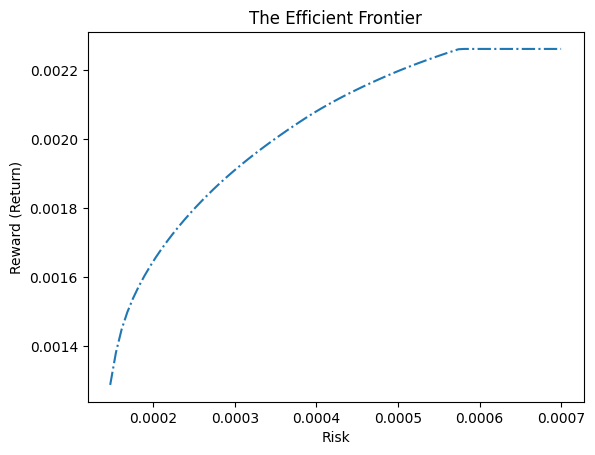

In [ ]:
# Plot for Efficient Frontier
from pylab import *
plot(risk, reward, '-.')
title('The Efficient Frontier')
xlabel('Risk')
ylabel('Reward (Return)')
plt.show()

##**3.4 Stocks Extracted from MPT**

Select one of the portfolio allocations returned by the optimization model containing exactly three stocks (-3 points if fewer or more assets are used).

The set of stocks and the allocation must be extracted from the MPT model (-3 points if another allocation is used; minor roundings are acceptable).

This portfolio allocation will be used in the analysis.


In [ ]:
# Creating a copy of param_analysis dataframe and dropping N/A
mpt_3 = param_analysis.copy()
mpt_3.dropna(inplace = True)

In [ ]:
# Math to check index for given risk level of 4%
(0.00039-0.000147)/(0.000007)

34.714285714285715

In [ ]:
# Set the precision for floating-point numbers
pd.set_option('display.float_format', '{:.2f}'.format)
mpt_3.iloc[35]


CDNS   0.22
AAPL   0.16
FTNT   0.62
CSGP   0.00
AMT    0.00
EXR    0.00
NEE    0.00
ES     0.00
XEL    0.00
Name: 0.000392, dtype: float64



```
# This is formatted as code
```

**GROUP COMMENT: So the final 3 stocks allocation proportions are CDNS 22%, AAPL 16%, FTNT 62%= 100%.**

#**4 - ANALYSIS (25 pts)**

Lets see how you would have applied the following investment strategies in 2022. You can suppose you have $100,000 to invest. You should use the portfolio allocation selected by the MPT model (-3 points if a different allocation is used).

Fractional shares are okay, i.e., if the stock costs 100, but your allocation restricts the purchase to 50, you will buy 0.5 shares of this stock (this is not a simplification; this happens in practice!).
Your solution will not be evaluated based on the

returns of your portfolio, i.e., if you lose money, it is OK!

##**4.1 Buy-and-Hold strategy for the MPT portfolio. (5 pts)**

Create a table that shows the amount of money invested in each stock of your portfolio on the first day of each month (i.e., how much money is currently invested in each stock) as well as the aggregate value of the entire portfolio from Jan 1, 2022 (when you would have done your allocation), February 1, 2022 …, through December 1, 2022.


In [ ]:
mpt_3

,CDNS,AAPL,FTNT,CSGP,AMT,EXR,NEE,ES,XEL
0.00,0.05,0.11,0.11,0.11,0.01,0.27,0.18,0.00,0.16
0.00,0.07,0.13,0.13,0.10,0.00,0.29,0.23,0.00,0.06
0.00,0.08,0.13,0.16,0.09,0.00,0.29,0.24,0.00,0.00
0.00,0.10,0.14,0.19,0.08,0.00,0.28,0.21,0.00,0.00
0.00,0.11,0.15,0.22,0.06,0.00,0.27,0.19,0.00,0.00
...,...,...,...,...,...,...,...,...,...
0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00


In [ ]:
mpt_3_list = ['CDNS', 'AAPL', 'FTNT']
mpt_3_list


['CDNS', 'AAPL', 'FTNT']

In [ ]:
# Install required packages
!pip install yahoo_fin

# Import necessary libraries
import yahoo_fin.stock_info as si
import pandas as pd

# Define the stock symbols and allocation
mpt_3_list = ['CDNS', 'AAPL', 'FTNT']
allocation = [0.4, 0.4, 0.2]  # Modify the allocation according to MPT model

# Function to get historical stock prices
def get_stock_prices(ticker, start_date, end_date):
    stock_data = si.get_data(ticker, start_date, end_date)
    return stock_data['adjclose']

# Function to implement Buy-and-Hold strategy
def buy_and_hold_strategy(tickers, allocation, start_date, end_date, initial_investment):
    portfolio_value = 0
    portfolio = pd.DataFrame()

    for i, ticker in enumerate(tickers):
        # Get stock prices
        stock_prices = get_stock_prices(ticker, start_date, end_date)

        # Calculate number of shares to buy
        allocation_amount = initial_investment * allocation[i]
        shares_to_buy = allocation_amount / stock_prices.iloc[0]

        # Calculate portfolio value
        portfolio[ticker] = shares_to_buy * stock_prices
        portfolio_value += portfolio[ticker]

    portfolio['Total Portfolio Value'] = portfolio_value
    return portfolio

# Define time period
start_date = '2022-01-01'
end_date = '2022-12-31'
initial_investment = 100000  # Initial investment amount

# Implement Buy-and-Hold strategy
portfolio = buy_and_hold_strategy(mpt_3_list, allocation, start_date, end_date, initial_investment)

# Print portfolio information
portfolio


,CDNS,AAPL,FTNT,Total Portfolio Value
2022-01-03,40000.00,40000.00,20000.00,100000.00
2022-01-04,38938.63,39492.34,19340.78,97771.75
2022-01-05,37698.19,38441.85,18221.06,94361.10
2022-01-06,37807.38,37800.12,18852.06,94459.56
2022-01-07,36256.82,37837.48,18891.69,92985.99
...,...,...,...,...
2022-12-23,35258.79,29146.82,14628.36,79033.97
2022-12-27,34953.05,28742.31,14574.33,78269.68
2022-12-28,34579.60,27860.34,14367.20,76807.14
2022-12-29,35363.61,28649.47,14772.45,78785.54


In [ ]:
# Resample to select the first day of each month
monthly_portfolio = portfolio.resample('MS').first()

# Print or use the resulting DataFrame
monthly_portfolio


,CDNS,AAPL,FTNT,Total Portfolio Value
2022-01-01,40000.00,40000.00,20000.00,100000.00
2022-02-01,33109.85,38373.73,18142.41,89625.99
2022-03-01,32873.99,35911.86,20282.78,89068.63
2022-04-01,36171.65,38356.59,20353.63,94881.87
2022-05-01,32865.25,34758.81,17532.42,85156.48
2022-06-01,33461.45,32771.45,17354.71,83587.61
2022-07-01,32679.62,30616.21,17222.02,80517.85
2022-08-01,40410.57,35592.20,18029.54,94032.30
2022-09-01,37134.74,34858.23,14574.33,86567.30
2022-10-01,37187.16,31435.52,15297.79,83920.47


##**4.2 (8-21) Momentum trading strategy on the S&P 500 index (^GSPC). (10 pts)**

In this investment, you should apply the 8-21 Momentum Trading strategy to the S&P 500 index (^GSPC), as it was a stock. Create a table that shows the value of each position in your portfolio on the first day of each month (i.e., how much money is currently allocated to each stock) as well as the aggregate value of the entire portfolio from Jan 1, 2022 (when you would have done your allocation), February 1, 2022 …, through December 1, 2022. When computing the moving averages, you must consider the last days of 2021; therefore, in principle, your model should be able to buy the stocks on Jan 1, 2022 (deduction of 3 points if the last days of 2021 are not used).  


**Knowing the last 21 business day of dec 2021**

In [ ]:
# Specify the date range for 2021
start_date = "2021-11-30"
end_date = "2021-12-31"

# Generate a date range for December 2021
date_range = pd.bdate_range(start=start_date, end=end_date)

# Select the last 21 business days
last_21_days = date_range[-22:]

# Print the result
last_21_days

DatetimeIndex(['2021-12-02', '2021-12-03', '2021-12-06', '2021-12-07',
               '2021-12-08', '2021-12-09', '2021-12-10', '2021-12-13',
               '2021-12-14', '2021-12-15', '2021-12-16', '2021-12-17',
               '2021-12-20', '2021-12-21', '2021-12-22', '2021-12-23',
               '2021-12-24', '2021-12-27', '2021-12-28', '2021-12-29',
               '2021-12-30', '2021-12-31'],
              dtype='datetime64[ns]', freq='B')

Knowing the first 21 business day of dec 2022

In [ ]:
# Define the start and end dates
start_date = "2022-01-01"
end_date = "2022-12-31"

# Generate a date range between start and end dates
date_range = pd.date_range(start=start_date, end=end_date, freq='B')  # 'B' stands for business day

# Get the first business day of 2022
first_business_day = date_range[0]

print("The first business day of 2022 is:", first_business_day)


The first business day of 2022 is: 2022-01-03 00:00:00


**Getting the data**

In [ ]:
# Specify the start and end dates
start_date = "2021-12-02"
end_date = "2022-12-02"

# Get historical data for S&P 500 (^GSPC) within the specified date range
sp500_data = si.get_data("^GSPC", start_date=start_date, end_date=end_date)

# Extract the 'close' prices
sp500_close_prices = sp500_data['close']

# Convert the data to a DataFrame
sp500_df = pd.DataFrame(sp500_close_prices, columns=['close'])

# Add a 'day' column to the DataFrame
day = np.arange(1, len(sp500_df) + 1)
sp500_df['day'] = day

# Reorder the columns
sp500_df = sp500_df[['day', 'close']]

# Display the DataFrame
sp500_df

,day,close
2021-12-02,1,4577.10
2021-12-03,2,4538.43
2021-12-06,3,4591.67
2021-12-07,4,4686.75
2021-12-08,5,4701.21
...,...,...
2022-11-25,248,4026.12
2022-11-28,249,3963.94
2022-11-29,250,3957.63
2022-11-30,251,4080.11


**Adding moving averages**

In [ ]:
sp500_df['9-day'] = sp500_df['close'].rolling(9).mean().shift()
sp500_df['21-day'] = sp500_df['close'].rolling(21).mean().shift()
sp500_df.dropna(inplace=True)
sp500_df

,day,close,9-day,21-day
2022-01-03,22,4796.56,4728.35,4682.47
2022-01-04,23,4793.54,4753.74,4692.92
2022-01-05,24,4700.58,4769.77,4705.07
2022-01-06,25,4696.05,4770.22,4710.26
2022-01-07,26,4677.03,4766.92,4710.70
...,...,...,...,...
2022-11-25,248,4026.12,3977.04,3888.11
2022-11-28,249,3963.94,3980.73,3897.42
2022-11-29,250,3957.63,3981.47,3904.88
2022-11-30,251,4080.11,3977.68,3907.58


**Checking how the moving averages behave**

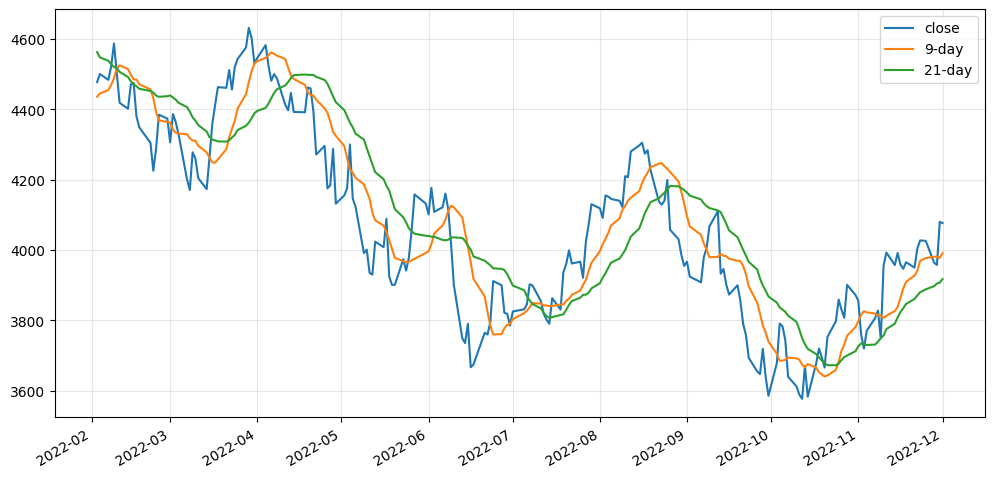

In [ ]:
# the 22:271 shows the first 100 days of trading
sp500_df.iloc[22:271,[1,2,3]].plot(figsize=(12,6))
plt.grid(True, alpha = .3)
plt.show()

**Adding the return columns**

In [ ]:
sp500_df['logClose'] = np.log(sp500_df['close']) # price will always be positive, so this operation is well-defined
sp500_df['return'] = sp500_df['logClose'].diff() # the difference will be positive or negative
sp500_df.head()

,day,close,9-day,21-day,logClose,return
2022-01-03,22,4796.56,4728.35,4682.47,8.48,NaN
2022-01-04,23,4793.54,4753.74,4692.92,8.48,-0.00
2022-01-05,24,4700.58,4769.77,4705.07,8.46,-0.02
2022-01-06,25,4696.05,4770.22,4710.26,8.45,-0.00
2022-01-07,26,4677.03,4766.92,4710.70,8.45,-0.00


**Setting the first column to 0**

In [ ]:
sp500_df.loc["2022-01-03",'return'] = 0.0
sp500_df.head()

,day,close,9-day,21-day,logClose,return
2022-01-03,22,4796.56,4728.35,4682.47,8.48,0.00
2022-01-04,23,4793.54,4753.74,4692.92,8.48,-0.00
2022-01-05,24,4700.58,4769.77,4705.07,8.46,-0.02
2022-01-06,25,4696.05,4770.22,4710.26,8.45,-0.00
2022-01-07,26,4677.03,4766.92,4710.70,8.45,-0.00


**Adding investing column**

In [ ]:
# the np.where() function is similar to the Excel =IF() statement
sp500_df['invested'] = np.where(sp500_df['9-day'] > sp500_df['21-day'], 1, 0)
sp500_df

,day,close,9-day,21-day,logClose,return,invested
2022-01-03,22,4796.56,4728.35,4682.47,8.48,0.00,1
2022-01-04,23,4793.54,4753.74,4692.92,8.48,-0.00,1
2022-01-05,24,4700.58,4769.77,4705.07,8.46,-0.02,1
2022-01-06,25,4696.05,4770.22,4710.26,8.45,-0.00,1
2022-01-07,26,4677.03,4766.92,4710.70,8.45,-0.00,1
...,...,...,...,...,...,...,...
2022-11-25,248,4026.12,3977.04,3888.11,8.30,-0.00,1
2022-11-28,249,3963.94,3980.73,3897.42,8.28,-0.02,1
2022-11-29,250,3957.63,3981.47,3904.88,8.28,-0.00,1
2022-11-30,251,4080.11,3977.68,3907.58,8.31,0.03,1


In [ ]:
print(sp500_df['invested'].value_counts())

0    124
1    107
Name: invested, dtype: int64


**Entering and leaving the market using the momentum trading strategy**

**A value of +1 indicates that we should buy, and a value of -1 indicates that we should sell.**

In [ ]:
# the variable signal tells you when you buy and sell
# we will use it to make red and green triangles
sp500_df['signal'] = sp500_df['invested'].diff()
print(sp500_df['signal'].value_counts())

0.00     220
-1.00      5
1.00       5
Name: signal, dtype: int64


**Lets check the dataframe so far**

In [ ]:
sp500_df

,day,close,9-day,21-day,logClose,return,invested,signal
2022-01-03,22,4796.56,4728.35,4682.47,8.48,0.00,1,NaN
2022-01-04,23,4793.54,4753.74,4692.92,8.48,-0.00,1,0.00
2022-01-05,24,4700.58,4769.77,4705.07,8.46,-0.02,1,0.00
2022-01-06,25,4696.05,4770.22,4710.26,8.45,-0.00,1,0.00
2022-01-07,26,4677.03,4766.92,4710.70,8.45,-0.00,1,0.00
...,...,...,...,...,...,...,...,...
2022-11-25,248,4026.12,3977.04,3888.11,8.30,-0.00,1,0.00
2022-11-28,249,3963.94,3980.73,3897.42,8.28,-0.02,1,0.00
2022-11-29,250,3957.63,3981.47,3904.88,8.28,-0.00,1,0.00
2022-11-30,251,4080.11,3977.68,3907.58,8.31,0.03,1,0.00


**We want to buy on the first business day of January 2022**

In [ ]:
sp500_df.loc["2022-01-03",'signal'] = 1.0
sp500_df

,day,close,9-day,21-day,logClose,return,invested,signal
2022-01-03,22,4796.56,4728.35,4682.47,8.48,0.00,1,1.00
2022-01-04,23,4793.54,4753.74,4692.92,8.48,-0.00,1,0.00
2022-01-05,24,4700.58,4769.77,4705.07,8.46,-0.02,1,0.00
2022-01-06,25,4696.05,4770.22,4710.26,8.45,-0.00,1,0.00
2022-01-07,26,4677.03,4766.92,4710.70,8.45,-0.00,1,0.00
...,...,...,...,...,...,...,...,...
2022-11-25,248,4026.12,3977.04,3888.11,8.30,-0.00,1,0.00
2022-11-28,249,3963.94,3980.73,3897.42,8.28,-0.02,1,0.00
2022-11-29,250,3957.63,3981.47,3904.88,8.28,-0.00,1,0.00
2022-11-30,251,4080.11,3977.68,3907.58,8.31,0.03,1,0.00


**Lets check the trading days**

In [ ]:
sp500_df[sp500_df['signal'].isin([1,-1])]

,day,close,9-day,21-day,logClose,return,invested,signal
2022-01-03,22,4796.56,4728.35,4682.47,8.48,0.00,1,1.00
2022-01-18,32,4577.11,4699.87,4711.42,8.43,-0.02,0,-1.00
2022-02-10,49,4504.08,4517.10,4516.61,8.41,-0.02,1,1.00
2022-02-23,57,4225.50,4432.39,4447.68,8.35,-0.02,0,-1.00
2022-03-22,76,4511.61,4319.01,4312.12,8.41,0.01,1,1.00
2022-04-14,93,4392.59,4486.65,4497.37,8.39,-0.01,0,-1.00
2022-06-03,127,4108.54,4046.84,4037.85,8.32,-0.02,1,1.00
2022-06-15,135,3789.99,4009.67,4012.05,8.24,0.01,0,-1.00
2022-07-08,150,3899.38,3849.11,3846.39,8.27,-0.00,1,1.00
2022-08-30,187,3986.16,4164.57,4176.47,8.29,-0.01,0,-1.00


In [ ]:
initial_investment = 100000

sp500_df['logClose'] = np.log(sp500_df['close'])

# Calculate daily log returns
sp500_df['return'] = sp500_df['logClose'].diff()

# 'system_return' column represents the daily system returns
sp500_df['system_return'] = sp500_df['invested'] * sp500_df['return']

# Calculate cumulative system return
sp500_df['cumulative_return'] = (1 + sp500_df['system_return']).cumprod()

# Convert cumulative returns from logarithmic to simple returns
sp500_df['cumulative_return'] = np.exp(np.log(1 + sp500_df['system_return']).cumsum()) - 1

# Calculate portfolio value over time using simple returns
sp500_df['portfolio_value'] = initial_investment * (1 + sp500_df['cumulative_return'])

# Display the updated DataFrame
sp500_df


,day,close,9-day,21-day,logClose,return,invested,signal,system_return,cumulative_return,portfolio_value
2022-01-03,22,4796.56,4728.35,4682.47,8.48,NaN,1,1.00,NaN,NaN,NaN
2022-01-04,23,4793.54,4753.74,4692.92,8.48,-0.00,1,0.00,-0.00,-0.00,99937.02
2022-01-05,24,4700.58,4769.77,4705.07,8.46,-0.02,1,0.00,-0.02,-0.02,97979.92
2022-01-06,25,4696.05,4770.22,4710.26,8.45,-0.00,1,0.00,-0.00,-0.02,97885.45
2022-01-07,26,4677.03,4766.92,4710.70,8.45,-0.00,1,0.00,-0.00,-0.03,97488.19
...,...,...,...,...,...,...,...,...,...,...,...
2022-11-25,248,4026.12,3977.04,3888.11,8.30,-0.00,1,0.00,-0.00,-0.12,88181.56
2022-11-28,249,3963.94,3980.73,3897.42,8.28,-0.02,1,0.00,-0.02,-0.13,86809.04
2022-11-29,250,3957.63,3981.47,3904.88,8.28,-0.00,1,0.00,-0.00,-0.13,86670.74
2022-11-30,251,4080.11,3977.68,3907.58,8.31,0.03,1,0.00,0.03,-0.11,89312.35


In [ ]:
monthly_portfolio_MOMENTUM_sp500 = sp500_df.resample('MS').first()

# Print or use the resulting DataFrame
monthly_portfolio_MOMENTUM_sp500


,day,close,9-day,21-day,logClose,return,invested,signal,system_return,cumulative_return,portfolio_value
2022-01-01,22,4796.56,4728.35,4682.47,8.48,-0.00,1,1.00,-0.00,-0.00,99937.02
2022-02-01,42,4546.54,4422.65,4582.98,8.42,0.01,0,0.00,0.00,-0.03,97177.99
2022-03-01,61,4306.26,4361.42,4439.57,8.37,-0.02,0,0.00,-0.00,-0.09,91122.58
2022-04-01,84,4545.86,4536.91,4395.54,8.42,0.00,1,0.00,0.00,-0.07,92805.51
2022-05-01,104,4155.38,4295.76,4397.92,8.33,0.01,0,0.00,0.00,-0.09,90743.76
2022-06-01,125,4101.23,3996.45,4040.36,8.32,-0.01,0,0.00,-0.00,-0.09,90743.76
2022-07-01,146,3825.33,3803.65,3898.95,8.25,0.01,0,0.00,0.00,-0.19,81009.75
2022-08-01,166,4118.63,3996.82,3905.71,8.32,-0.00,1,0.00,-0.00,-0.15,85375.28
2022-09-01,189,3966.85,4096.06,4163.67,8.29,0.00,0,0.00,0.00,-0.17,83416.62
2022-10-01,210,3678.43,3704.95,3850.52,8.21,0.03,0,0.00,0.00,-0.17,83416.62


##**4.3  Buy-and-Hold strategy for the S&P 500 index (^GSPC). (5 pts)**

Create a table that shows the amount of money invested in ^GSPC on the first day of each month (i.e., how much money is currently invested in each stock) as well as the aggregate value of the entire portfolio from Jan 1, 2022 (when you would have done your allocation), February 1, 2022 …, through December 1, 2022 (when we imagine you sold your stocks).

In [ ]:
initial_investment = 100000

sp500_df['logClose'] = np.log(sp500_df['close'])

# Calculate daily log returns
sp500_df['return'] = sp500_df['logClose'].diff()

# 'system_return' column represents the daily system returns
sp500_df['system_return'] = sp500_df['invested'] * sp500_df['return']

# Calculate cumulative system return
sp500_df['cumulative_returnB_H'] = (1 + sp500_df['return']).cumprod()

# Convert cumulative returns from logarithmic to simple returns
sp500_df['cumulative_returnB_H'] = np.exp(np.log(1 + sp500_df['return']).cumsum()) - 1

# Calculate portfolio value over time using simple returns
sp500_df['portfolio_value'] = initial_investment * (1 + sp500_df['cumulative_returnB_H'])

# Display the updated DataFrame
sp500_df_B_H = sp500_df


In [ ]:
# Resample to select the first day of each month
monthly_portfolio_sp500 = sp500_df_B_H.resample('MS').first()

# Print or use the resulting DataFrame
monthly_portfolio_sp500


,day,close,9-day,21-day,logClose,return,invested,signal,system_return,cumulative_return,portfolio_value,cumulative_returnB_H
2022-01-01,22,4796.56,4728.35,4682.47,8.48,-0.00,1,1.00,-0.00,-0.00,99937.02,-0.00
2022-02-01,42,4546.54,4422.65,4582.98,8.42,0.01,0,0.00,0.00,-0.03,94655.03,-0.05
2022-03-01,61,4306.26,4361.42,4439.57,8.37,-0.02,0,0.00,-0.00,-0.09,89477.32,-0.11
2022-04-01,84,4545.86,4536.91,4395.54,8.42,0.00,1,0.00,0.00,-0.07,94243.94,-0.06
2022-05-01,104,4155.38,4295.76,4397.92,8.33,0.01,0,0.00,0.00,-0.09,85929.46,-0.14
2022-06-01,125,4101.23,3996.45,4040.36,8.32,-0.01,0,0.00,-0.00,-0.09,84474.45,-0.16
2022-07-01,146,3825.33,3803.65,3898.95,8.25,0.01,0,0.00,0.00,-0.19,78499.73,-0.22
2022-08-01,166,4118.63,3996.82,3905.71,8.32,-0.00,1,0.00,-0.00,-0.15,84391.68,-0.16
2022-09-01,189,3966.85,4096.06,4163.67,8.29,0.00,0,0.00,0.00,-0.17,81143.32,-0.19
2022-10-01,210,3678.43,3704.95,3850.52,8.21,0.03,0,0.00,0.00,-0.17,75028.34,-0.25


##**4.4 Plot performance of each of 3 strategies.(5 pts)**

Show the performance of each of the three strategies above in a single plot. Using the plot, compare and analyze the results obtained by the three strategies.  

Your plot must have a legend (-2 pts)

Your plot must have labels (-2 pts)


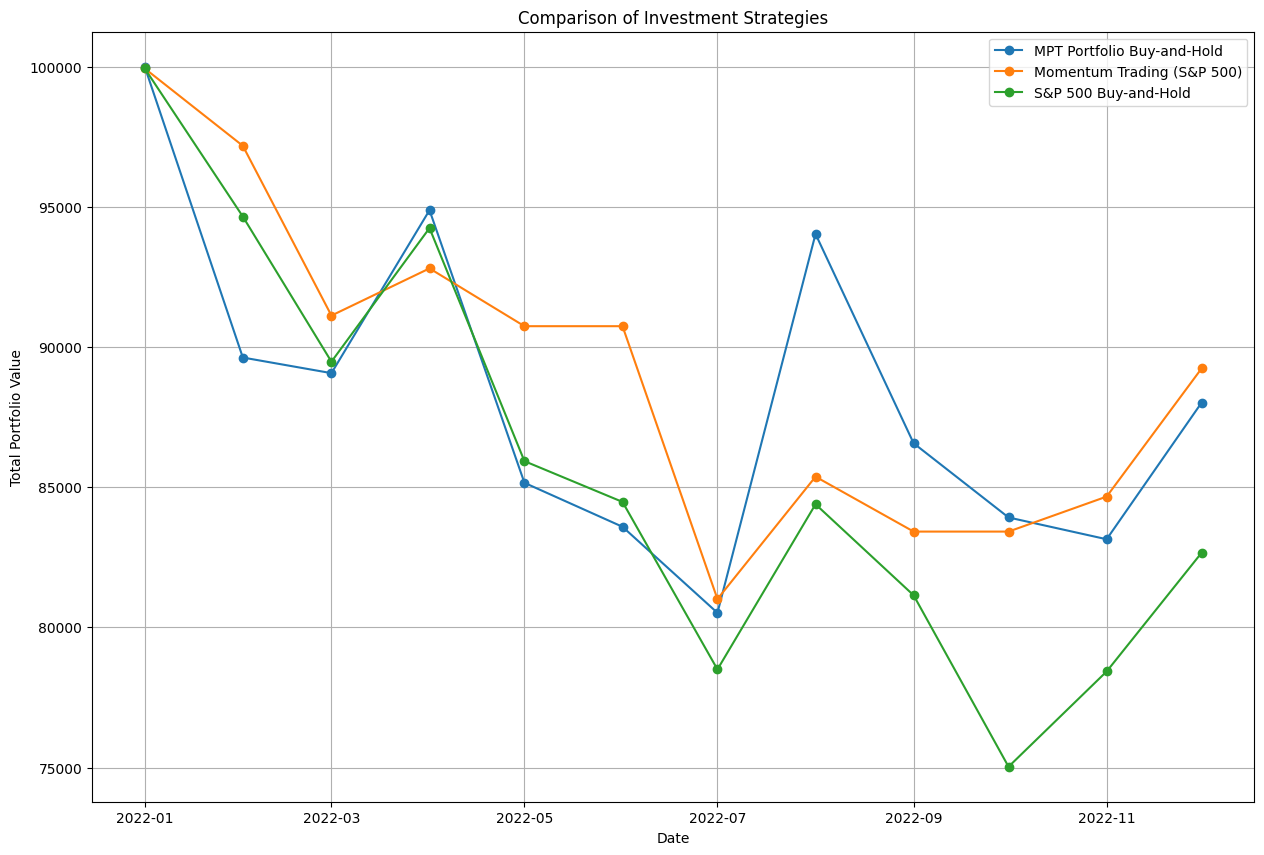

In [ ]:
# Plot the Total Portfolio Value for each strategy
plt.figure(figsize=(15, 10))

# Buy-and-Hold for MPT Portfolio
plt.plot(monthly_portfolio.index, monthly_portfolio['Total Portfolio Value'], label='MPT Portfolio Buy-and-Hold', marker='o')

# Momentum Trading strategy for S&P 500
plt.plot(monthly_portfolio_MOMENTUM_sp500.index, monthly_portfolio_MOMENTUM_sp500['portfolio_value'], label='Momentum Trading (S&P 500)', marker='o')

# Buy-and-Hold for S&P 500
plt.plot(monthly_portfolio_sp500.index, monthly_portfolio_sp500['portfolio_value'], label='S&P 500 Buy-and-Hold', marker='o')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Total Portfolio Value')
plt.title('Comparison of Investment Strategies')
plt.legend()

# Add grid
plt.grid(True)

# Show the plot
plt.show()


#**5 - CONCLUSION (5 pts)**

**Provide some closing thoughts and insights (five to ten bullets) on what you have learned from your Models and the Analysis. We will deduct points if the conclusion has only obvious comments (e.g., “We used MPT to compute a portfolio allocation” is not an insight).**


##**5.1 Conclusion 1- Selection process**

**Return-to-Risk Ratio**   

For the selection of our initial 10 stocks per sector, we decided to used return-to-risk ratio. Opting for stocks based on the return-to-risk ratio is a judicious and methodical approach within financial analysis, commonly utilized by investors and traders aiming to fine-tune their portfolio. The return-to-risk ratio, also referred to as risk-adjusted return, stands as a crucial metric assessing the potential return of an investment in relation to its inherent risk. The calculation typically involves dividing the anticipated return by a risk measure, such as standard deviation or volatility.

The strategy of selecting the top 10 stocks with the highest return-to-risk ratios prioritizes investments that strike a favorable equilibrium between potential returns and associated risks. This methodology surpasses a mere consideration of raw returns, incorporating the crucial element of risk. It recognizes that not all returns hold equal weight and underscores the importance of achieving a balance that maximizes returns while minimizing exposure to volatility or downside risk.

The significance of this approach lies in its risk-aware nature. While enticing, high returns should be evaluated within the context of the risks undertaken to attain them. A high return-to-risk ratio signifies that a stock carries the potential for robust returns relative to its volatility, rendering it an attractive choice for investors aiming to optimize their risk-adjusted performance. By concentrating on stocks boasting superior return-to-risk ratios, investors aspire to construct a portfolio (as will be done later) that presents a compelling risk-reward profile, aligning with their risk tolerance and investment objectives.

##**5.2 Conclusion 2 - Buy and Hold vs Momentum trading**

Buy and hold" trading and "momentum" trading are two different investment or trading strategies that investors use in financial markets. Here's an overview of each:

**Buy and Hold Trading:**

**_Strategy:_** In a buy and hold strategy, investors buy a financial asset (such as stocks, bonds, or real estate) and hold onto it for an extended period, often several yearss. In this case we focused in 3 main sectors Techonology, Real State and Utility.

**_Philosophy:_** The philosophy behind buy and hold is based on the belief that, over the long term, the value of the asset will increase despite short-term market fluctuations.

**Key Characteristics:**

**_Minimal trading activity:_** Investors are not actively buying and selling assets based on short-term market movements.

**_Long-term focus:_** The strategy is oriented towards capital appreciation over a prolonged period.

**_Less emphasis on market timing:_** The strategy is less concerned with trying to time the market to capitalize on short-term price movements.

---


**Momentum Trading:**

**_Strategy:_** Momentum trading is a more active strategy where traders aim to capitalize on the continuation of existing trends in the market. If a stock has been performing well, a momentum trader will buy expecting the trend to persist.

**_Philosophy:_** Momentum strategy relies in assets that have shown recent strength or weakness will continue to do so in the short term.

**Key Characteristics:**

**_Frequent trading:_** Momentum traders often engage in more frequent buying and selling activities to capture short-term trends.


**_Technical analysis:_** Momentum traders often use technical analysis and charts to identify trends and entry/exit points.

**_Short to medium-term focus:_** The strategy is focused on exploiting short to medium-term trends rather than a long-term investment horizon.

**_Reactive to market conditions:_** Momentum strategy responds to current market trends and attempt to ride the wave of those trends.

---

**Considerations:**

**_Risk and Return:_** Buy and hold tends to be a more conservative approach with a focus on long-term growth, while momentum trading involves more frequent trades and may have a higher risk-reward profile.

**_Investor Preferences:_** The choice between buy and hold and momentum trading often depends on an investor's risk tolerance, time horizon, and investment goals.

**_Market Conditions:_** Different strategies may perform better in different market conditions. Bull markets may favor momentum strategies, while buy and hold may be more resilient during market downturns like  the lately covid time.

Ultimately, the most suitable strategy depends on individual preferences, risk tolerance, and the investor's goals and beliefs about market behavior. Some investors may even use a combination of strategies based on different portions of their investment portfolio. In a lonog run Buy Hold usually performs better than Momentum strategy

##**5.3 Conclusion 3 - Modern Portfolio Theory**

**Modern Portfolio Theory (MPT):**


---


Modern Portfolio Theory, developed by Harry Markowitz in the 1950s **(notebook mentioned)**, is a framework for constructing portfolios that seek to optimize the trade-off between expected return and risk. The central idea of MPT is that by diversifying investments across a mix of assets with varying levels of risk and return, an investor can create a portfolio that maximizes expected return for a given level of risk or minimizes risk for a given level of expected return.

We did a brain storming about the key takeaways we learned from this project using Modern Portfolio Theory (MPT) with three sectors: Technology, Real Estate, and Utilities:

**Diversification Benefits:**
One of the fundamental principles of Modern Portfolio Theory is diversification. By combining assets from different sectors, such as Technology, Real Estate, and Utilities, we observed that the overall portfolio risk can be reduced. This diversification allows for a more stable and balanced investment approach.

**Risk-Return Tradeoff:**
MPT emphasizes the relationship between risk and return. The project involved analyzing the risk and return characteristics of each sector and the portfolio as a whole. This understanding helps us as investors make informed decisions about how much risk we are willing to take on for a given level of expected return.

**Efficient Frontier Analysis:**
We constructed the efficient frontier graph, showcasing the optimal portfolios that offer the maximum expected return for a given level of risk or the minimum risk for a given level of expected return. The efficient frontier visually illustrates the trade-offs and helps in identifying the most suitable portfolios based on risk-return preferences.

**Sector Allocation and Portfolio Construction:**

The project involved optimizing the allocation of assets across the three sectors to create portfolios that lie on or close to the efficient frontier. This process can provide insights into the ideal mix of Technology, Real Estate, and Utilities to achieve specific risk and return objectives.

**Correlation and Covariance Analysis:**

Given that MPT considers the correlation between assets, we explored how the sectors are correlated with each other. Understanding the correlation helps in assessing how the sectors move in relation to one another, influencing the overall portfolio risk.

**Risk Tolerance and Investor Preferences:**

Through the project, weconsidered how different investors with varying risk tolerances would choose portfolios along the efficient frontier. This analysis allows for tailoring investment strategies to meet the preferences of different types of investors or risk aversions.

**Practical Implications for Portfolio Management:**

The project have practical implications for real-world portfolio management. For instance, insights gained from MPT can guide us as investment managers in constructing well-balanced portfolios that align with the risk and return preferences of their clients.


---


**Conclusion:**

In summary, this project using Modern Portfolio Theory with sectors like Technology, Real Estate, and Utilities provided valuable insights into the benefits of diversification, the trade-off between risk and return, and the construction of efficient portfolios. These takeaways contribute to a deeper understanding of how to optimize investment portfolios within the context of MPT principles.

##**5.4 Conclusion 4 - BUY and HOLD vs MOMENTUM on 500 Index**

**Buy and Hold Strategy:**

**_Long-Term Perspective:_** The Buy and Hold strategy typically involves holding onto investments for an extended period without active trading. We have observed the performance of a portfolio that simply buys and holds the S&P 500 index over time.

**_Market Trends:_** Assessing the historical performance of the S&P 500 using the Buy and Hold strategy provided insights into long-term market trends and the overall growth of the index, in our case we can see a donwards trend in the year 2022.


---


**Momentum Strategies (8 days and 21 days):**

**_Short-Term Trading:_** Momentum strategies, particularly those with 8-day and 21-day timeframes, are more focused on short-term price movements. These strategies aim to capitalize on trends and momentum in the market.

**_Signal Generation:_** We can see that ther are 3 crossovers in the year. Due to the downward trend in the long run the momentum stratefy outperforms Buy and Holda strategy.

**Risk and Return Tradeoff:**

**_Risk Considerations:_** By comparing the performance of Buy and Hold with Momentum strategies, we gained insights into the risk-return tradeoff. Short-term momentum strategies might provide opportunities for quicker gains, and it has a low volatility behaviour.



---


**MPT Porfolio Buy and Hold:**

**_Stock Selection Matters:_**

The fact that we selected stocks (MPT selected) outperformed the S&P 500 suggests that individual stock selection plays a crucial role in portfolio performance. This could be attributed to the specific characteristics, financial health, and market conditions of the chosen stocks.

**_Outperformance in a Recovery Period:_**

The observation of a sign of market recovery at the end of the year aligns with MPT portfolio's outperformance. This suggests that your selected stocks may have been well-positioned to capitalize on the recovering market conditions.

**_Sector Considerations:_**

Technology sector to which CDNS, AAPL, and FTNT belong, give son signals about the fast recovery this sector has, specially comparing them with the S&P 500 index.

**_Diversification Impact:_**

We can witness the diversification benefits from holding a mix of stocks. Diversification can help spread risk and contribute to overall portfolio stability.


---


We think that the fluctuantions of the market can be caused by:

**Market Conditions and Adaptability:**

**_Dynamic Nature of Markets:_** Mmarket dynamics is crucial for effective implementationand understanding of any strategy.

**Transaction Costs:_** We have to take into consideration the impact of transaction costs on the overall returns specially under the Momentum strategies. It can provide a more realistic assessment of performance.

**Behavioral Factors:** Behavioral factors, such as emotional reactions to market movements, can influence trading decisions. We might have shed light on how human behavior affects the implementation of different strategies.



---


**Conclusion:**

In summary, the project using Buy and Hold and Momentum strategies on the S&P 500 index likely provided valuable insights into the effectiveness of different investment approaches. Understanding the trade-offs between long-term holding and short-term momentum trading can inform future investment decisions and contribute to a more comprehensive understanding of market dynamics.

##**5.5 Conclusion 5 - Final Insights**



*   **Upon implementing the momentum strategy** on a selection of 10 stocks from each sector, a notable trend emerged from the plotted data. During the period spanning of  2022, the momentum trading strategy consistently remained less volatile. This observed pattern may be attributed to main characteristic of moving averages, that is to flatten the dramtics movements in the market.

*   **After evaluating both the buy-and-hold and momentum trading strategies** applied to our stock portfolios across various sectors and the S&P 500, a consistent observation emerged. The MPT buy-and-hold strategy outperformed the S&P Momentum trading approach in terms of returns at the end of the year. This trend underscores the notion that attempting to forecast volatility in stocks over an extended duration tends to yield greater returns compared to shorter-term volatility predictions, specially when the market recovers.

*   **Utilizing time series analysis** proved to be a valuable technique in providing insights into the volatility of stocks over time. Notably, this approach revealed a significant trend during the first quarter of 2020, where stocks across various sectors experienced a sudden decline in prices due to the outbreak of the Covid pandemic and the government/world shutting down. To mitigate the influence of unpredictable events, it is imperative to construct a portfolio comprising a diverse mix of stocks strategically selected to minimize the range of sharp declines.

*  **Our colleague, Luis,** advocated for the incorporation of the risk-adjusted return ratio in the stock selection process across various sectors. This metric proved invaluable in guiding our stock choices by providing a nuanced perspective on returns relative to volatility or standard deviation.





#**6 -TEAM CONTRIBUTION**

**Luis** collaborated on a comprehensive examination of financial sector plots and visualizations, delving into critical observations. They scrutinized findings related to momentum trading and the buy-and-hold strategy, ultimately evaluating the outcomes and formulating key insights.

**Shreenath** collaborated on crafting data preparation and exploratory data analysis (EDA) for sector stocks. They were instrumental in developing the code for a momentum trading strategy across all three sectors and provided support for specific code blocks in the analysis section.

**Sultan** implemented an optimization model that considered constraints and risk levels, determining the optimal three stocks for the modern portfolio theory. They also generated parameter analysis plots and the efficient frontier plot.

**Areesha** contributed to the development of the analysis section, outlining strategies for both S&P500 stocks and MPT stocks. Their joint efforts culminated in the creation of a performance plot.

**We thanks the special collaboration of our classmate LUIS PAZMINO**

